In [28]:
from p_pack import globals as g

data_folder   = "test-reup-fix"
# data_folder   = "reup-vary-1p"
min_freq    = 0
max_freq      = 2
x_min = 0
x_max = 10
y_min= 0
y_max=0.5
prefix = 'f'
# create two side-by-side plots with independent y-axes
fig, (ax_full, ax_zoom) = g.plt.subplots(1, 2, figsize=(12, 5))

script_dir = g.os.getcwd()  # directory where this script is located
parent_dir   = g.os.path.abspath(g.os.path.join(script_dir, ".."))
data_folder_2 = g.os.path.join(parent_dir, "work", data_folder)

for freq in range(min_freq, max_freq + 1):
    data_name    = f"{prefix}{freq}.npz"
    globals_name = f"{prefix}{freq}g.npz"

    # load
    out      = g.np.load(g.os.path.join(data_folder_2, data_name))
    steps    = out["loss_mem"][:, 0].astype(int)
    losses   = out["loss_mem"][:, 1].astype(float)

    # plot on both axes
    ax_full.plot(steps, losses, linewidth=1.5, label=f"{freq} Hz")
    ax_zoom.plot(steps, losses, linewidth=1.5, label=f"{freq} Hz")

# format the full-range plot
ax_full.set(
    xlabel="step",
    ylabel="loss",
    title="Full Training Curve"
)

# format the zoomed-in plot with its own y-limits
ax_zoom.set(
    xlim=(x_min, x_max),
    ylim=(y_min, y_max),
    xlabel="step",
    ylabel="loss",
    title=f"Zoomed (steps {x_min}–{x_max})"
)

# single legend on the full plot
handles, labels = ax_full.get_legend_handles_labels()
ax_full.legend(handles, labels, loc="upper right", ncol=2, fontsize="small")

# overall title
gl = g.np.load(g.os.path.join(data_folder_2, f"{prefix}{max_freq}g.npz"))
shape = out["carry_0"].shape
fig.suptitle(
    f"Unitary dim: {2*shape[1]}×{2*shape[1]}, p={gl['p_suc_inputs'].item()}, input={gl['input_positions'].item()}"
)

g.plt.tight_layout(rect=[0, 0.03, 1, 0.95])
g.plt.show()


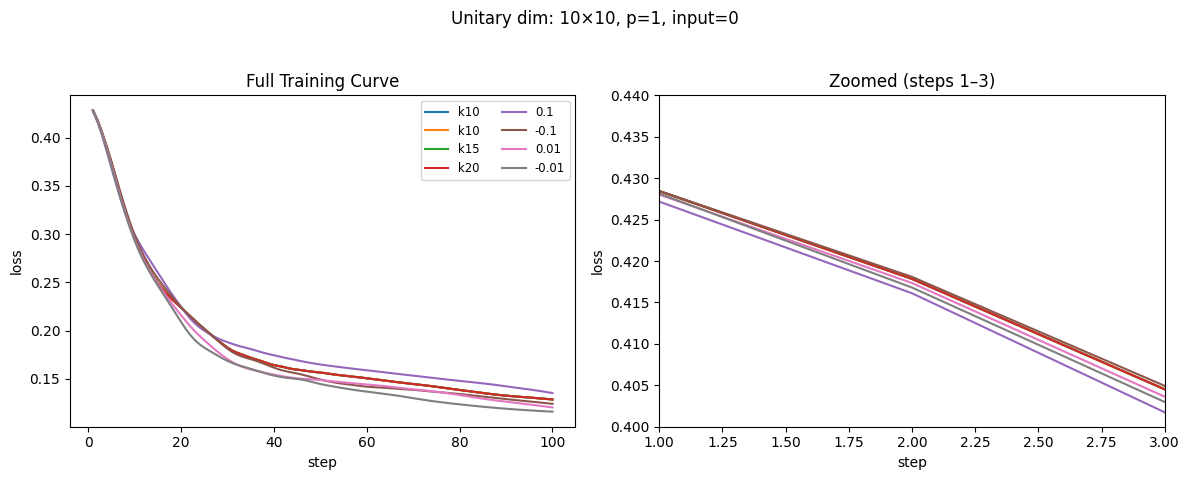

In [29]:
from p_pack import globals as g
from pathlib import Path

# -------- Configuration --------
data_folder = "init_phases-2"
file_indent = 'k'
indexes_to_plot = [0, 1, 2, 3, 4, 5, 6, 7]   #Choose the indexes you want to plot
legend_names = ["k10", "k10", "k15", "k20", "0.1", "-0.1", "0.01", "-0.01"]  # Custom labels, must match index order
x_min = 1
x_max = 3
y_min = 0.4
y_max = 0.44

# Create two side-by-side plots
fig, (ax_full, ax_zoom) = g.plt.subplots(1, 2, figsize=(12, 5))

# Set data folder path
script_dir = g.os.getcwd()
parent_dir = g.os.path.abspath(g.os.path.join(script_dir, ".."))
data_folder_path = g.os.path.join(parent_dir, "work", data_folder)

# Loop over the selected indexes and legend labels
for idx, label in zip(indexes_to_plot, legend_names):
    # Match file pattern: it{idx}k{var}.npz
    # Load file dynamically by matching prefix
    matches = list(Path(data_folder_path).glob(f"it{idx}{file_indent}*g.npz"))
    if not matches:
        print(f"[Warning] Global file for index {idx} not found.")
        continue

    global_name = matches[0].name
    data_name = global_name.replace("g.npz", ".npz")

    data_path = g.os.path.join(data_folder_path, data_name)
    globals_path = g.os.path.join(data_folder_path, global_name)

    # Load data
    out = g.np.load(data_path)
    steps = out["loss_mem"][:, 0].astype(int)
    losses = out["loss_mem"][:, 1].astype(float)

    ax_full.plot(steps, losses, linewidth=1.5, label=label)
    ax_zoom.plot(steps, losses, linewidth=1.5, label=label)

# Set axis labels and zoom
ax_full.set(
    xlabel="step",
    ylabel="loss",
    title="Full Training Curve"
)

ax_zoom.set(
    xlim=(x_min, x_max),
    ylim=(y_min, y_max),
    xlabel="step",
    ylabel="loss",
    title=f"Zoomed (steps {x_min}–{x_max})"
)

# Legend
handles, labels = ax_full.get_legend_handles_labels()
ax_full.legend(handles, labels, loc="upper right", ncol=2, fontsize="small")

# Use last loaded global file for title
gl = g.np.load(globals_path)
shape = out["carry_0"].shape
fig.suptitle(
    f"Unitary dim: {2*shape[1]}×{2*shape[1]}, p={gl['p_suc_inputs'].item()}, input={gl['input_positions'].item()}"
)

g.plt.tight_layout(rect=[0, 0.03, 1, 0.95])
g.plt.show()


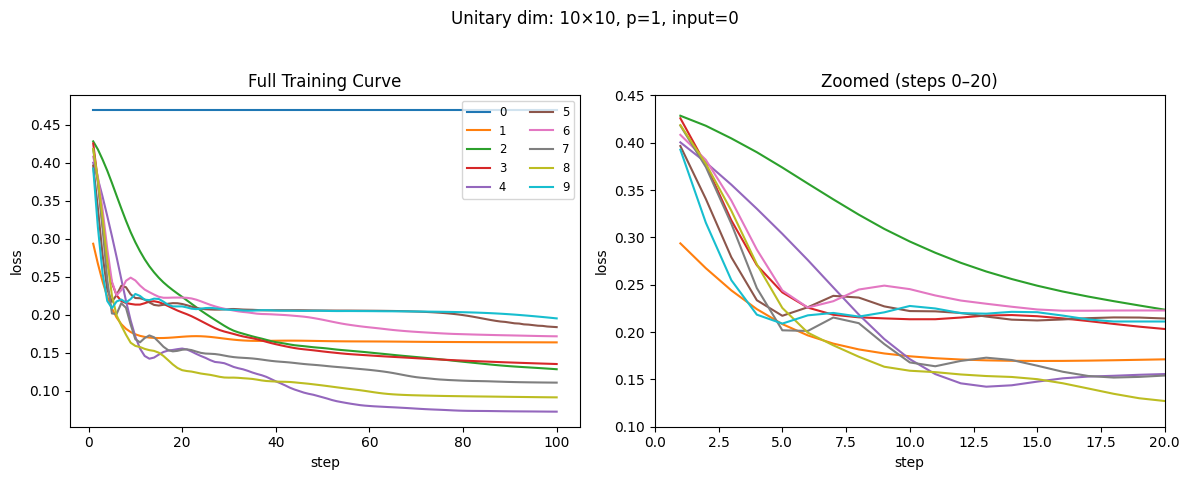

In [27]:
# ---- Cell 2: init_phases-2 curves with optional test-loss lines ----
from p_pack import globals as g
from pathlib import Path

# -------- Configuration --------
data_folder = "reup-vary-1p-edge/Learning"
file_indent = 'f'
indexes_to_plot = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  # Choose the indexes you want to plot
legend_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]  # Custom labels, must match index order
x_min = 0
x_max = 20
y_min = 0.1
y_max = 0.45
plot_test_loss = 0  # set to 1 to show test loss lines
test_loss_folder = "reup-vary-1p-edge/test-1p-edge"

# Create two side-by-side plots
fig, (ax_full, ax_zoom) = g.plt.subplots(1, 2, figsize=(12, 5))

# Set data folder path
script_dir = g.os.getcwd()
parent_dir = g.os.path.abspath(g.os.path.join(script_dir, ".."))
data_folder_path = g.os.path.join(parent_dir, "work", data_folder)
test_folder_path = g.os.path.join(parent_dir, "work", test_loss_folder)

# Loop over the selected indexes and legend labels
for idx, label in zip(indexes_to_plot, legend_names):
    matches = list(Path(data_folder_path).glob(f"it{idx}{file_indent}*g.npz"))
    if not matches:
        print(f"[Warning] Global file for index {idx} not found.")
        continue

    global_name = matches[0].name
    data_name   = global_name.replace("g.npz", ".npz")

    data_path    = g.os.path.join(data_folder_path, data_name)
    globals_path = g.os.path.join(data_folder_path, global_name)

    out    = g.np.load(data_path)
    steps  = out["loss_mem"][:, 0].astype(int)
    losses = out["loss_mem"][:, 1].astype(float)

    # plot training loss and capture its color
    line_full, = ax_full.plot(steps, losses, linewidth=1.5, label=label)
    line_zoom, = ax_zoom.plot(steps, losses, linewidth=1.5, label=label)
    color = line_full.get_color()

    if plot_test_loss:
        test_name = 'tl' + global_name[2:].replace('g.npz', '.npz')
        test_path = g.os.path.join(test_folder_path, test_name)
        if g.os.path.exists(test_path):
            tl = g.np.load(test_path)['test_loss'].item()
            # draw test-loss as a horizontal line in the same color
            ax_full.axline((0, tl), (1, tl),
                           linestyle='--',
                           color=color,
                           label=f'test {label}')
            ax_zoom.axline((0, tl), (1, tl),
                           linestyle='--',
                           color=color)
        else:
            print(f"[Warning] Test loss file {test_name} not found.")

# finalize axes
ax_full.set(xlabel='step', ylabel='loss', title='Full Training Curve')
ax_zoom.set(xlim=(x_min, x_max), ylim=(y_min, y_max),
            xlabel='step', ylabel='loss',
            title=f'Zoomed (steps {x_min}–{x_max})')

handles, labels = ax_full.get_legend_handles_labels()
ax_full.legend(handles, labels, loc='upper right', ncol=2, fontsize='small')

gl    = g.np.load(globals_path)
shape = out['carry_0'].shape
fig.suptitle(
    f"Unitary dim: {2*shape[1]}×{2*shape[1]}, p={gl['p_suc_inputs'].item()}, input={gl['input_positions'].item()}"
)

g.plt.tight_layout(rect=[0, 0.03, 1, 0.95])
g.plt.show()


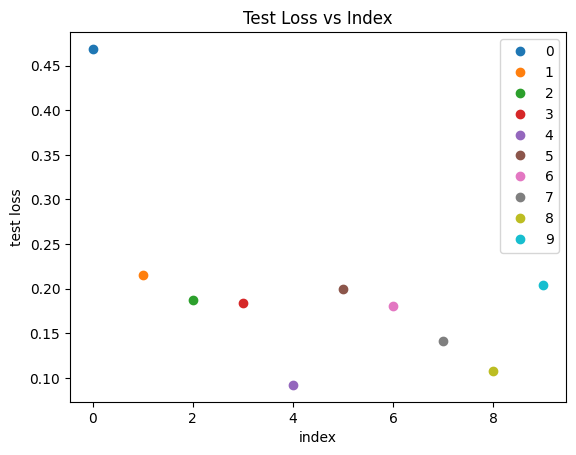

In [21]:
# ---- Cell 3: plot test loss vs. index ----
from p_pack import globals as g
from pathlib import Path

test_loss_folder = "reup-vary-1p-edge/test-1p-edge"
file_indent = 't'
indexes_to_plot = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
legend_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

fig, ax = g.plt.subplots()

script_dir = g.os.getcwd()
parent_dir = g.os.path.abspath(g.os.path.join(script_dir, '..'))
test_folder_path = g.os.path.join(parent_dir, 'work', test_loss_folder)

test_vals = []
for idx, label in zip(indexes_to_plot, legend_names):
    matches = list(Path(test_folder_path).glob(f't{idx}*.npz'))
    if not matches:
        print(f'[Warning] Test loss file for index {idx} not found.')
        continue
    tl = g.np.load(matches[0])['test_loss'].item()
    test_vals.append(tl)
    ax.plot(idx, tl, 'o', label=label)

ax.set(xlabel='index', ylabel='test loss', title='Test Loss vs Index')
ax.legend()
g.plt.show()


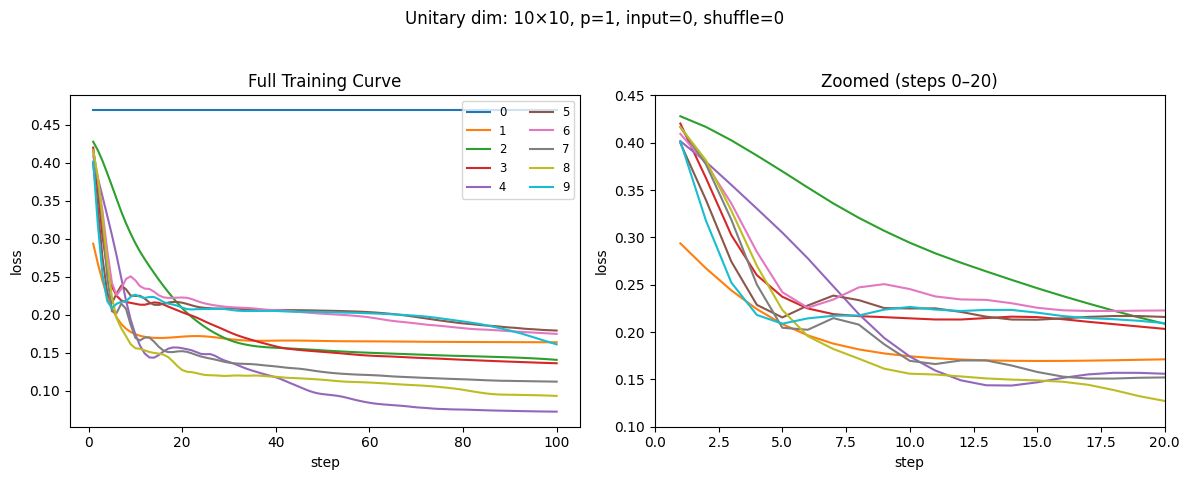

In [15]:
# ---- Cell 2: init_phases-2 curves with optional test-loss lines ----
from p_pack import globals as g
from pathlib import Path

# -------- Configuration --------
data_folder = "edge-photon-reup-vary-s0/Learning"
file_indent = 'f'
indexes_to_plot = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  # Choose the indexes you want to plot
legend_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]  # Custom labels, must match index order
x_min = 0
x_max = 20
y_min = 0.1
y_max = 0.45
plot_test_loss = 0  # set to 1 to show test loss lines
test_loss_folder = "reup-vary-1p-edge/test-1p-edge"

# Create two side-by-side plots
fig, (ax_full, ax_zoom) = g.plt.subplots(1, 2, figsize=(12, 5))

# Set data folder path
script_dir = g.os.getcwd()
parent_dir = g.os.path.abspath(g.os.path.join(script_dir, ".."))
data_folder_path = g.os.path.join(parent_dir, "work", data_folder)
test_folder_path = g.os.path.join(parent_dir, "work", test_loss_folder)

# Loop over the selected indexes and legend labels
for idx, label in zip(indexes_to_plot, legend_names):
    matches = list(Path(data_folder_path).glob(f"it{idx}{file_indent}*g.npz"))
    if not matches:
        print(f"[Warning] Global file for index {idx} not found.")
        continue

    global_name = matches[0].name
    data_name   = global_name.replace("g.npz", ".npz")

    data_path    = g.os.path.join(data_folder_path, data_name)
    globals_path = g.os.path.join(data_folder_path, global_name)

    out    = g.np.load(data_path)
    steps  = out["loss_mem"][:, 0].astype(int)
    losses = out["loss_mem"][:, 1].astype(float)

    # plot training loss and capture its color
    line_full, = ax_full.plot(steps, losses, linewidth=1.5, label=label)
    line_zoom, = ax_zoom.plot(steps, losses, linewidth=1.5, label=label)
    color = line_full.get_color()

    if plot_test_loss:
        test_name = 'tl' + global_name[2:].replace('g.npz', '.npz')
        test_path = g.os.path.join(test_folder_path, test_name)
        if g.os.path.exists(test_path):
            tl = g.np.load(test_path)['test_loss'].item()
            # draw test-loss as a horizontal line in the same color
            ax_full.axline((0, tl), (1, tl),
                           linestyle='--',
                           color=color,
                           label=f'test {label}')
            ax_zoom.axline((0, tl), (1, tl),
                           linestyle='--',
                           color=color)
        else:
            print(f"[Warning] Test loss file {test_name} not found.")

# finalize axes
ax_full.set(xlabel='step', ylabel='loss', title='Full Training Curve')
ax_zoom.set(xlim=(x_min, x_max), ylim=(y_min, y_max),
            xlabel='step', ylabel='loss',
            title=f'Zoomed (steps {x_min}–{x_max})')

handles, labels = ax_full.get_legend_handles_labels()
ax_full.legend(handles, labels, loc='upper right', ncol=2, fontsize='small')

gl    = g.np.load(globals_path)
shape = out['carry_0'].shape
fig.suptitle(
    f"Unitary dim: {2*shape[1]}×{2*shape[1]}, p={gl['p_suc_inputs'].item()}, input={gl['input_positions'].item()}, shuffle={gl['shuffle_type'].item()}"
)

g.plt.tight_layout(rect=[0, 0.03, 1, 0.95])
g.plt.show()


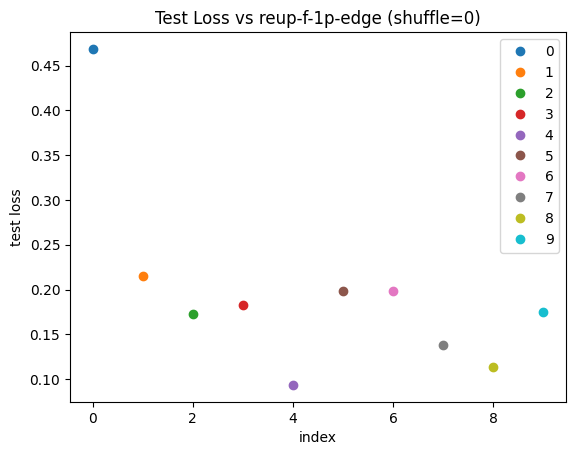

In [16]:
# ---- Cell 3: plot test loss vs. index ----
from p_pack import globals as g
from pathlib import Path

test_loss_folder = "edge-photon-reup-vary-s0/test-1p-edge"
file_indent = 't'
indexes_to_plot = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
legend_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

fig, ax = g.plt.subplots()

script_dir = g.os.getcwd()
parent_dir = g.os.path.abspath(g.os.path.join(script_dir, '..'))
test_folder_path = g.os.path.join(parent_dir, 'work', test_loss_folder)

test_vals = []
for idx, label in zip(indexes_to_plot, legend_names):
    matches = list(Path(test_folder_path).glob(f't{idx}*.npz'))
    if not matches:
        print(f'[Warning] Test loss file for index {idx} not found.')
        continue
    tl = g.np.load(matches[0])['test_loss'].item()
    test_vals.append(tl)
    ax.plot(idx, tl, 'o', label=label)

ax.set(xlabel='index', ylabel='test loss', title=f'Test Loss vs reup-f-1p-edge (shuffle={gl['shuffle_type'].item()})')
ax.legend()
g.plt.show()


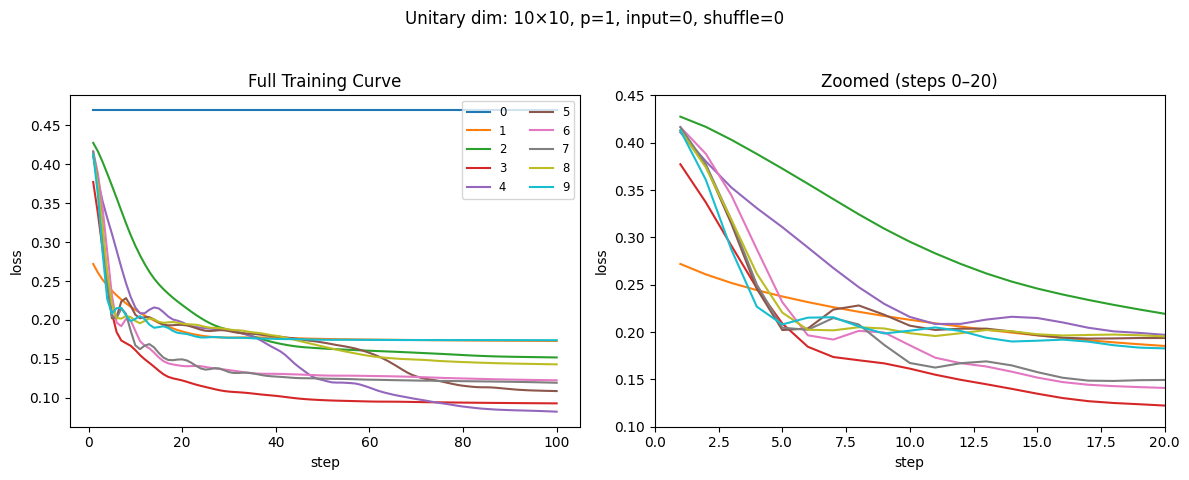

In [38]:
# ---- Cell 2: init_phases-2 curves with optional test-loss lines ----
from p_pack import globals as g
from pathlib import Path

# -------- Configuration --------
data_folder = "edge-photon-reup-vary-s0-k3/Learning"
file_indent = 'f'
indexes_to_plot = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  # Choose the indexes you want to plot
legend_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]  # Custom labels, must match index order
x_min = 0
x_max = 20
y_min = 0.1
y_max = 0.45
plot_test_loss = 0  # set to 1 to show test loss lines
test_loss_folder = "reup-vary-1p-edge/test-1p-edge"

# Create two side-by-side plots
fig, (ax_full, ax_zoom) = g.plt.subplots(1, 2, figsize=(12, 5))

# Set data folder path
script_dir = g.os.getcwd()
parent_dir = g.os.path.abspath(g.os.path.join(script_dir, ".."))
data_folder_path = g.os.path.join(parent_dir, "work", data_folder)
test_folder_path = g.os.path.join(parent_dir, "work", test_loss_folder)

# Loop over the selected indexes and legend labels
for idx, label in zip(indexes_to_plot, legend_names):
    matches = list(Path(data_folder_path).glob(f"it{idx}{file_indent}*g.npz"))
    if not matches:
        print(f"[Warning] Global file for index {idx} not found.")
        continue

    global_name = matches[0].name
    data_name   = global_name.replace("g.npz", ".npz")

    data_path    = g.os.path.join(data_folder_path, data_name)
    globals_path = g.os.path.join(data_folder_path, global_name)

    out    = g.np.load(data_path)
    steps  = out["loss_mem"][:, 0].astype(int)
    losses = out["loss_mem"][:, 1].astype(float)

    # plot training loss and capture its color
    line_full, = ax_full.plot(steps, losses, linewidth=1.5, label=label)
    line_zoom, = ax_zoom.plot(steps, losses, linewidth=1.5, label=label)
    color = line_full.get_color()

    if plot_test_loss:
        test_name = 'tl' + global_name[2:].replace('g.npz', '.npz')
        test_path = g.os.path.join(test_folder_path, test_name)
        if g.os.path.exists(test_path):
            tl = g.np.load(test_path)['test_loss'].item()
            # draw test-loss as a horizontal line in the same color
            ax_full.axline((0, tl), (1, tl),
                           linestyle='--',
                           color=color,
                           label=f'test {label}')
            ax_zoom.axline((0, tl), (1, tl),
                           linestyle='--',
                           color=color)
        else:
            print(f"[Warning] Test loss file {test_name} not found.")

# finalize axes
ax_full.set(xlabel='step', ylabel='loss', title='Full Training Curve')
ax_zoom.set(xlim=(x_min, x_max), ylim=(y_min, y_max),
            xlabel='step', ylabel='loss',
            title=f'Zoomed (steps {x_min}–{x_max})')

handles, labels = ax_full.get_legend_handles_labels()
ax_full.legend(handles, labels, loc='upper right', ncol=2, fontsize='small')

gl    = g.np.load(globals_path)
shape = out['carry_0'].shape
fig.suptitle(
    f"Unitary dim: {2*shape[1]}×{2*shape[1]}, p={gl['p_suc_inputs'].item()}, input={gl['input_positions'].item()}, shuffle={gl['shuffle_type'].item()}"
)

g.plt.tight_layout(rect=[0, 0.03, 1, 0.95])
g.plt.show()


In [41]:
# ---- Cell 3: plot test loss vs. index ----
from p_pack import globals as g
from pathlib import Path

test_loss_folder = "edge-photon-reup-vary-s0-k3/test-pos0"
file_indent = 't'
indexes_to_plot = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
legend_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

fig, ax = g.plt.subplots()

script_dir = g.os.getcwd()
parent_dir = g.os.path.abspath(g.os.path.join(script_dir, '..'))
test_folder_path = g.os.path.join(parent_dir, 'work', test_loss_folder)

test_vals = []
for idx, label in zip(indexes_to_plot, legend_names):
    matches = list(Path(test_folder_path).glob(f't{idx}*.npz'))
    if not matches:
        print(f'[Warning] Test loss file for index {idx} not found.')
        continue
    tl = g.np.load(matches[0])['test_loss'].item()
    test_vals.append(tl)
    ax.plot(idx, tl, 'o', label=label)

ax.set(xlabel='index', ylabel='test loss', title=f'Test Loss vs reup-f-1p-edge (shuffle={gl['shuffle_type'].item()}, key={gl['shuffle_key'][1].item()})')
ax.legend()
g.plt.show()


[Warning] Global file for index 0 not found.


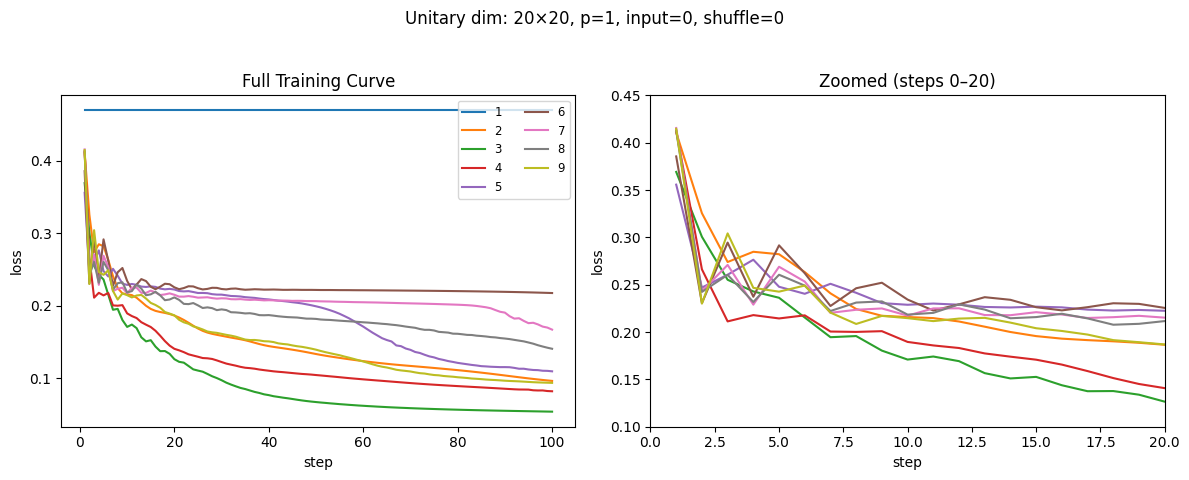

In [21]:
# ---- Cell 2: init_phases-2 curves with optional test-loss lines ----
from p_pack import globals as g
from pathlib import Path

# -------- Configuration --------
data_folder = "reup-d10-s0/Learning"
file_indent = 'f'
indexes_to_plot = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  # Choose the indexes you want to plot
legend_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]  # Custom labels, must match index order
x_min = 0
x_max = 20
y_min = 0.1
y_max = 0.45
plot_test_loss = 0  # set to 1 to show test loss lines
test_loss_folder = "reup-vary-1p-edge/test-1p-edge"

# Create two side-by-side plots
fig, (ax_full, ax_zoom) = g.plt.subplots(1, 2, figsize=(12, 5))

# Set data folder path
script_dir = g.os.getcwd()
parent_dir = g.os.path.abspath(g.os.path.join(script_dir, ".."))
data_folder_path = g.os.path.join(parent_dir, "work", data_folder)
test_folder_path = g.os.path.join(parent_dir, "work", test_loss_folder)

# Loop over the selected indexes and legend labels
for idx, label in zip(indexes_to_plot, legend_names):
    matches = list(Path(data_folder_path).glob(f"it{idx}{file_indent}*g.npz"))
    if not matches:
        print(f"[Warning] Global file for index {idx} not found.")
        continue

    global_name = matches[0].name
    data_name   = global_name.replace("g.npz", ".npz")

    data_path    = g.os.path.join(data_folder_path, data_name)
    globals_path = g.os.path.join(data_folder_path, global_name)

    out    = g.np.load(data_path)
    steps  = out["loss_mem"][:, 0].astype(int)
    losses = out["loss_mem"][:, 1].astype(float)

    # plot training loss and capture its color
    line_full, = ax_full.plot(steps, losses, linewidth=1.5, label=label)
    line_zoom, = ax_zoom.plot(steps, losses, linewidth=1.5, label=label)
    color = line_full.get_color()

    if plot_test_loss:
        test_name = 'tl' + global_name[2:].replace('g.npz', '.npz')
        test_path = g.os.path.join(test_folder_path, test_name)
        if g.os.path.exists(test_path):
            tl = g.np.load(test_path)['test_loss'].item()
            # draw test-loss as a horizontal line in the same color
            ax_full.axline((0, tl), (1, tl),
                           linestyle='--',
                           color=color,
                           label=f'test {label}')
            ax_zoom.axline((0, tl), (1, tl),
                           linestyle='--',
                           color=color)
        else:
            print(f"[Warning] Test loss file {test_name} not found.")

# finalize axes
ax_full.set(xlabel='step', ylabel='loss', title='Full Training Curve')
ax_zoom.set(xlim=(x_min, x_max), ylim=(y_min, y_max),
            xlabel='step', ylabel='loss',
            title=f'Zoomed (steps {x_min}–{x_max})')

handles, labels = ax_full.get_legend_handles_labels()
ax_full.legend(handles, labels, loc='upper right', ncol=2, fontsize='small')

gl    = g.np.load(globals_path)
shape = out['carry_0'].shape
fig.suptitle(
    f"Unitary dim: {2*shape[1]}×{2*shape[1]}, p={gl['p_suc_inputs'].item()}, input={gl['input_positions'].item()}, shuffle={gl['shuffle_type'].item()}"
)

g.plt.tight_layout(rect=[0, 0.03, 1, 0.95])
g.plt.show()


[Warning] Test loss file for index 9 not found.


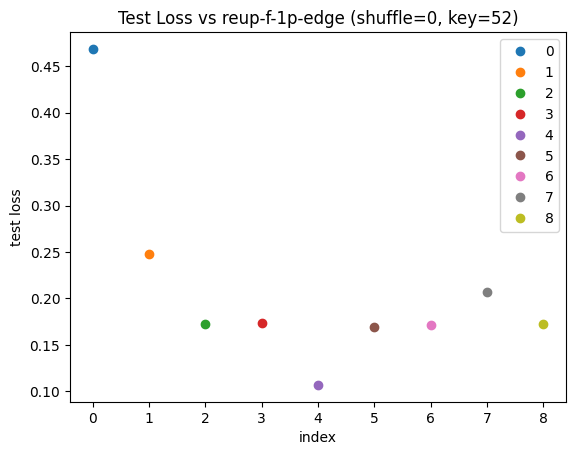

In [44]:
# ---- Cell 3: plot test loss vs. index ----
from p_pack import globals as g
from pathlib import Path

test_loss_folder = "edge-photon-reup-vary-s0-k52/test-pos0"
file_indent = 't'
indexes_to_plot = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
legend_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

fig, ax = g.plt.subplots()

script_dir = g.os.getcwd()
parent_dir = g.os.path.abspath(g.os.path.join(script_dir, '..'))
test_folder_path = g.os.path.join(parent_dir, 'work', test_loss_folder)

test_vals = []
for idx, label in zip(indexes_to_plot, legend_names):
    matches = list(Path(test_folder_path).glob(f't{idx}*.npz'))
    if not matches:
        print(f'[Warning] Test loss file for index {idx} not found.')
        continue
    tl = g.np.load(matches[0])['test_loss'].item()
    test_vals.append(tl)
    ax.plot(idx, tl, 'o', label=label)

ax.set(xlabel='index', ylabel='test loss', title=f'Test Loss vs reup-f-1p-edge (shuffle={gl['shuffle_type'].item()}, key={gl['shuffle_key'][1].item()})')
ax.legend()
g.plt.show()


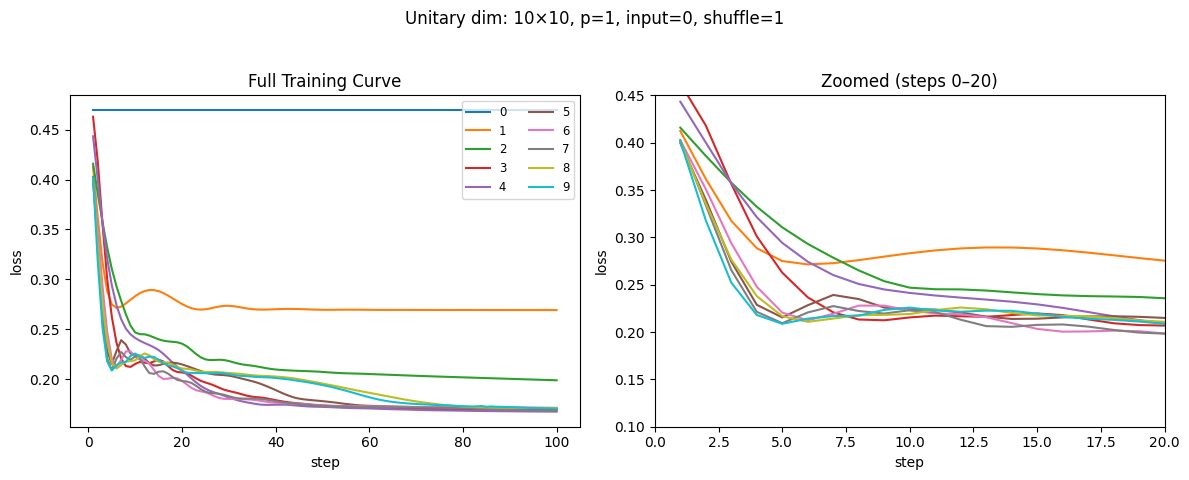

In [12]:
# ---- Cell 2: init_phases-2 curves with optional test-loss lines ----
from p_pack import globals as g
from pathlib import Path

# -------- Configuration --------
data_folder = "edge-photon-reup-vary-s1/Learning"
file_indent = 'f'
indexes_to_plot = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  # Choose the indexes you want to plot
legend_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]  # Custom labels, must match index order
x_min = 0
x_max = 20
y_min = 0.1
y_max = 0.45
plot_test_loss = 0  # set to 1 to show test loss lines
test_loss_folder = "reup-vary-1p-edge/test-1p-edge"

# Create two side-by-side plots
fig, (ax_full, ax_zoom) = g.plt.subplots(1, 2, figsize=(12, 5))

# Set data folder path
script_dir = g.os.getcwd()
parent_dir = g.os.path.abspath(g.os.path.join(script_dir, ".."))
data_folder_path = g.os.path.join(parent_dir, "work", data_folder)
test_folder_path = g.os.path.join(parent_dir, "work", test_loss_folder)

# Loop over the selected indexes and legend labels
for idx, label in zip(indexes_to_plot, legend_names):
    matches = list(Path(data_folder_path).glob(f"it{idx}{file_indent}*g.npz"))
    if not matches:
        print(f"[Warning] Global file for index {idx} not found.")
        continue

    global_name = matches[0].name
    data_name   = global_name.replace("g.npz", ".npz")

    data_path    = g.os.path.join(data_folder_path, data_name)
    globals_path = g.os.path.join(data_folder_path, global_name)

    out    = g.np.load(data_path)
    steps  = out["loss_mem"][:, 0].astype(int)
    losses = out["loss_mem"][:, 1].astype(float)

    # plot training loss and capture its color
    line_full, = ax_full.plot(steps, losses, linewidth=1.5, label=label)
    line_zoom, = ax_zoom.plot(steps, losses, linewidth=1.5, label=label)
    color = line_full.get_color()

    if plot_test_loss:
        test_name = 'tl' + global_name[2:].replace('g.npz', '.npz')
        test_path = g.os.path.join(test_folder_path, test_name)
        if g.os.path.exists(test_path):
            tl = g.np.load(test_path)['test_loss'].item()
            # draw test-loss as a horizontal line in the same color
            ax_full.axline((0, tl), (1, tl),
                           linestyle='--',
                           color=color,
                           label=f'test {label}')
            ax_zoom.axline((0, tl), (1, tl),
                           linestyle='--',
                           color=color)
        else:
            print(f"[Warning] Test loss file {test_name} not found.")

# finalize axes
ax_full.set(xlabel='step', ylabel='loss', title='Full Training Curve')
ax_zoom.set(xlim=(x_min, x_max), ylim=(y_min, y_max),
            xlabel='step', ylabel='loss',
            title=f'Zoomed (steps {x_min}–{x_max})')

handles, labels = ax_full.get_legend_handles_labels()
ax_full.legend(handles, labels, loc='upper right', ncol=2, fontsize='small')

gl    = g.np.load(globals_path)
shape = out['carry_0'].shape
fig.suptitle(
    f"Unitary dim: {2*shape[1]}×{2*shape[1]}, p={gl['p_suc_inputs'].item()}, input={gl['input_positions'].item()}, shuffle={gl['shuffle_type'].item()}"
)

g.plt.tight_layout(rect=[0, 0.03, 1, 0.95])
g.plt.show()


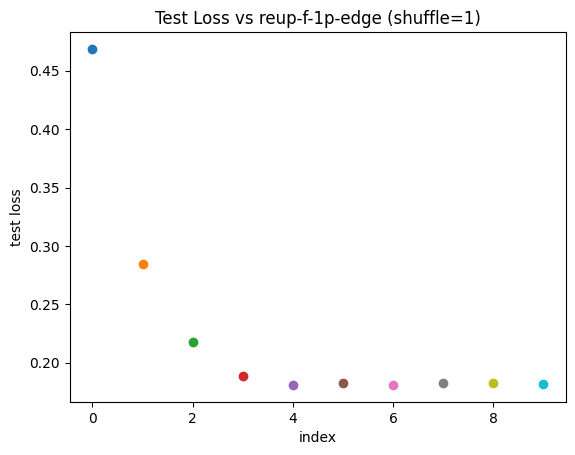

In [13]:
# ---- Cell 3: plot test loss vs. index ----
from p_pack import globals as g
from pathlib import Path

test_loss_folder = "edge-photon-reup-vary-s1/test-1p-edge"
file_indent = 't'
indexes_to_plot = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
legend_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

fig, ax = g.plt.subplots()

script_dir = g.os.getcwd()
parent_dir = g.os.path.abspath(g.os.path.join(script_dir, '..'))
test_folder_path = g.os.path.join(parent_dir, 'work', test_loss_folder)

test_vals = []
for idx, label in zip(indexes_to_plot, legend_names):
    matches = list(Path(test_folder_path).glob(f't{idx}*.npz'))
    if not matches:
        print(f'[Warning] Test loss file for index {idx} not found.')
        continue
    tl = g.np.load(matches[0])['test_loss'].item()
    test_vals.append(tl)
    ax.plot(idx, tl, 'o', label=label)

ax.set(xlabel='index', ylabel='test loss', title=f'Test Loss vs reup-f-1p-edge (shuffle={gl['shuffle_type'].item()})')
g.plt.show()


In [5]:
# ---- Cell 2: init_phases-2 curves with optional test-loss lines ----
from p_pack import globals as g
from pathlib import Path

# -------- Configuration --------
data_folder = "edge-photon-reup-vary-s2/Learning"
file_indent = 'f'
indexes_to_plot = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  # Choose the indexes you want to plot
legend_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]  # Custom labels, must match index order
x_min = 0
x_max = 20
y_min = 0.1
y_max = 0.45
plot_test_loss = 0  # set to 1 to show test loss lines
test_loss_folder = "reup-vary-1p-edge/test-1p-edge"

# Create two side-by-side plots
fig, (ax_full, ax_zoom) = g.plt.subplots(1, 2, figsize=(12, 5))

# Set data folder path
script_dir = g.os.getcwd()
parent_dir = g.os.path.abspath(g.os.path.join(script_dir, ".."))
data_folder_path = g.os.path.join(parent_dir, "work", data_folder)
test_folder_path = g.os.path.join(parent_dir, "work", test_loss_folder)

# Loop over the selected indexes and legend labels
for idx, label in zip(indexes_to_plot, legend_names):
    matches = list(Path(data_folder_path).glob(f"it{idx}{file_indent}*g.npz"))
    if not matches:
        print(f"[Warning] Global file for index {idx} not found.")
        continue

    global_name = matches[0].name
    data_name   = global_name.replace("g.npz", ".npz")

    data_path    = g.os.path.join(data_folder_path, data_name)
    globals_path = g.os.path.join(data_folder_path, global_name)

    out    = g.np.load(data_path)
    steps  = out["loss_mem"][:, 0].astype(int)
    losses = out["loss_mem"][:, 1].astype(float)

    # plot training loss and capture its color
    line_full, = ax_full.plot(steps, losses, linewidth=1.5, label=label)
    line_zoom, = ax_zoom.plot(steps, losses, linewidth=1.5, label=label)
    color = line_full.get_color()

    if plot_test_loss:
        test_name = 'tl' + global_name[2:].replace('g.npz', '.npz')
        test_path = g.os.path.join(test_folder_path, test_name)
        if g.os.path.exists(test_path):
            tl = g.np.load(test_path)['test_loss'].item()
            # draw test-loss as a horizontal line in the same color
            ax_full.axline((0, tl), (1, tl),
                           linestyle='--',
                           color=color,
                           label=f'test {label}')
            ax_zoom.axline((0, tl), (1, tl),
                           linestyle='--',
                           color=color)
        else:
            print(f"[Warning] Test loss file {test_name} not found.")

# finalize axes
ax_full.set(xlabel='step', ylabel='loss', title='Full Training Curve')
ax_zoom.set(xlim=(x_min, x_max), ylim=(y_min, y_max),
            xlabel='step', ylabel='loss',
            title=f'Zoomed (steps {x_min}–{x_max})')

handles, labels = ax_full.get_legend_handles_labels()
ax_full.legend(handles, labels, loc='upper right', ncol=2, fontsize='small')

gl    = g.np.load(globals_path)
shape = out['carry_0'].shape
fig.suptitle(
    f"Unitary dim: {2*shape[1]}×{2*shape[1]}, p={gl['p_suc_inputs'].item()}, input={gl['input_positions'].item()}, shuffle={gl['shuffle_type'].item()}"
)

g.plt.tight_layout(rect=[0, 0.03, 1, 0.95])
g.plt.show()



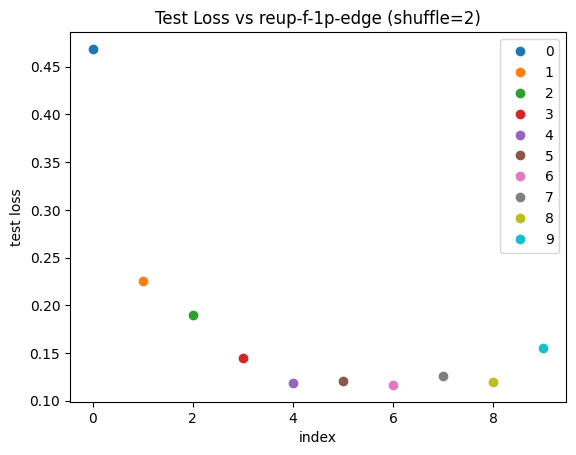

In [11]:
# ---- Cell 3: plot test loss vs. index ----
from p_pack import globals as g
from pathlib import Path

test_loss_folder = "edge-photon-reup-vary-s2/test-1p-edge"
file_indent = 't'
indexes_to_plot = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
legend_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

fig, ax = g.plt.subplots()

script_dir = g.os.getcwd()
parent_dir = g.os.path.abspath(g.os.path.join(script_dir, '..'))
test_folder_path = g.os.path.join(parent_dir, 'work', test_loss_folder)

test_vals = []
for idx, label in zip(indexes_to_plot, legend_names):
    matches = list(Path(test_folder_path).glob(f't{idx}*.npz'))
    if not matches:
        print(f'[Warning] Test loss file for index {idx} not found.')
        continue
    tl = g.np.load(matches[0])['test_loss'].item()
    test_vals.append(tl)
    ax.plot(idx, tl, 'o', label=label)

ax.set(xlabel='index', ylabel='test loss', title=f'Test Loss vs reup-f-1p-edge (shuffle={gl['shuffle_type'].item()})')
ax.legend()
g.plt.show()


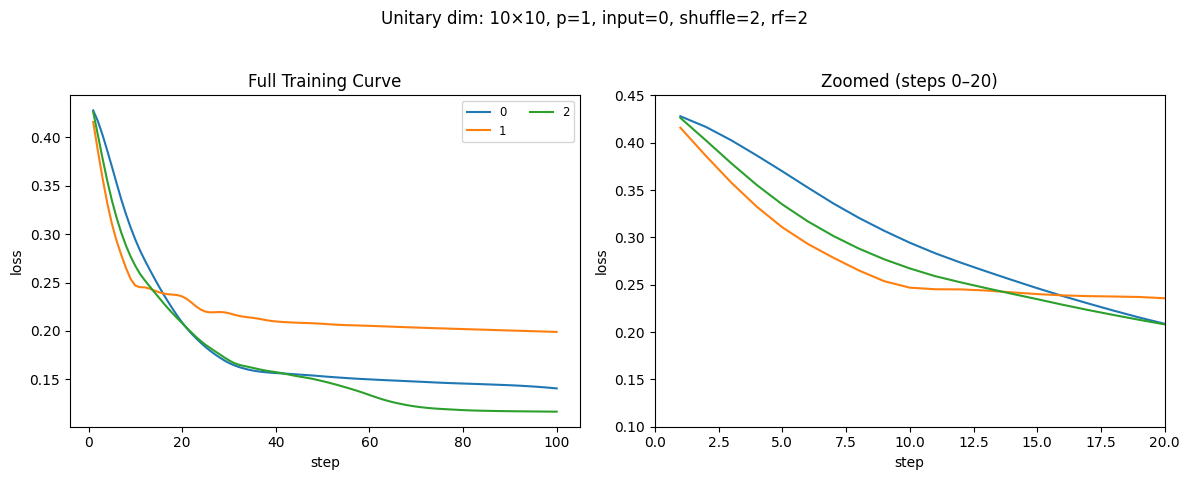

In [27]:
# ---- Cell 2: init_phases-2 curves with optional test-loss lines ----
from p_pack import globals as g
from pathlib import Path

# -------- Configuration --------
data_folder = "p1-position0-vs-shuffle-rf2/Learning"
file_indent = 'f'
indexes_to_plot = [0, 1, 2]  # Choose the indexes you want to plot
legend_names = ["0", "1", "2"] # Custom labels, must match index order
x_min = 0
x_max = 20
y_min = 0.1
y_max = 0.45
plot_test_loss = 0 # set to 1 to show test loss lines
test_loss_folder = "p1-position0-vs-shuffle-rf2/test-pos0"

# Create two side-by-side plots
fig, (ax_full, ax_zoom) = g.plt.subplots(1, 2, figsize=(12, 5))

# Set data folder path
script_dir = g.os.getcwd()
parent_dir = g.os.path.abspath(g.os.path.join(script_dir, ".."))
data_folder_path = g.os.path.join(parent_dir, "work", data_folder)
test_folder_path = g.os.path.join(parent_dir, "work", test_loss_folder)

# Loop over the selected indexes and legend labels
for idx, label in zip(indexes_to_plot, legend_names):
    matches = list(Path(data_folder_path).glob(f"it{idx}{file_indent}*g.npz"))
    if not matches:
        print(f"[Warning] Global file for index {idx} not found.")
        continue

    global_name = matches[0].name
    data_name   = global_name.replace("g.npz", ".npz")

    data_path    = g.os.path.join(data_folder_path, data_name)
    globals_path = g.os.path.join(data_folder_path, global_name)

    out    = g.np.load(data_path)
    steps  = out["loss_mem"][:, 0].astype(int)
    losses = out["loss_mem"][:, 1].astype(float)

    # plot training loss and capture its color
    line_full, = ax_full.plot(steps, losses, linewidth=1.5, label=label)
    line_zoom, = ax_zoom.plot(steps, losses, linewidth=1.5, label=label)
    color = line_full.get_color()

    if plot_test_loss:
        test_name = 't' + global_name[2:].replace('g.npz', '.npz')
        test_path = g.os.path.join(test_folder_path, test_name)
        if g.os.path.exists(test_path):
            tl = g.np.load(test_path)['test_loss'].item()
            # draw test-loss as a horizontal line in the same color
            ax_full.axline((0, tl), (1, tl),
                           linestyle='--',
                           color=color,
                           label=f'test {label}')
            ax_zoom.axline((0, tl), (1, tl),
                           linestyle='--',
                           color=color)
        else:
            print(f"[Warning] Test loss file {test_name} not found.")

# finalize axes
ax_full.set(xlabel='step', ylabel='loss', title='Full Training Curve')
ax_zoom.set(xlim=(x_min, x_max), ylim=(y_min, y_max),
            xlabel='step', ylabel='loss',
            title=f'Zoomed (steps {x_min}–{x_max})')

handles, labels = ax_full.get_legend_handles_labels()
ax_full.legend(handles, labels, loc='upper right', ncol=2, fontsize='small')

gl    = g.np.load(globals_path)
shape = out['carry_0'].shape
fig.suptitle(
    f"Unitary dim: {2*shape[1]}×{2*shape[1]}, p={gl['p_suc_inputs'].item()}, input={gl['input_positions'].item()}, shuffle={gl['shuffle_type'].item()}, rf={gl['reupload_freq'].item()}"
)

g.plt.tight_layout(rect=[0, 0.03, 1, 0.95])
g.plt.show()



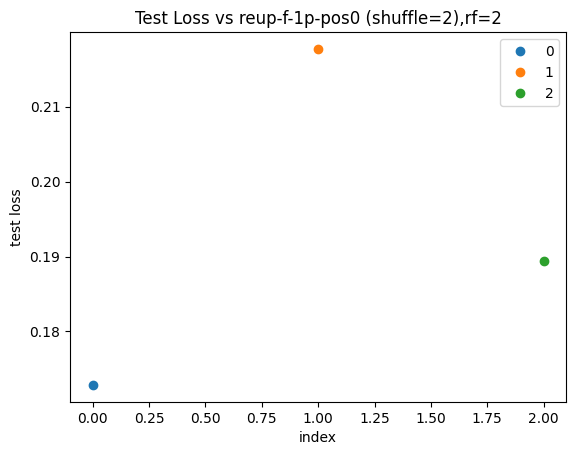

In [28]:
# ---- Cell 3: plot test loss vs. index ----
from p_pack import globals as g
from pathlib import Path

test_loss_folder = "p1-position0-vs-shuffle-rf2/test-pos0"
file_indent = 't'
indexes_to_plot = [0, 1, 2]
legend_names = ["0", "1", "2"]

fig, ax = g.plt.subplots()

script_dir = g.os.getcwd()
parent_dir = g.os.path.abspath(g.os.path.join(script_dir, '..'))
test_folder_path = g.os.path.join(parent_dir, 'work', test_loss_folder)

test_vals = []
for idx, label in zip(indexes_to_plot, legend_names):
    matches = list(Path(test_folder_path).glob(f't{idx}*.npz'))
    if not matches:
        print(f'[Warning] Test loss file for index {idx} not found.')
        continue
    tl = g.np.load(matches[0])['test_loss'].item()
    test_vals.append(tl)
    ax.plot(idx, tl, 'o', label=label)

ax.set(xlabel='index', ylabel='test loss', title=f'Test Loss vs reup-f-1p-pos{gl['input_positions'].item()} (shuffle={gl['shuffle_type'].item()}),rf={gl['reupload_freq'].item()}')
ax.legend()
g.plt.show()


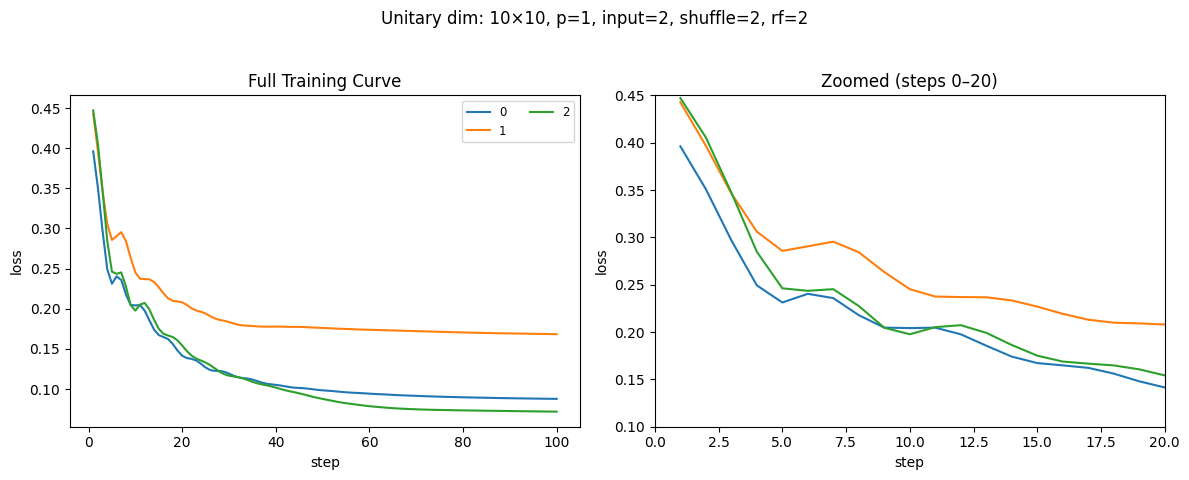

In [ ]:
# ---- Cell 2: init_phases-2 curves with optional test-loss lines ----
from p_pack import globals as g
from pathlib import Path

# -------- Configuration --------
data_folder = "p1-position2-vs-shuffle-rf2/Learning"
file_indent = 'f'
indexes_to_plot = [0, 1, 2]  # Choose the indexes you want to plot
legend_names = ["0", "1", "2"] # Custom labels, must match index order
x_min = 0
x_max = 20
y_min = 0.1
y_max = 0.45
plot_test_loss = 0 # set to 1 to show test loss lines
test_loss_folder = "p1-position0-vs-shuffle-rf2/test-pos0"

# Create two side-by-side plots
fig, (ax_full, ax_zoom) = g.plt.subplots(1, 2, figsize=(12, 5))

# Set data folder path
script_dir = g.os.getcwd()
parent_dir = g.os.path.abspath(g.os.path.join(script_dir, ".."))
data_folder_path = g.os.path.join(parent_dir, "work", data_folder)
test_folder_path = g.os.path.join(parent_dir, "work", test_loss_folder)

# Loop over the selected indexes and legend labels
for idx, label in zip(indexes_to_plot, legend_names):
    matches = list(Path(data_folder_path).glob(f"it{idx}{file_indent}*g.npz"))
    if not matches:
        print(f"[Warning] Global file for index {idx} not found.")
        continue

    global_name = matches[0].name
    data_name   = global_name.replace("g.npz", ".npz")

    data_path    = g.os.path.join(data_folder_path, data_name)
    globals_path = g.os.path.join(data_folder_path, global_name)

    out    = g.np.load(data_path)
    steps  = out["loss_mem"][:, 0].astype(int)
    losses = out["loss_mem"][:, 1].astype(float)

    # plot training loss and capture its color
    line_full, = ax_full.plot(steps, losses, linewidth=1.5, label=label)
    line_zoom, = ax_zoom.plot(steps, losses, linewidth=1.5, label=label)
    color = line_full.get_color()

    if plot_test_loss:
        test_name = 't' + global_name[2:].replace('g.npz', '.npz')
        test_path = g.os.path.join(test_folder_path, test_name)
        if g.os.path.exists(test_path):
            tl = g.np.load(test_path)['test_loss'].item()
            # draw test-loss as a horizontal line in the same color
            ax_full.axline((0, tl), (1, tl),
                           linestyle='--',
                           color=color,
                           label=f'test {label}')
            ax_zoom.axline((0, tl), (1, tl),
                           linestyle='--',
                           color=color)
        else:
            print(f"[Warning] Test loss file {test_name} not found.")

# finalize axes
ax_full.set(xlabel='step', ylabel='loss', title='Full Training Curve')
ax_zoom.set(xlim=(x_min, x_max), ylim=(y_min, y_max),
            xlabel='step', ylabel='loss',
            title=f'Zoomed (steps {x_min}–{x_max})')

handles, labels = ax_full.get_legend_handles_labels()
ax_full.legend(handles, labels, loc='upper right', ncol=2, fontsize='small')

gl    = g.np.load(globals_path)
shape = out['carry_0'].shape
fig.suptitle(
    f"Unitary dim: {2*shape[1]}×{2*shape[1]}, p={gl['p_suc_inputs'].item()}, input={gl['input_positions'].item()}, shuffle={gl['shuffle_type'].item()}, rf={gl['reupload_freq'].item()}"
)

g.plt.tight_layout(rect=[0, 0.03, 1, 0.95])
g.plt.show()



In [31]:
# ---- Cell 3: plot test loss vs. index ----
from p_pack import globals as g
from pathlib import Path

test_loss_folder = "p1-position2-vs-shuffle-rf2/test-pos2"
file_indent = 't'
indexes_to_plot = [0, 1, 2]
legend_names = ["0", "1", "2"]

fig, ax = g.plt.subplots()

script_dir = g.os.getcwd()
parent_dir = g.os.path.abspath(g.os.path.join(script_dir, '..'))
test_folder_path = g.os.path.join(parent_dir, 'work', test_loss_folder)

test_vals = []
for idx, label in zip(indexes_to_plot, legend_names):
    matches = list(Path(test_folder_path).glob(f't{idx}*.npz'))
    if not matches:
        print(f'[Warning] Test loss file for index {idx} not found.')
        continue
    tl = g.np.load(matches[0])['test_loss'].item()
    test_vals.append(tl)
    ax.plot(idx, tl, 'o', label=label)

ax.set(xlabel='index', ylabel='test loss', title=f'Test Loss vs reup-f-1p-pos{gl['input_positions'].item()} (shuffle={gl['shuffle_type'].item()}),rf={gl['reupload_freq'].item()}')
ax.legend()
g.plt.show()


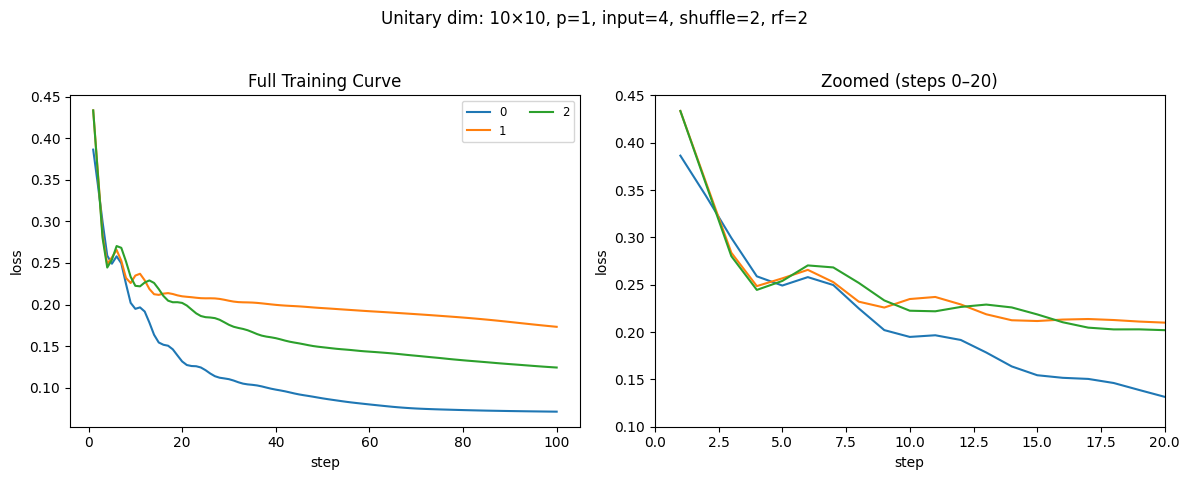

In [32]:
# ---- Cell 2: init_phases-2 curves with optional test-loss lines ----
from p_pack import globals as g
from pathlib import Path

# -------- Configuration --------
data_folder = "p1-position4-vs-shuffle-rf2/Learning"
file_indent = 'f'
indexes_to_plot = [0, 1, 2]  # Choose the indexes you want to plot
legend_names = ["0", "1", "2"] # Custom labels, must match index order
x_min = 0
x_max = 20
y_min = 0.1
y_max = 0.45
plot_test_loss = 0 # set to 1 to show test loss lines
test_loss_folder = "p1-position0-vs-shuffle-rf2/test-pos0"

# Create two side-by-side plots
fig, (ax_full, ax_zoom) = g.plt.subplots(1, 2, figsize=(12, 5))

# Set data folder path
script_dir = g.os.getcwd()
parent_dir = g.os.path.abspath(g.os.path.join(script_dir, ".."))
data_folder_path = g.os.path.join(parent_dir, "work", data_folder)
test_folder_path = g.os.path.join(parent_dir, "work", test_loss_folder)

# Loop over the selected indexes and legend labels
for idx, label in zip(indexes_to_plot, legend_names):
    matches = list(Path(data_folder_path).glob(f"it{idx}{file_indent}*g.npz"))
    if not matches:
        print(f"[Warning] Global file for index {idx} not found.")
        continue

    global_name = matches[0].name
    data_name   = global_name.replace("g.npz", ".npz")

    data_path    = g.os.path.join(data_folder_path, data_name)
    globals_path = g.os.path.join(data_folder_path, global_name)

    out    = g.np.load(data_path)
    steps  = out["loss_mem"][:, 0].astype(int)
    losses = out["loss_mem"][:, 1].astype(float)

    # plot training loss and capture its color
    line_full, = ax_full.plot(steps, losses, linewidth=1.5, label=label)
    line_zoom, = ax_zoom.plot(steps, losses, linewidth=1.5, label=label)
    color = line_full.get_color()

    if plot_test_loss:
        test_name = 't' + global_name[2:].replace('g.npz', '.npz')
        test_path = g.os.path.join(test_folder_path, test_name)
        if g.os.path.exists(test_path):
            tl = g.np.load(test_path)['test_loss'].item()
            # draw test-loss as a horizontal line in the same color
            ax_full.axline((0, tl), (1, tl),
                           linestyle='--',
                           color=color,
                           label=f'test {label}')
            ax_zoom.axline((0, tl), (1, tl),
                           linestyle='--',
                           color=color)
        else:
            print(f"[Warning] Test loss file {test_name} not found.")

# finalize axes
ax_full.set(xlabel='step', ylabel='loss', title='Full Training Curve')
ax_zoom.set(xlim=(x_min, x_max), ylim=(y_min, y_max),
            xlabel='step', ylabel='loss',
            title=f'Zoomed (steps {x_min}–{x_max})')

handles, labels = ax_full.get_legend_handles_labels()
ax_full.legend(handles, labels, loc='upper right', ncol=2, fontsize='small')

gl    = g.np.load(globals_path)
shape = out['carry_0'].shape
fig.suptitle(
    f"Unitary dim: {2*shape[1]}×{2*shape[1]}, p={gl['p_suc_inputs'].item()}, input={gl['input_positions'].item()}, shuffle={gl['shuffle_type'].item()}, rf={gl['reupload_freq'].item()}"
)

g.plt.tight_layout(rect=[0, 0.03, 1, 0.95])
g.plt.show()



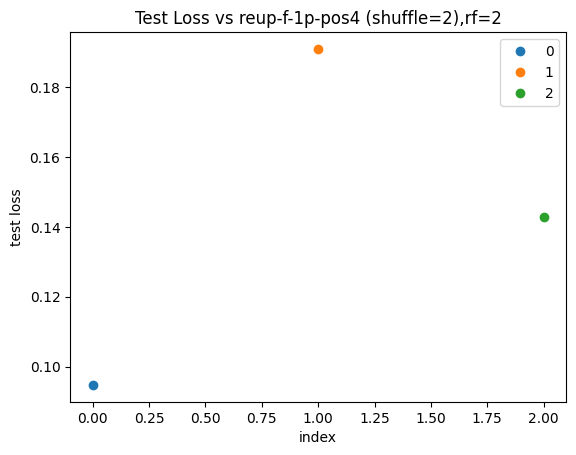

In [33]:
# ---- Cell 3: plot test loss vs. index ----
from p_pack import globals as g
from pathlib import Path

test_loss_folder = "p1-position4-vs-shuffle-rf2/test-pos4"
file_indent = 't'
indexes_to_plot = [0, 1, 2]
legend_names = ["0", "1", "2"]

fig, ax = g.plt.subplots()

script_dir = g.os.getcwd()
parent_dir = g.os.path.abspath(g.os.path.join(script_dir, '..'))
test_folder_path = g.os.path.join(parent_dir, 'work', test_loss_folder)

test_vals = []
for idx, label in zip(indexes_to_plot, legend_names):
    matches = list(Path(test_folder_path).glob(f't{idx}*.npz'))
    if not matches:
        print(f'[Warning] Test loss file for index {idx} not found.')
        continue
    tl = g.np.load(matches[0])['test_loss'].item()
    test_vals.append(tl)
    ax.plot(idx, tl, 'o', label=label)

ax.set(xlabel='index', ylabel='test loss', title=f'Test Loss vs reup-f-1p-pos{gl['input_positions'].item()} (shuffle={gl['shuffle_type'].item()}),rf={gl['reupload_freq'].item()}')
ax.legend()
g.plt.show()


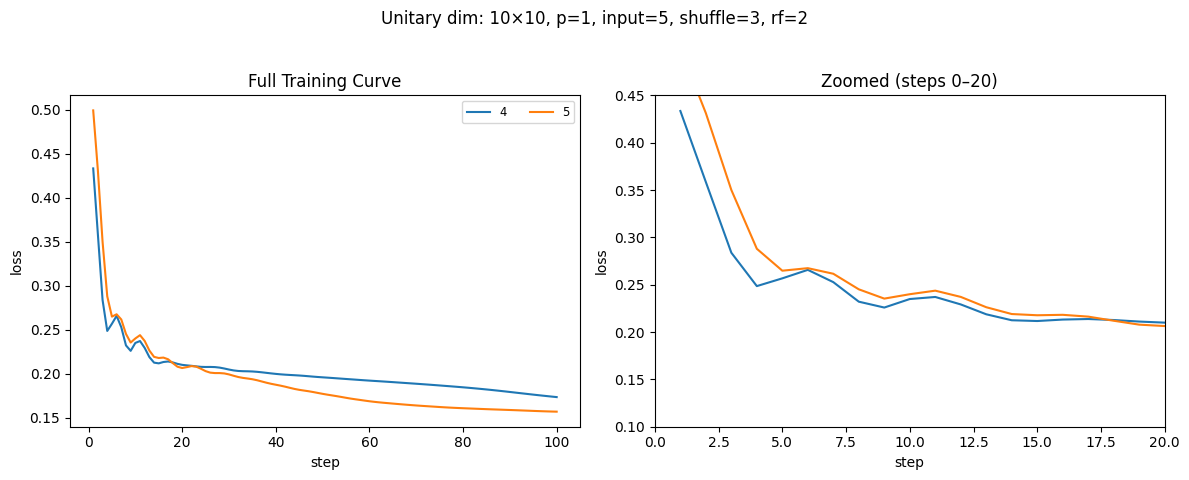

In [2]:
# ---- Cell 2: init_phases-2 curves with optional test-loss lines ----
from p_pack import globals as g
from pathlib import Path

# -------- Configuration --------
data_folder = "symmetry-false/Learning"
file_indent = 'f'
indexes_to_plot = [0, 1]  # Choose the indexes you want to plot
legend_names = ["4", "5"] # Custom labels, must match index order
x_min = 0
x_max = 20
y_min = 0.1
y_max = 0.45
plot_test_loss = 0 # set to 1 to show test loss lines
test_loss_folder = "p1-position0-vs-shuffle-rf2/test-pos0"

# Create two side-by-side plots
fig, (ax_full, ax_zoom) = g.plt.subplots(1, 2, figsize=(12, 5))

# Set data folder path
script_dir = g.os.getcwd()
parent_dir = g.os.path.abspath(g.os.path.join(script_dir, ".."))
data_folder_path = g.os.path.join(parent_dir, "work", data_folder)
test_folder_path = g.os.path.join(parent_dir, "work", test_loss_folder)

# Loop over the selected indexes and legend labels
for idx, label in zip(indexes_to_plot, legend_names):
    matches = list(Path(data_folder_path).glob(f"it{idx}{file_indent}*g.npz"))
    if not matches:
        print(f"[Warning] Global file for index {idx} not found.")
        continue

    global_name = matches[0].name
    data_name   = global_name.replace("g.npz", ".npz")

    data_path    = g.os.path.join(data_folder_path, data_name)
    globals_path = g.os.path.join(data_folder_path, global_name)

    out    = g.np.load(data_path)
    steps  = out["loss_mem"][:, 0].astype(int)
    losses = out["loss_mem"][:, 1].astype(float)

    # plot training loss and capture its color
    line_full, = ax_full.plot(steps, losses, linewidth=1.5, label=label)
    line_zoom, = ax_zoom.plot(steps, losses, linewidth=1.5, label=label)
    color = line_full.get_color()

    if plot_test_loss:
        test_name = 't' + global_name[2:].replace('g.npz', '.npz')
        test_path = g.os.path.join(test_folder_path, test_name)
        if g.os.path.exists(test_path):
            tl = g.np.load(test_path)['test_loss'].item()
            # draw test-loss as a horizontal line in the same color
            ax_full.axline((0, tl), (1, tl),
                           linestyle='--',
                           color=color,
                           label=f'test {label}')
            ax_zoom.axline((0, tl), (1, tl),
                           linestyle='--',
                           color=color)
        else:
            print(f"[Warning] Test loss file {test_name} not found.")

# finalize axes
ax_full.set(xlabel='step', ylabel='loss', title='Full Training Curve')
ax_zoom.set(xlim=(x_min, x_max), ylim=(y_min, y_max),
            xlabel='step', ylabel='loss',
            title=f'Zoomed (steps {x_min}–{x_max})')

handles, labels = ax_full.get_legend_handles_labels()
ax_full.legend(handles, labels, loc='upper right', ncol=2, fontsize='small')

gl    = g.np.load(globals_path)
shape = out['carry_0'].shape
fig.suptitle(
    f"Unitary dim: {2*shape[1]}×{2*shape[1]}, p={gl['p_suc_inputs'].item()}, input={gl['input_positions'].item()}, shuffle={gl['shuffle_type'].item()}, rf={gl['reupload_freq'].item()}"
)

g.plt.tight_layout(rect=[0, 0.03, 1, 0.95])
g.plt.show()



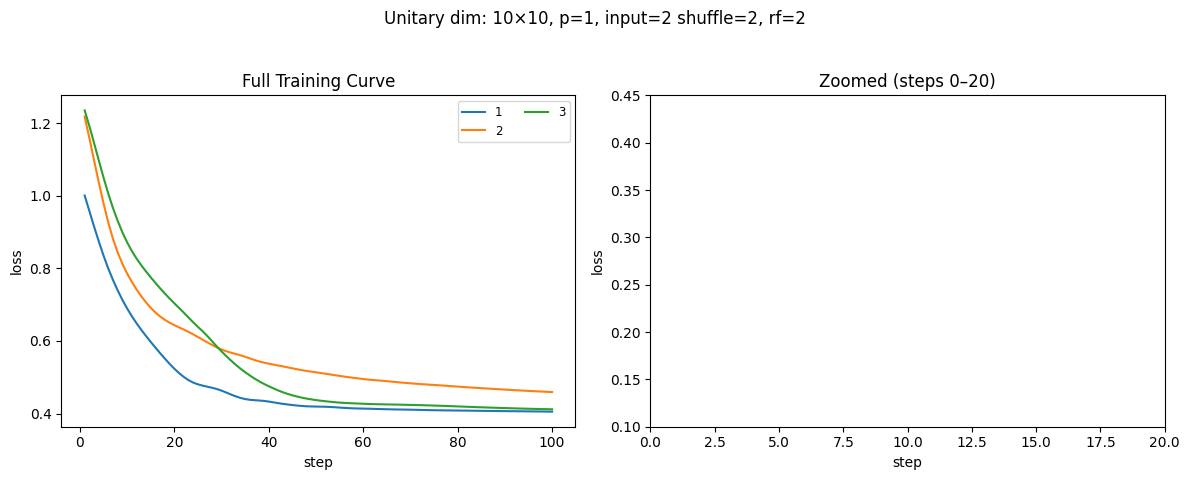

In [72]:
# ---- Cell 2: init_phases-2 curves with optional test-loss lines ----
from p_pack import globals as g
from pathlib import Path

# -------- Configuration --------
data_folder = "symmetry-true-2p/Learning"
file_indent = 'f'
indexes_to_plot = [0, 1, 2]  # Choose the indexes you want to plot
legend_names = ["1", "2", "3"] # Custom labels, must match index order
x_min = 0
x_max = 20
y_min = 0.1
y_max = 0.45
plot_test_loss = 0 # set to 1 to show test loss lines
test_loss_folder = "p1-position0-vs-shuffle-rf2/test-pos0"

# Create two side-by-side plots
fig, (ax_full, ax_zoom) = g.plt.subplots(1, 2, figsize=(12, 5))

# Set data folder path
script_dir = g.os.getcwd()
parent_dir = g.os.path.abspath(g.os.path.join(script_dir, ".."))
data_folder_path = g.os.path.join(parent_dir, "work", data_folder)
test_folder_path = g.os.path.join(parent_dir, "work", test_loss_folder)

# Loop over the selected indexes and legend labels
for idx, label in zip(indexes_to_plot, legend_names):
    matches = list(Path(data_folder_path).glob(f"it{idx}{file_indent}*g.npz"))
    if not matches:
        print(f"[Warning] Global file for index {idx} not found.")
        continue

    global_name = matches[0].name
    data_name   = global_name.replace("g.npz", ".npz")

    data_path    = g.os.path.join(data_folder_path, data_name)
    globals_path = g.os.path.join(data_folder_path, global_name)

    out    = g.np.load(data_path)
    steps  = out["loss_mem"][:, 0].astype(int)
    losses = out["loss_mem"][:, 1].astype(float)

    # plot training loss and capture its color
    line_full, = ax_full.plot(steps, losses, linewidth=1.5, label=label)
    line_zoom, = ax_zoom.plot(steps, losses, linewidth=1.5, label=label)
    color = line_full.get_color()

    if plot_test_loss:
        test_name = 't' + global_name[2:].replace('g.npz', '.npz')
        test_path = g.os.path.join(test_folder_path, test_name)
        if g.os.path.exists(test_path):
            tl = g.np.load(test_path)['test_loss'].item()
            # draw test-loss as a horizontal line in the same color
            ax_full.axline((0, tl), (1, tl),
                           linestyle='--',
                           color=color,
                           label=f'test {label}')
            ax_zoom.axline((0, tl), (1, tl),
                           linestyle='--',
                           color=color)
        else:
            print(f"[Warning] Test loss file {test_name} not found.")

# finalize axes
ax_full.set(xlabel='step', ylabel='loss', title='Full Training Curve')
ax_zoom.set(xlim=(x_min, x_max), ylim=(y_min, y_max),
            xlabel='step', ylabel='loss',
            title=f'Zoomed (steps {x_min}–{x_max})')

handles, labels = ax_full.get_legend_handles_labels()
ax_full.legend(handles, labels, loc='upper right', ncol=2, fontsize='small')

gl    = g.np.load(globals_path)
shape = out['carry_0'].shape
fig.suptitle(
    f"Unitary dim: {2*shape[1]}×{2*shape[1]}, p={gl['p_suc_inputs'].item()}, input=2 shuffle={gl['shuffle_type'].item()}, rf={gl['reupload_freq'].item()}"
)

g.plt.tight_layout(rect=[0, 0.03, 1, 0.95])
g.plt.show()



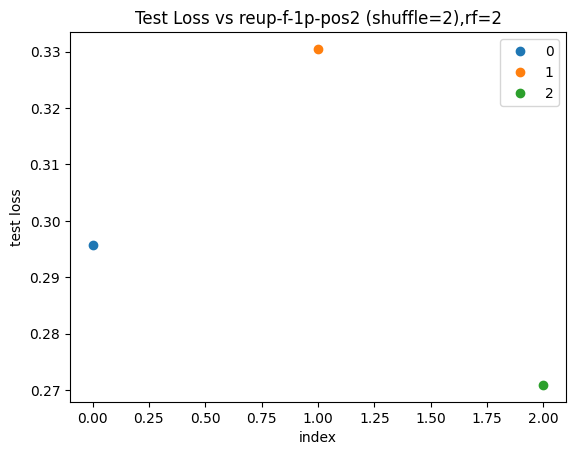

In [73]:
# ---- Cell 3: plot test loss vs. index ----
from p_pack import globals as g
from pathlib import Path

test_loss_folder = "symmetry-true-2p/test-p2"
file_indent = 't'
indexes_to_plot = [0, 1, 2]
legend_names = ["0", "1", "2"]

fig, ax = g.plt.subplots()

script_dir = g.os.getcwd()
parent_dir = g.os.path.abspath(g.os.path.join(script_dir, '..'))
test_folder_path = g.os.path.join(parent_dir, 'work', test_loss_folder)

test_vals = []
for idx, label in zip(indexes_to_plot, legend_names):
    matches = list(Path(test_folder_path).glob(f't{idx}*.npz'))
    if not matches:
        print(f'[Warning] Test loss file for index {idx} not found.')
        continue
    tl = g.np.load(matches[0])['test_loss'].item()
    test_vals.append(tl)
    ax.plot(idx, tl, 'o', label=label)

ax.set(xlabel='index', ylabel='test loss', title=f'Test Loss vs reup-f-1p-pos2 (shuffle={gl['shuffle_type'].item()}),rf={gl['reupload_freq'].item()}')
ax.legend()
g.plt.show()


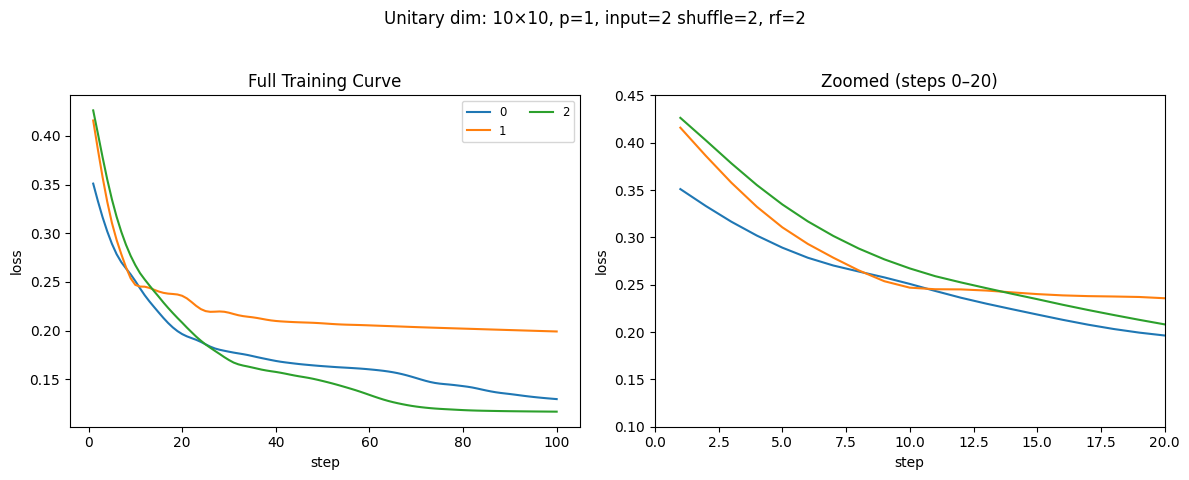

In [74]:
# ---- Cell 2: init_phases-2 curves with optional test-loss lines ----
from p_pack import globals as g
from pathlib import Path

# -------- Configuration --------
data_folder = "symmetry-false-2p/Learning"
file_indent = 'f'
indexes_to_plot = [0, 1, 2]  # Choose the indexes you want to plot
legend_names = ["0", "1", "2"] # Custom labels, must match index order
x_min = 0
x_max = 20
y_min = 0.1
y_max = 0.45
plot_test_loss = 0 # set to 1 to show test loss lines
test_loss_folder = "p1-position0-vs-shuffle-rf2/test-pos0"

# Create two side-by-side plots
fig, (ax_full, ax_zoom) = g.plt.subplots(1, 2, figsize=(12, 5))

# Set data folder path
script_dir = g.os.getcwd()
parent_dir = g.os.path.abspath(g.os.path.join(script_dir, ".."))
data_folder_path = g.os.path.join(parent_dir, "work", data_folder)
test_folder_path = g.os.path.join(parent_dir, "work", test_loss_folder)

# Loop over the selected indexes and legend labels
for idx, label in zip(indexes_to_plot, legend_names):
    matches = list(Path(data_folder_path).glob(f"it{idx}{file_indent}*g.npz"))
    if not matches:
        print(f"[Warning] Global file for index {idx} not found.")
        continue

    global_name = matches[0].name
    data_name   = global_name.replace("g.npz", ".npz")

    data_path    = g.os.path.join(data_folder_path, data_name)
    globals_path = g.os.path.join(data_folder_path, global_name)

    out    = g.np.load(data_path)
    steps  = out["loss_mem"][:, 0].astype(int)
    losses = out["loss_mem"][:, 1].astype(float)

    # plot training loss and capture its color
    line_full, = ax_full.plot(steps, losses, linewidth=1.5, label=label)
    line_zoom, = ax_zoom.plot(steps, losses, linewidth=1.5, label=label)
    color = line_full.get_color()

    if plot_test_loss:
        test_name = 't' + global_name[2:].replace('g.npz', '.npz')
        test_path = g.os.path.join(test_folder_path, test_name)
        if g.os.path.exists(test_path):
            tl = g.np.load(test_path)['test_loss'].item()
            # draw test-loss as a horizontal line in the same color
            ax_full.axline((0, tl), (1, tl),
                           linestyle='--',
                           color=color,
                           label=f'test {label}')
            ax_zoom.axline((0, tl), (1, tl),
                           linestyle='--',
                           color=color)
        else:
            print(f"[Warning] Test loss file {test_name} not found.")

# finalize axes
ax_full.set(xlabel='step', ylabel='loss', title='Full Training Curve')
ax_zoom.set(xlim=(x_min, x_max), ylim=(y_min, y_max),
            xlabel='step', ylabel='loss',
            title=f'Zoomed (steps {x_min}–{x_max})')

handles, labels = ax_full.get_legend_handles_labels()
ax_full.legend(handles, labels, loc='upper right', ncol=2, fontsize='small')

gl    = g.np.load(globals_path)
shape = out['carry_0'].shape
fig.suptitle(
    f"Unitary dim: {2*shape[1]}×{2*shape[1]}, p={gl['p_suc_inputs'].item()}, input=2 shuffle={gl['shuffle_type'].item()}, rf={gl['reupload_freq'].item()}"
)

g.plt.tight_layout(rect=[0, 0.03, 1, 0.95])
g.plt.show()



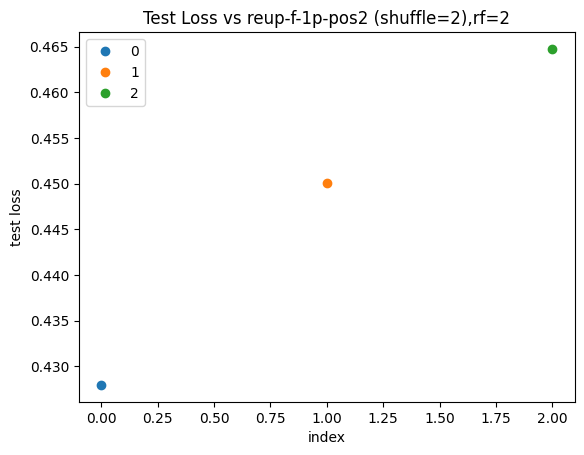

In [75]:
# ---- Cell 3: plot test loss vs. index ----
from p_pack import globals as g
from pathlib import Path

test_loss_folder = "symmetry-false-2p/test-p2"
file_indent = 't'
indexes_to_plot = [0, 1, 2]
legend_names = ["0", "1", "2"]

fig, ax = g.plt.subplots()

script_dir = g.os.getcwd()
parent_dir = g.os.path.abspath(g.os.path.join(script_dir, '..'))
test_folder_path = g.os.path.join(parent_dir, 'work', test_loss_folder)

test_vals = []
for idx, label in zip(indexes_to_plot, legend_names):
    matches = list(Path(test_folder_path).glob(f't{idx}*.npz'))
    if not matches:
        print(f'[Warning] Test loss file for index {idx} not found.')
        continue
    tl = g.np.load(matches[0])['test_loss'].item()
    test_vals.append(tl)
    ax.plot(idx, tl, 'o', label=label)

ax.set(xlabel='index', ylabel='test loss', title=f'Test Loss vs reup-f-1p-pos2 (shuffle={gl['shuffle_type'].item()}),rf={gl['reupload_freq'].item()}')
ax.legend()
g.plt.show()


In [82]:
# ---- Cell 2: init_phases-2 curves with optional test-loss lines ----
from p_pack import globals as g
from pathlib import Path

# -------- Configuration --------
data_folders = ("reup-d4-s0/Learning", "reup-d4-s1/Learning", "reup-d4-s2/Learning")
for i in data_folders:
    data_folder = i
    file_indent = 'f'
    indexes_to_plot = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  # Choose the indexes you want to plot
    legend_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]  # Custom labels, must match index order
    x_min = 0
    x_max = 20
    y_min = 0.1
    y_max = 0.45
    plot_test_loss = 0 # set to 1 to show test loss lines
    test_loss_folder = "p1-position0-vs-shuffle-rf2/test-pos0"

    # Create two side-by-side plots
    fig, (ax_full, ax_zoom) = g.plt.subplots(1, 2, figsize=(12, 5))

    # Set data folder path
    script_dir = g.os.getcwd()
    parent_dir = g.os.path.abspath(g.os.path.join(script_dir, ".."))
    data_folder_path = g.os.path.join(parent_dir, "work", data_folder)
    test_folder_path = g.os.path.join(parent_dir, "work", test_loss_folder)

    # Loop over the selected indexes and legend labels
    for idx, label in zip(indexes_to_plot, legend_names):
        matches = list(Path(data_folder_path).glob(f"it{idx}{file_indent}*g.npz"))
        if not matches:
            print(f"[Warning] Global file for index {idx} not found.")
            continue

        global_name = matches[0].name
        data_name   = global_name.replace("g.npz", ".npz")

        data_path    = g.os.path.join(data_folder_path, data_name)
        globals_path = g.os.path.join(data_folder_path, global_name)

        out    = g.np.load(data_path)
        steps  = out["loss_mem"][:, 0].astype(int)
        losses = out["loss_mem"][:, 1].astype(float)

        # plot training loss and capture its color
        line_full, = ax_full.plot(steps, losses, linewidth=1.5, label=label)
        line_zoom, = ax_zoom.plot(steps, losses, linewidth=1.5, label=label)
        color = line_full.get_color()

        if plot_test_loss:
            test_name = 't' + global_name[2:].replace('g.npz', '.npz')
            test_path = g.os.path.join(test_folder_path, test_name)
            if g.os.path.exists(test_path):
                tl = g.np.load(test_path)['test_loss'].item()
                # draw test-loss as a horizontal line in the same color
                ax_full.axline((0, tl), (1, tl),
                            linestyle='--',
                            color=color,
                            label=f'test {label}')
                ax_zoom.axline((0, tl), (1, tl),
                            linestyle='--',
                            color=color)
            else:
                print(f"[Warning] Test loss file {test_name} not found.")

    # finalize axes
    ax_full.set(xlabel='step', ylabel='loss', title='Full Training Curve')
    ax_zoom.set(xlim=(x_min, x_max), ylim=(y_min, y_max),
                xlabel='step', ylabel='loss',
                title=f'Zoomed (steps {x_min}–{x_max})')

    handles, labels = ax_full.get_legend_handles_labels()
    ax_full.legend(handles, labels, loc='upper right', ncol=2, fontsize='small')

    gl    = g.np.load(globals_path)
    shape = out['carry_0'].shape
    fig.suptitle(
        f"Unitary dim: {2*shape[1]}×{2*shape[1]}, p={gl['p_suc_inputs'].item()}, input=2 shuffle={gl['shuffle_type'].item()}, rf={gl['reupload_freq'].item()}"
    )

    g.plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    g.plt.show()



In [92]:
# ---- Cell 3: plot test loss vs. index ----
from p_pack import globals as g
from pathlib import Path

data_folders = ("reup-d4-s0/test-p1", "reup-d4-s1/test-p1", "reup-d4-s2/test-p1")
for i in data_folders:
    test_loss_folder= i
    file_indent = 't'
    indexes_to_plot = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    legend_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

    fig, ax = g.plt.subplots()

    script_dir = g.os.getcwd()
    parent_dir = g.os.path.abspath(g.os.path.join(script_dir, '..'))
    test_folder_path = g.os.path.join(parent_dir, 'work', test_loss_folder)

    test_vals = []
    for idx, label in zip(indexes_to_plot, legend_names):
        matches = list(Path(test_folder_path).glob(f't{idx}*.npz'))
        if not matches:
            print(f'[Warning] Test loss file for index {idx} not found.')
            continue
        tl = g.np.load(matches[0])['test_loss'].item()
        test_vals.append(tl)
        ax.plot(idx, tl, 'o', label=label)

    ax.set(xlabel='index', ylabel='test loss', title=f'Test Loss vs reup-f-1p-edge (shuffle={gl['shuffle_type'].item()})')
    ax.legend()
    g.plt.show()

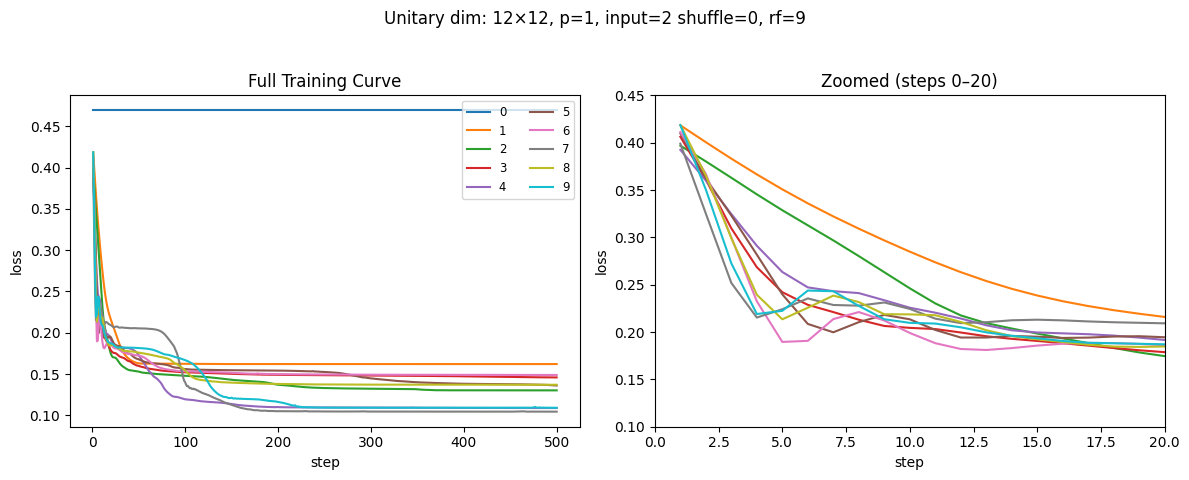

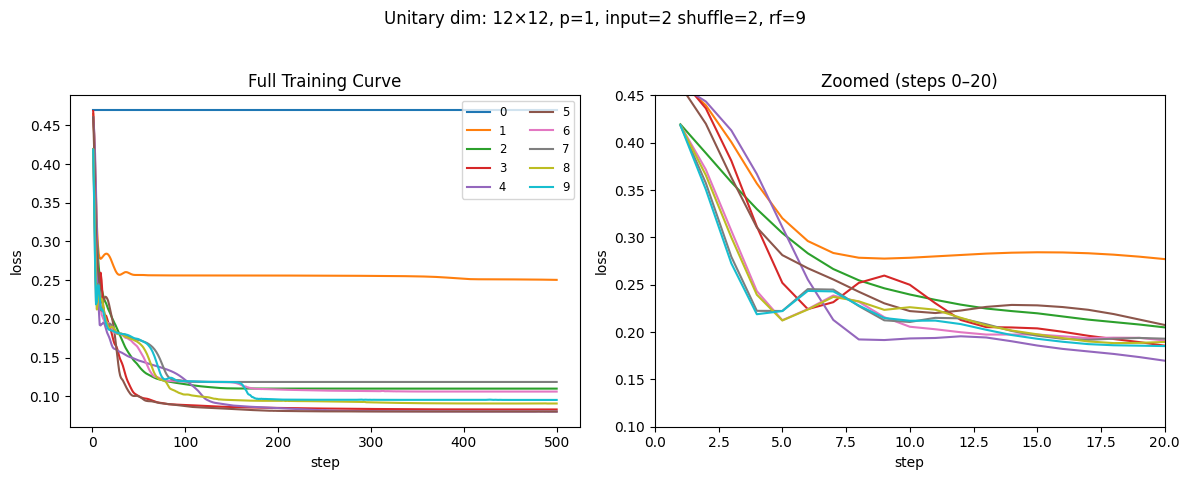

In [93]:
# ---- Cell 2: init_phases-2 curves with optional test-loss lines ----
from p_pack import globals as g
from pathlib import Path

# -------- Configuration --------
data_folders = ("reup-d6-s0/Learning", "reup-d6-s1/Learning", "reup-d6-s2/Learning")
for i in data_folders:
    data_folder = i
    file_indent = 'f'
    indexes_to_plot = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  # Choose the indexes you want to plot
    legend_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]  # Custom labels, must match index order
    x_min = 0
    x_max = 20
    y_min = 0.1
    y_max = 0.45
    plot_test_loss = 0 # set to 1 to show test loss lines
    test_loss_folder = "p1-position0-vs-shuffle-rf2/test-pos0"

    # Create two side-by-side plots
    fig, (ax_full, ax_zoom) = g.plt.subplots(1, 2, figsize=(12, 5))

    # Set data folder path
    script_dir = g.os.getcwd()
    parent_dir = g.os.path.abspath(g.os.path.join(script_dir, ".."))
    data_folder_path = g.os.path.join(parent_dir, "work", data_folder)
    test_folder_path = g.os.path.join(parent_dir, "work", test_loss_folder)

    # Loop over the selected indexes and legend labels
    for idx, label in zip(indexes_to_plot, legend_names):
        matches = list(Path(data_folder_path).glob(f"it{idx}{file_indent}*g.npz"))
        if not matches:
            print(f"[Warning] Global file for index {idx} not found.")
            continue

        global_name = matches[0].name
        data_name   = global_name.replace("g.npz", ".npz")

        data_path    = g.os.path.join(data_folder_path, data_name)
        globals_path = g.os.path.join(data_folder_path, global_name)

        out    = g.np.load(data_path)
        steps  = out["loss_mem"][:, 0].astype(int)
        losses = out["loss_mem"][:, 1].astype(float)

        # plot training loss and capture its color
        line_full, = ax_full.plot(steps, losses, linewidth=1.5, label=label)
        line_zoom, = ax_zoom.plot(steps, losses, linewidth=1.5, label=label)
        color = line_full.get_color()

        if plot_test_loss:
            test_name = 't' + global_name[2:].replace('g.npz', '.npz')
            test_path = g.os.path.join(test_folder_path, test_name)
            if g.os.path.exists(test_path):
                tl = g.np.load(test_path)['test_loss'].item()
                # draw test-loss as a horizontal line in the same color
                ax_full.axline((0, tl), (1, tl),
                            linestyle='--',
                            color=color,
                            label=f'test {label}')
                ax_zoom.axline((0, tl), (1, tl),
                            linestyle='--',
                            color=color)
            else:
                print(f"[Warning] Test loss file {test_name} not found.")

    # finalize axes
    ax_full.set(xlabel='step', ylabel='loss', title='Full Training Curve')
    ax_zoom.set(xlim=(x_min, x_max), ylim=(y_min, y_max),
                xlabel='step', ylabel='loss',
                title=f'Zoomed (steps {x_min}–{x_max})')

    handles, labels = ax_full.get_legend_handles_labels()
    ax_full.legend(handles, labels, loc='upper right', ncol=2, fontsize='small')

    gl    = g.np.load(globals_path)
    shape = out['carry_0'].shape
    fig.suptitle(
        f"Unitary dim: {2*shape[1]}×{2*shape[1]}, p={gl['p_suc_inputs'].item()}, input=2 shuffle={gl['shuffle_type'].item()}, rf={gl['reupload_freq'].item()}"
    )

    g.plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    g.plt.show()



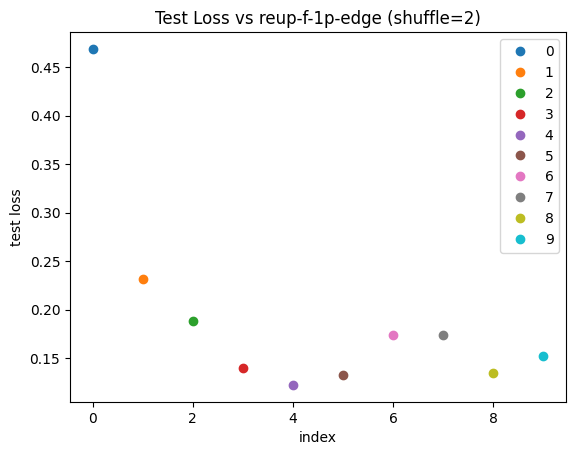

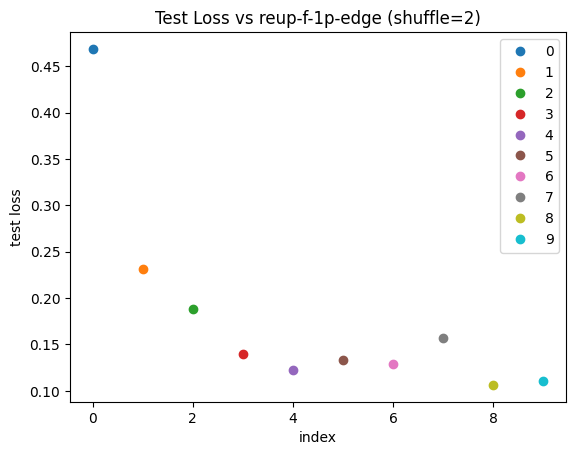

In [94]:
# ---- Cell 3: plot test loss vs. index ----
from p_pack import globals as g
from pathlib import Path

data_folders = ("reup-d6-s0/test-p1", "reup-d6-s1/test-p1", "reup-d6-s2/test-p1")
for i in data_folders:
    test_loss_folder= i
    file_indent = 't'
    indexes_to_plot = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    legend_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

    fig, ax = g.plt.subplots()

    script_dir = g.os.getcwd()
    parent_dir = g.os.path.abspath(g.os.path.join(script_dir, '..'))
    test_folder_path = g.os.path.join(parent_dir, 'work', test_loss_folder)

    test_vals = []
    for idx, label in zip(indexes_to_plot, legend_names):
        matches = list(Path(test_folder_path).glob(f't{idx}*.npz'))
        if not matches:
            print(f'[Warning] Test loss file for index {idx} not found.')
            continue
        tl = g.np.load(matches[0])['test_loss'].item()
        test_vals.append(tl)
        ax.plot(idx, tl, 'o', label=label)

    ax.set(xlabel='index', ylabel='test loss', title=f'Test Loss vs reup-f-1p-edge (shuffle={gl['shuffle_type'].item()})')
    ax.legend()
    g.plt.show()

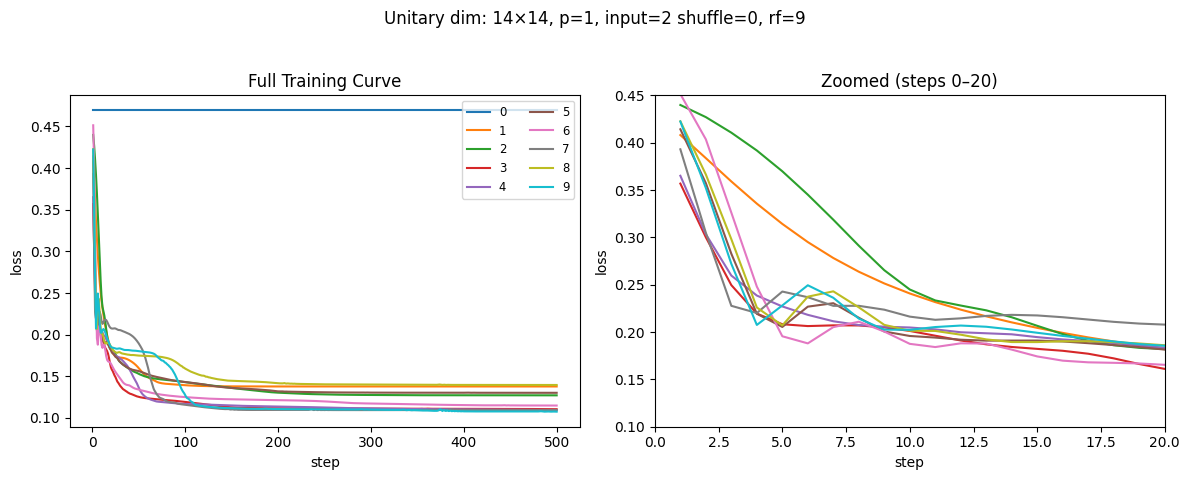

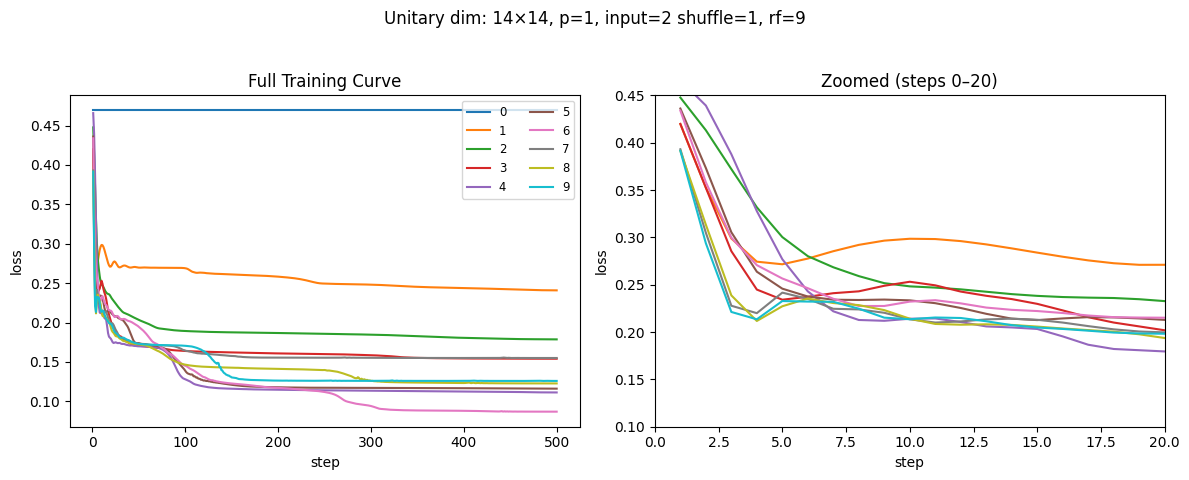

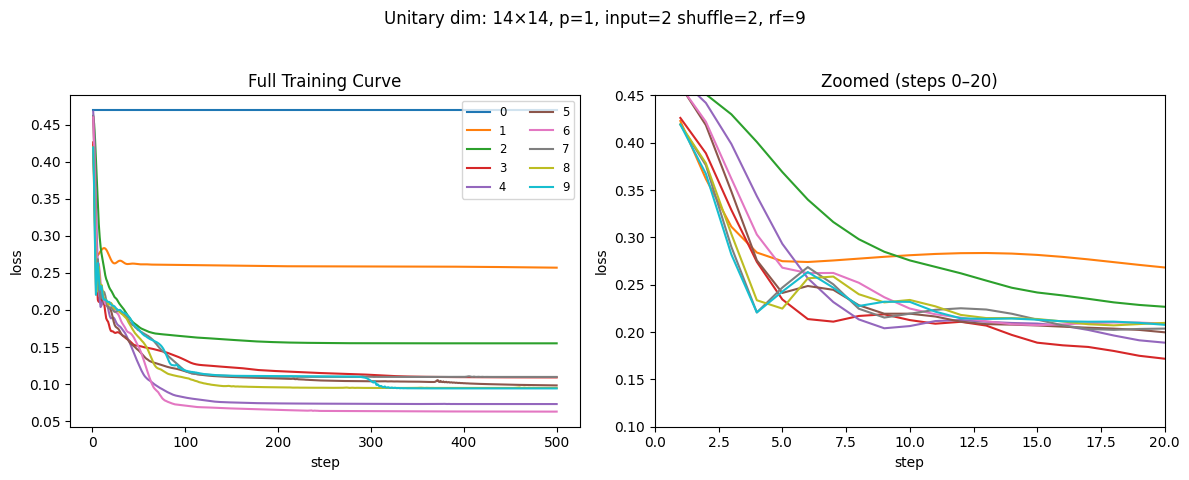

In [1]:
# ---- Cell 2: init_phases-2 curves with optional test-loss lines ----
from p_pack import globals as g
from pathlib import Path

# -------- Configuration --------
data_folders = ("reup-d7-s0/Learning", "reup-d7-s1/Learning", "reup-d7-s2/Learning")
for i in data_folders:
    data_folder = i
    file_indent = 'f'
    indexes_to_plot = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  # Choose the indexes you want to plot
    legend_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]  # Custom labels, must match index order
    x_min = 0
    x_max = 20
    y_min = 0.1
    y_max = 0.45
    plot_test_loss = 0 # set to 1 to show test loss lines
    test_loss_folder = "p1-position0-vs-shuffle-rf2/test-pos0"

    # Create two side-by-side plots
    fig, (ax_full, ax_zoom) = g.plt.subplots(1, 2, figsize=(12, 5))

    # Set data folder path
    script_dir = g.os.getcwd()
    parent_dir = g.os.path.abspath(g.os.path.join(script_dir, ".."))
    data_folder_path = g.os.path.join(parent_dir, "work", data_folder)
    test_folder_path = g.os.path.join(parent_dir, "work", test_loss_folder)

    # Loop over the selected indexes and legend labels
    for idx, label in zip(indexes_to_plot, legend_names):
        matches = list(Path(data_folder_path).glob(f"it{idx}{file_indent}*g.npz"))
        if not matches:
            print(f"[Warning] Global file for index {idx} not found.")
            continue

        global_name = matches[0].name
        data_name   = global_name.replace("g.npz", ".npz")

        data_path    = g.os.path.join(data_folder_path, data_name)
        globals_path = g.os.path.join(data_folder_path, global_name)

        out    = g.np.load(data_path)
        steps  = out["loss_mem"][:, 0].astype(int)
        losses = out["loss_mem"][:, 1].astype(float)

        # plot training loss and capture its color
        line_full, = ax_full.plot(steps, losses, linewidth=1.5, label=label)
        line_zoom, = ax_zoom.plot(steps, losses, linewidth=1.5, label=label)
        color = line_full.get_color()

        if plot_test_loss:
            test_name = 't' + global_name[2:].replace('g.npz', '.npz')
            test_path = g.os.path.join(test_folder_path, test_name)
            if g.os.path.exists(test_path):
                tl = g.np.load(test_path)['test_loss'].item()
                # draw test-loss as a horizontal line in the same color
                ax_full.axline((0, tl), (1, tl),
                            linestyle='--',
                            color=color,
                            label=f'test {label}')
                ax_zoom.axline((0, tl), (1, tl),
                            linestyle='--',
                            color=color)
            else:
                print(f"[Warning] Test loss file {test_name} not found.")

    # finalize axes
    ax_full.set(xlabel='step', ylabel='loss', title='Full Training Curve')
    ax_zoom.set(xlim=(x_min, x_max), ylim=(y_min, y_max),
                xlabel='step', ylabel='loss',
                title=f'Zoomed (steps {x_min}–{x_max})')

    handles, labels = ax_full.get_legend_handles_labels()
    ax_full.legend(handles, labels, loc='upper right', ncol=2, fontsize='small')

    gl    = g.np.load(globals_path)
    shape = out['carry_0'].shape
    fig.suptitle(
        f"Unitary dim: {2*shape[1]}×{2*shape[1]}, p={gl['p_suc_inputs'].item()}, input=2 shuffle={gl['shuffle_type'].item()}, rf={gl['reupload_freq'].item()}"
    )

    g.plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    g.plt.show()



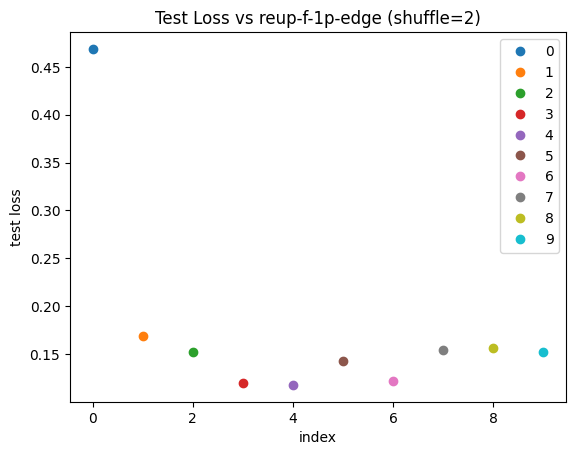

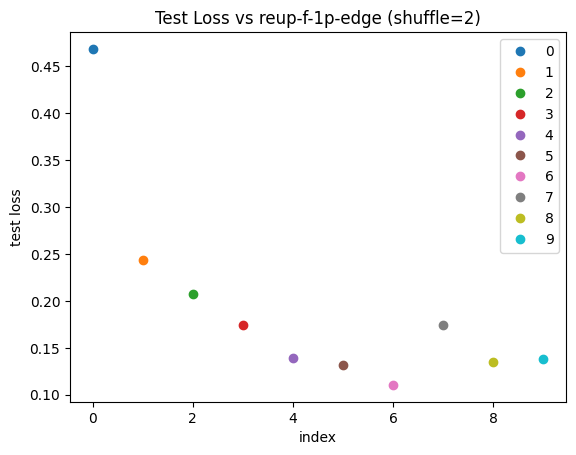

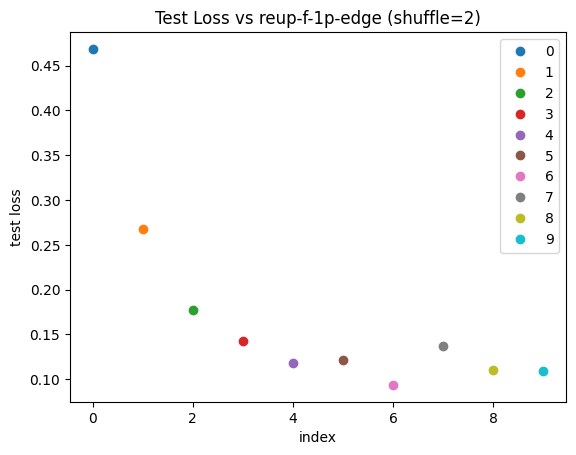

In [2]:
# ---- Cell 3: plot test loss vs. index ----
from p_pack import globals as g
from pathlib import Path

data_folders = ("reup-d7-s0/test-p1", "reup-d7-s1/test-p1", "reup-d7-s2/test-p1")
for i in data_folders:
    test_loss_folder= i
    file_indent = 't'
    indexes_to_plot = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    legend_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

    fig, ax = g.plt.subplots()

    script_dir = g.os.getcwd()
    parent_dir = g.os.path.abspath(g.os.path.join(script_dir, '..'))
    test_folder_path = g.os.path.join(parent_dir, 'work', test_loss_folder)

    test_vals = []
    for idx, label in zip(indexes_to_plot, legend_names):
        matches = list(Path(test_folder_path).glob(f't{idx}*.npz'))
        if not matches:
            print(f'[Warning] Test loss file for index {idx} not found.')
            continue
        tl = g.np.load(matches[0])['test_loss'].item()
        test_vals.append(tl)
        ax.plot(idx, tl, 'o', label=label)

    ax.set(xlabel='index', ylabel='test loss', title=f'Test Loss vs reup-f-1p-edge (shuffle={gl['shuffle_type'].item()})')
    ax.legend()
    g.plt.show()

In [1]:
# ---- Cell 3: plot test loss vs. index ----
from p_pack import globals as g
from pathlib import Path

test_loss_folder = "new-test-test/test-acc-500"
file_indent = 't'
indexes_to_plot = [0, 1, 2, 3, 4]
legend_names = ["0", "1", "2", "3", "4"]

fig, ax = g.plt.subplots()

script_dir = g.os.getcwd()
parent_dir = g.os.path.abspath(g.os.path.join(script_dir, '..'))
test_folder_path = g.os.path.join(parent_dir, 'work', test_loss_folder)

test_vals = []
for idx, label in zip(indexes_to_plot, legend_names):
    matches = list(Path(test_folder_path).glob(f't{idx}*.npz'))
    if not matches:
        print(f'[Warning] Test loss file for index {idx} not found.')
        continue
    tl = g.np.load(matches[0])['test_loss'].item()
    test_vals.append(tl)
    ax.plot(idx, tl, 'o', label=label)

ax.set(xlabel='index', ylabel='test loss', title=f'Test Loss vs reup-f-1p-edge (shuffle={gl['shuffle_type'].item()})')
ax.legend()
g.plt.show()


NameError: name 'gl' is not defined

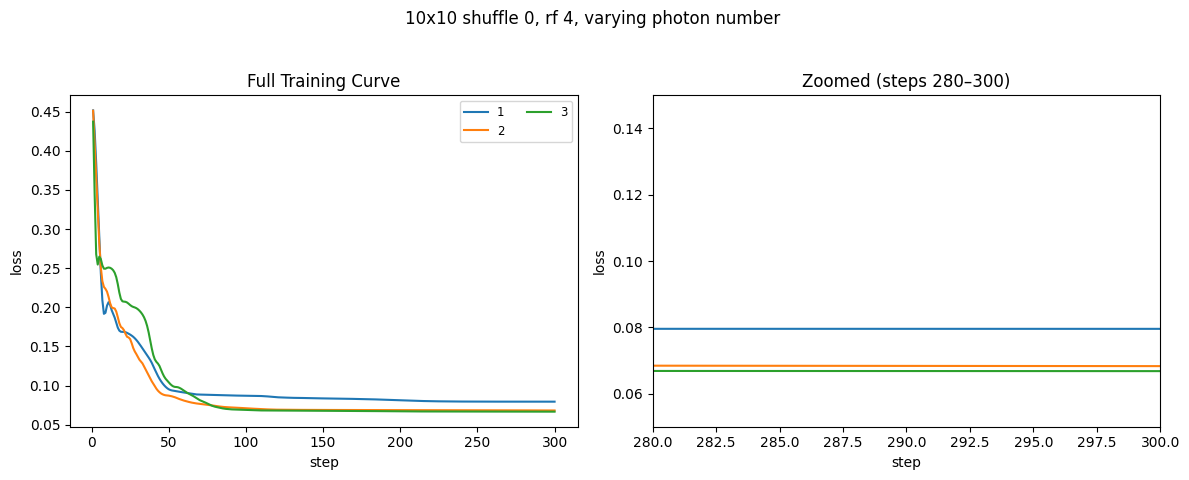

In [10]:
# ---- Cell 2: init_phases-2 curves with optional test-loss lines ----
from p_pack import globals as g
from pathlib import Path

# -------- Configuration --------
data_folders = ("p_num_long_runs/Learning",)
for i in data_folders:
    data_folder = i
    file_indent = 'p'
    indexes_to_plot = [1,2,3]  # Choose the indexes you want to plot
    legend_names = ["1", "2", "3"]  # Custom labels, must match index order
    x_min = 280
    x_max = 300
    y_min = 0.05
    y_max = 0.15
    plot_test_loss = 0 # set to 1 to show test loss lines
    test_loss_folder = "p1-position0-vs-shuffle-rf2/test-pos0"

    # Create two side-by-side plots
    fig, (ax_full, ax_zoom) = g.plt.subplots(1, 2, figsize=(12, 5))

    # Set data folder path
    script_dir = g.os.getcwd()
    parent_dir = g.os.path.abspath(g.os.path.join(script_dir, ".."))
    data_folder_path = g.os.path.join(parent_dir, "work", data_folder)
    test_folder_path = g.os.path.join(parent_dir, "work", test_loss_folder)

    # Loop over the selected indexes and legend labels
    for idx, label in zip(indexes_to_plot, legend_names):
        matches = list(Path(data_folder_path).glob(f"it{idx}{file_indent}*g.npz"))
        if not matches:
            print(f"[Warning] Global file for index {idx} not found.")
            continue

        global_name = matches[0].name
        data_name   = global_name.replace("g.npz", ".npz")

        data_path    = g.os.path.join(data_folder_path, data_name)
        globals_path = g.os.path.join(data_folder_path, global_name)

        out    = g.np.load(data_path)
        steps  = out["loss_mem"][:, 0].astype(int)
        losses = out["loss_mem"][:, 1].astype(float)

        # plot training loss and capture its color
        line_full, = ax_full.plot(steps, losses, linewidth=1.5, label=label)
        line_zoom, = ax_zoom.plot(steps, losses, linewidth=1.5, label=label)
        color = line_full.get_color()

        if plot_test_loss:
            test_name = 't' + global_name[2:].replace('g.npz', '.npz')
            test_path = g.os.path.join(test_folder_path, test_name)
            if g.os.path.exists(test_path):
                tl = g.np.load(test_path)['test_loss'].item()
                # draw test-loss as a horizontal line in the same color
                ax_full.axline((0, tl), (1, tl),
                            linestyle='--',
                            color=color,
                            label=f'test {label}')
                ax_zoom.axline((0, tl), (1, tl),
                            linestyle='--',
                            color=color)
            else:
                print(f"[Warning] Test loss file {test_name} not found.")

    # finalize axes
    ax_full.set(xlabel='step', ylabel='loss', title='Full Training Curve')
    ax_zoom.set(xlim=(x_min, x_max), ylim=(y_min, y_max),
                xlabel='step', ylabel='loss',
                title=f'Zoomed (steps {x_min}–{x_max})')

    handles, labels = ax_full.get_legend_handles_labels()
    ax_full.legend(handles, labels, loc='upper right', ncol=2, fontsize='small')

    gl    = g.np.load(globals_path)
    shape = out['carry_0'].shape
    fig.suptitle(
       # f"Unitary dim: {2*shape[1]}×{2*shape[1]}, p={gl['p_suc_inputs'].item()}, input=2 shuffle={gl['shuffle_type'].item()}, rf={gl['reupload_freq'].item()}"
       "10x10 shuffle 0, rf 4, varying photon number "
    )

    g.plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    g.plt.show()



[Warning] Test loss file for index 9 not found.


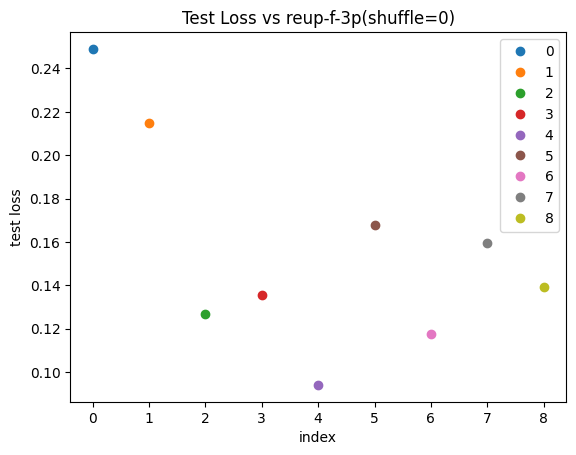

In [14]:
# ---- Cell 3: plot test loss vs. index ----
from p_pack import globals as g
from pathlib import Path

test_loss_folder = "p3-reup-vary/test-acc-500"
file_indent = 't'
indexes_to_plot = [0, 1, 2, 3, 4,5,6,7,8,9]
legend_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

fig, ax = g.plt.subplots()

script_dir = g.os.getcwd()
parent_dir = g.os.path.abspath(g.os.path.join(script_dir, '..'))
test_folder_path = g.os.path.join(parent_dir, 'work', test_loss_folder)

test_vals = []
for idx, label in zip(indexes_to_plot, legend_names):
    matches = list(Path(test_folder_path).glob(f't{idx}*.npz'))
    if not matches:
        print(f'[Warning] Test loss file for index {idx} not found.')
        continue
    tl = g.np.load(matches[0])['test_loss'].item()
    test_vals.append(tl)
    ax.plot(idx, tl, 'o', label=label)

ax.set(xlabel='index', ylabel='test loss', title=f'Test Loss vs reup-f-3p(shuffle={gl['shuffle_type'].item()})')
ax.legend()
g.plt.show()


[Warning] Test loss file for index 9 not found.


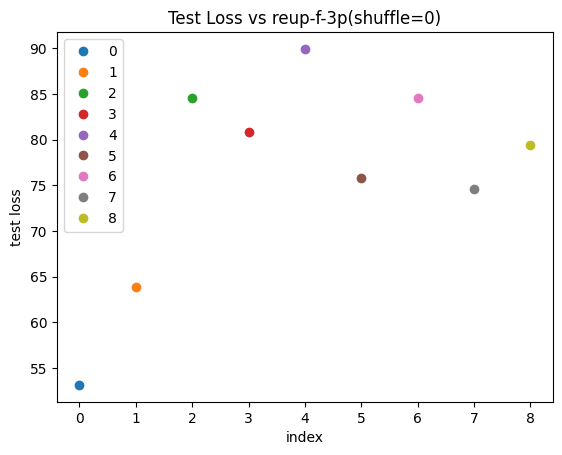

In [ ]:
# ---- Cell 3: plot test loss vs. index ----
from p_pack import globals as g
from pathlib import Path

test_loss_folder = "p3-reup-vary/test-acc2-500"
file_indent = 't'
indexes_to_plot = [0, 1, 2, 3, 4,5,6,7,8,9]
legend_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

fig, ax = g.plt.subplots()

script_dir = g.os.getcwd()
parent_dir = g.os.path.abspath(g.os.path.join(script_dir, '..'))
test_folder_path = g.os.path.join(parent_dir, 'work', test_loss_folder)

test_vals = []
for idx, label in zip(indexes_to_plot, legend_names):
    matches = list(Path(test_folder_path).glob(f't{idx}*.npz'))
    if not matches:
        print(f'[Warning] Test loss file for index {idx} not found.')
        continue
    tl = g.np.load(matches[0])['test_loss'].item()
    test_vals.append(tl)
    ax.plot(idx, tl, 'o', label=label)

ax.set(xlabel='index', ylabel='test loss', title=f'Test Loss vs reup-f-3p(shuffle={gl['shuffle_type'].item()})')
ax.legend()
g.plt.show()


[Warning] Test loss file for index 9 not found.


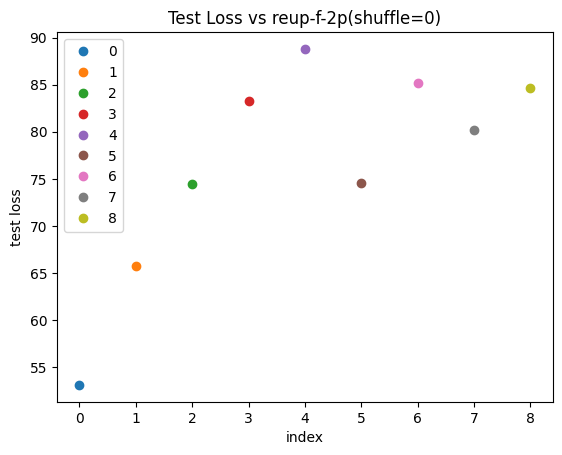

In [17]:
# ---- Cell 3: plot test loss vs. index ----
from p_pack import globals as g
from pathlib import Path

test_loss_folder = "p2-reup-vary/test-acc-500"
file_indent = 't'
indexes_to_plot = [0, 1, 2, 3, 4,5,6,7,8,9]
legend_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

fig, ax = g.plt.subplots()

script_dir = g.os.getcwd()
parent_dir = g.os.path.abspath(g.os.path.join(script_dir, '..'))
test_folder_path = g.os.path.join(parent_dir, 'work', test_loss_folder)

test_vals = []
for idx, label in zip(indexes_to_plot, legend_names):
    matches = list(Path(test_folder_path).glob(f't{idx}*.npz'))
    if not matches:
        print(f'[Warning] Test loss file for index {idx} not found.')
        continue
    tl = g.np.load(matches[0])['test_loss'].item()
    test_vals.append(tl)
    ax.plot(idx, tl, 'o', label=label)

ax.set(xlabel='index', ylabel='test loss', title=f'Test Loss vs reup-f-2p(shuffle={gl['shuffle_type'].item()})')
ax.legend()
g.plt.show()


[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-loss-25/t0s0.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-loss-50/t0s0.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-loss-100/t0s0.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-loss-200/t0s0.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-loss-400/t0s0.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-loss-800/t0s0.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-acc-25/t0s0.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-acc-50/t0s0.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-acc-100/t0s0.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-acc-200/t0s0.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-acc-400/t0s0.npz
[Warning] Missing f

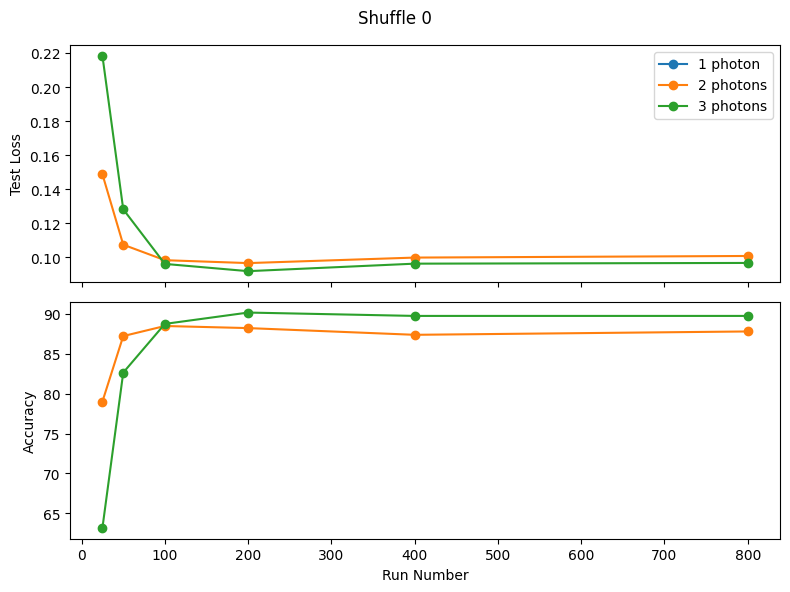

[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-loss-25/t1s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-loss-50/t1s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-loss-100/t1s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-loss-200/t1s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-loss-400/t1s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-loss-800/t1s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-acc-25/t1s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-acc-50/t1s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-acc-100/t1s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-acc-200/t1s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-acc-400/t1s1.npz
[Warning] Missing f

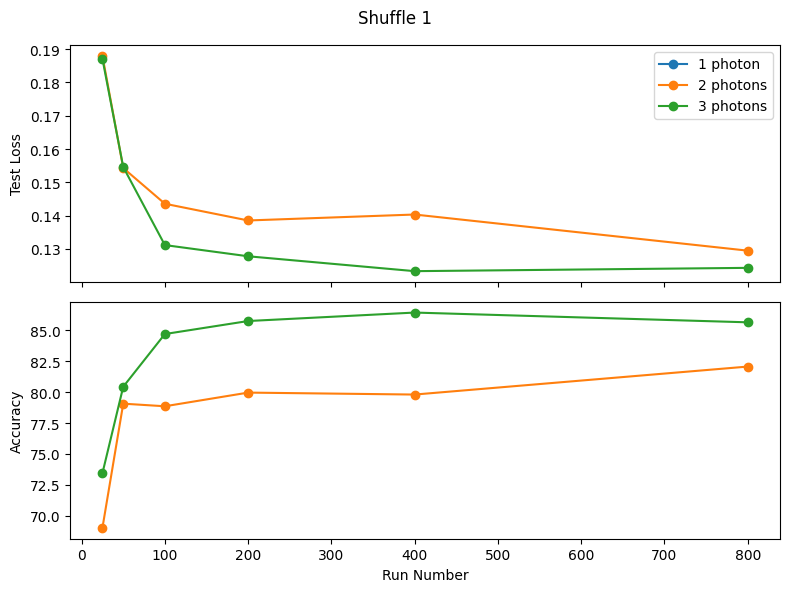

[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-loss-25/t2s2.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-loss-50/t2s2.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-loss-100/t2s2.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-loss-200/t2s2.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-loss-400/t2s2.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-loss-800/t2s2.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-acc-25/t2s2.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-acc-50/t2s2.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-acc-100/t2s2.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-acc-200/t2s2.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-acc-400/t2s2.npz
[Warning] Missing f

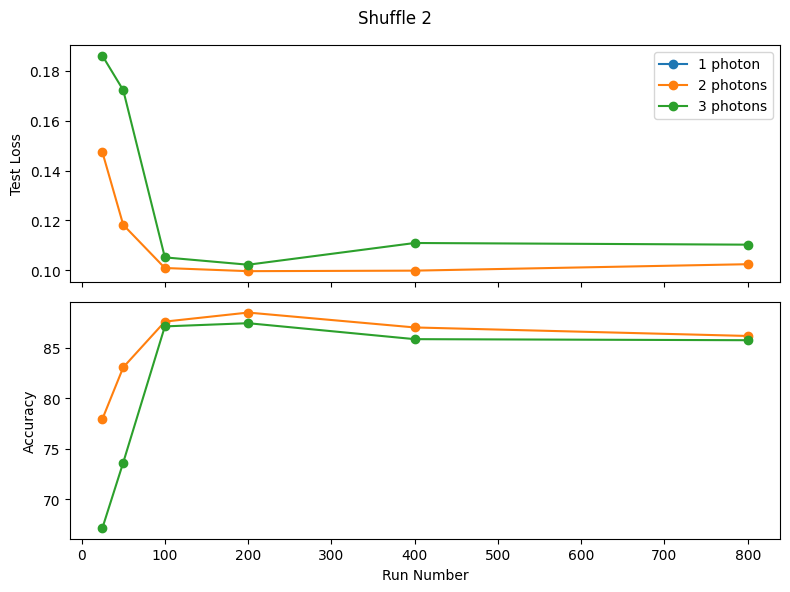

In [24]:
from p_pack import globals as g


# Mapping of photon number to their respective result directories
PHOTON_DIRS = {
    1: "p1-shuffle-rf4-800",
    2: "p2-shuffle-rf4-800",
    3: "p3-shuffle-rf4-800",
}

# Training runs that were evaluated
RUN_NUMBERS = [25, 50, 100, 200, 400, 800]


def _load_metric(photon_dir: str, metric: str, shuffle_type: int):
    """Load metric values for a photon configuration and shuffle type.

    Parameters
    ----------
    photon_dir:
        Root directory for the photon configuration (e.g. ``p1-shuffle-rf4-800``).
    metric:
        Either ``"test-loss"`` or ``"test-acc"``.
    shuffle_type:
        The shuffle index (0, 1 or 2).

    Returns
    -------
    tuple[list[int], list[float]]
        Lists of run numbers and the corresponding metric values.  Missing
        files are skipped with a warning.
    """

    # Build absolute path to the photon directory within the external ``work`` folder
    script_dir = g.os.getcwd()
    parent_dir = g.os.path.abspath(g.os.path.join(script_dir, ".."))
    base_path = Path(parent_dir) / "work" / photon_dir

    runs, values = [], []
    for run in RUN_NUMBERS:
        file_path = base_path / f"{metric}-{run}" / f"t{shuffle_type}s{shuffle_type}.npz"
        if not file_path.exists():
            print(f"[Warning] Missing file: {file_path}")
            continue
        with g.np.load(file_path, allow_pickle=True) as data:
            # Files saved by ``evaluate_and_save_test_loss`` always use the
            # ``test_loss`` key even when storing accuracy.
            values.append(data["test_loss"].item())
            runs.append(run)
    return runs, values


def plot_results():
    """Create figures for each shuffle type showing loss and accuracy."""

    labels = {1: "1 photon", 2: "2 photons", 3: "3 photons"}

    for shuffle in [0, 1, 2]:
        fig, (ax_loss, ax_acc) = g.plt.subplots(2, 1, sharex=True, figsize=(8, 6))

        for p, directory in PHOTON_DIRS.items():
            run_loss, loss_vals = _load_metric(directory, "test-loss", shuffle)
            run_acc, acc_vals = _load_metric(directory, "test-acc", shuffle)

            ax_loss.plot(run_loss, loss_vals, marker="o", label=labels[p])
            ax_acc.plot(run_acc, acc_vals, marker="o", label=labels[p])

        ax_loss.set_ylabel("Test Loss")
        ax_loss.legend()
        ax_acc.set_ylabel("Accuracy")
        ax_acc.set_xlabel("Run Number")
        fig.suptitle(f"Shuffle {shuffle}")
        g.plt.tight_layout()
        g.plt.show()

plot_results()

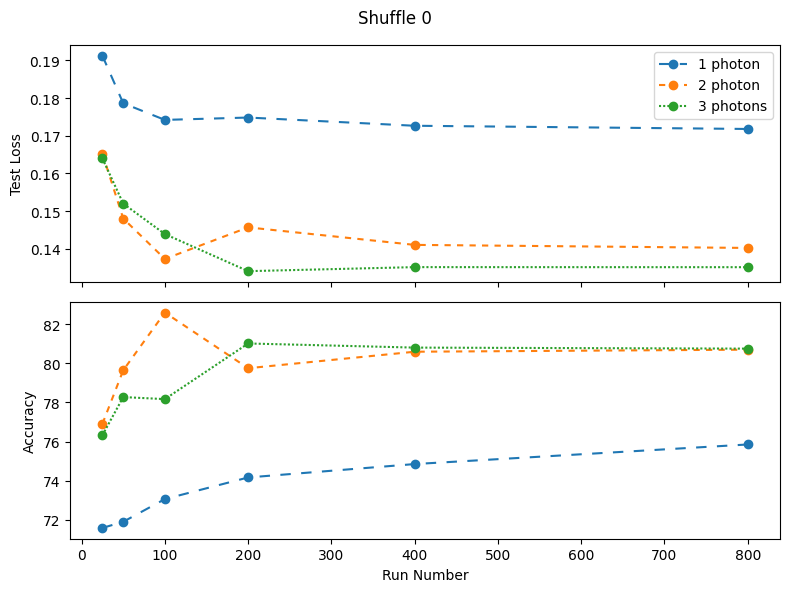

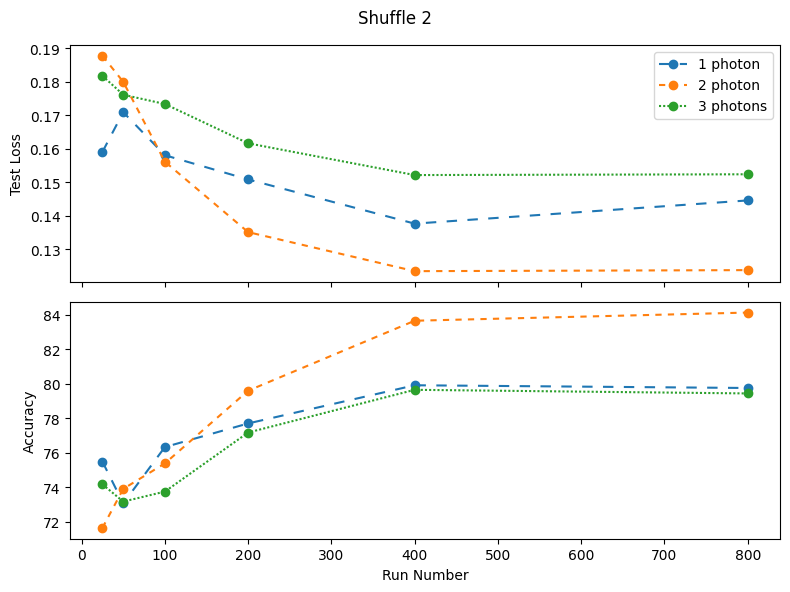

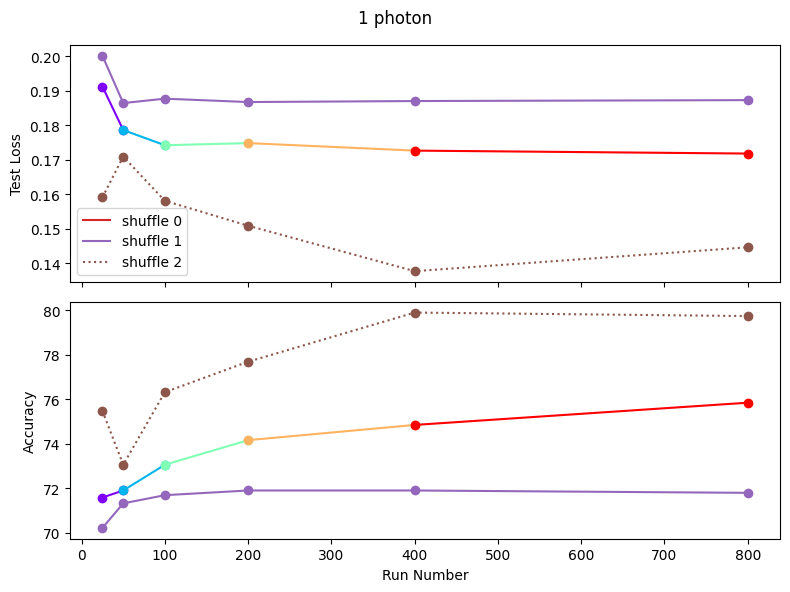

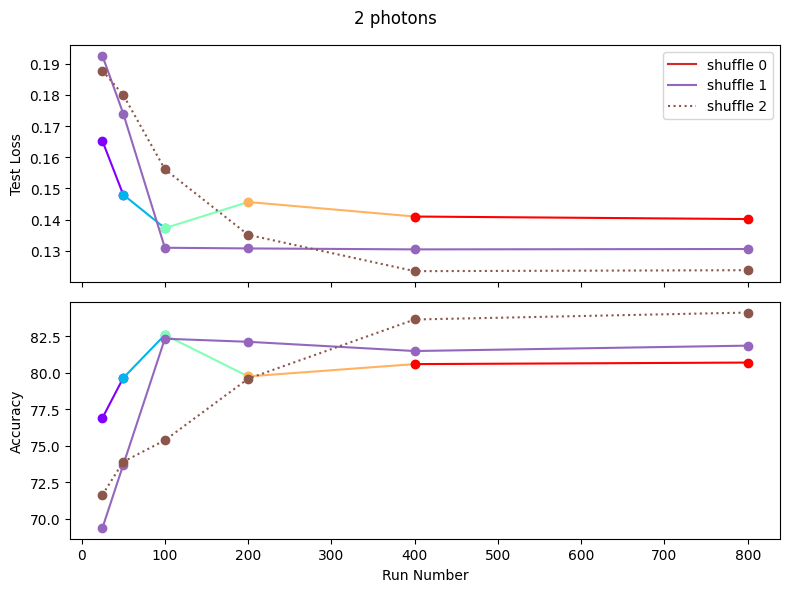

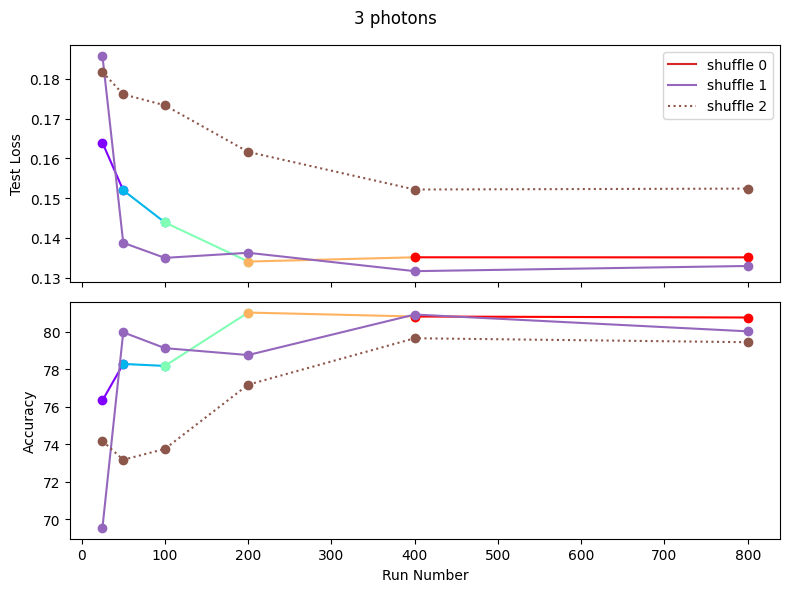

In [20]:
from pathlib import Path
from p_pack import globals as g


# Mapping of photon number to their respective result directories
PHOTON_DIRS = {
    1: "p1-shuffle-rf3-800",
    2: "p2-shuffle-rf3-800",
    3: "p3-shuffle-rf3-800",
}

# Explicit colors so photon and shuffle plots do not share palettes
PHOTON_COLORS = {1: "tab:blue", 2: "tab:orange", 3: "tab:green"}
SHUFFLE_COLORS = {0: "tab:red", 1: "tab:purple", 2: "tab:brown"}

# Line styles for photon comparison plots (all dotted with increasing frequency)
PHOTON_LINESTYLES = {
    1: (0, (5, 5)),  # least frequent dots
    2: (0, (3, 3)),  # medium frequency
    3: (0, (1, 1)),  # most frequent dots
}

# Training runs that were evaluated
RUN_NUMBERS = [25, 50, 100, 200, 400, 800]


def _load_metric(photon_dir: str, metric: str, shuffle_type: int):
    """Load metric values for a photon configuration and shuffle type.

    Parameters
    ----------
    photon_dir:
        Root directory for the photon configuration (e.g. ``p1-shuffle-rf4-800``).
    metric:
        Either ``"test-loss"`` or ``"test-acc"``.
    shuffle_type:
        The shuffle index (0, 1 or 2).

    Returns
    -------
    tuple[list[int], list[float]]
        Lists of run numbers and the corresponding metric values.  Missing
        files are skipped with a warning.
    """

    # Build absolute path to the photon directory within the external ``work`` folder
    script_dir = g.os.getcwd()
    parent_dir = g.os.path.abspath(g.os.path.join(script_dir, ".."))
    base_path = Path(parent_dir) / "work" / photon_dir

    runs, values = [], []
    for run in RUN_NUMBERS:
        file_path = (
            base_path / f"{metric}-{run}" / f"t{shuffle_type}s{shuffle_type}.npz"
        )
        if not file_path.exists():
            print(f"[Warning] Missing file: {file_path}")
            continue
        with g.np.load(file_path, allow_pickle=True) as data:
            # Files saved by ``evaluate_and_save_test_loss`` always use the
            # ``test_loss`` key even when storing accuracy.
            values.append(data["test_loss"].item())
            runs.append(run)
    return runs, values


def _plot_multicolor(ax, x, y, marker="o"):
    """Plot a line with a rainbow colormap along its length."""

    if len(x) < 2:
        ax.plot(x, y, marker=marker)
        return

    colors = g.plt.cm.rainbow(g.np.linspace(0, 1, len(x) - 1))
    for i in range(len(x) - 1):
        ax.plot(x[i : i + 2], y[i : i + 2], color=colors[i], marker=marker)


def plot_results():
    """Create figures for each shuffle type showing loss and accuracy."""

    labels = {1: "1 photon", 2: "2 photon", 3: "3 photons"}

    for shuffle in [0, 1, 2]:
        fig, (ax_loss, ax_acc) = g.plt.subplots(2, 1, sharex=True, figsize=(8, 6))

        for p, directory in PHOTON_DIRS.items():
            run_loss, loss_vals = _load_metric(directory, "test-loss", shuffle)
            run_acc, acc_vals = _load_metric(directory, "test-acc", shuffle)

            ax_loss.plot(
                run_loss,
                loss_vals,
                marker="o",
                label=labels[p],
                color=PHOTON_COLORS[p],
                linestyle=PHOTON_LINESTYLES[p],
            )
            ax_acc.plot(
                run_acc,
                acc_vals,
                marker="o",
                label=labels[p],
                color=PHOTON_COLORS[p],
                linestyle=PHOTON_LINESTYLES[p],
            )

        ax_loss.set_ylabel("Test Loss")
        ax_loss.legend()
        ax_acc.set_ylabel("Accuracy")
        ax_acc.set_xlabel("Run Number")
        fig.suptitle(f"Shuffle {shuffle}")
        g.plt.tight_layout()
        g.plt.show()


def plot_photon_results():
    """Create figures for each photon number showing loss and accuracy."""

    labels = {0: "shuffle 0", 1: "shuffle 1", 2: "shuffle 2"}

    for p, directory in PHOTON_DIRS.items():
        fig, (ax_loss, ax_acc) = g.plt.subplots(2, 1, sharex=True, figsize=(8, 6))

        for shuffle in [0, 1, 2]:
            run_loss, loss_vals = _load_metric(directory, "test-loss", shuffle)
            run_acc, acc_vals = _load_metric(directory, "test-acc", shuffle)

            if shuffle == 0:
                _plot_multicolor(ax_loss, run_loss, loss_vals)
                _plot_multicolor(ax_acc, run_acc, acc_vals)
            else:
                linestyle = ":" if shuffle == 2 else "-"
                ax_loss.plot(
                    run_loss,
                    loss_vals,
                    marker="o",
                    label=labels[shuffle],
                    color=SHUFFLE_COLORS[shuffle],
                    linestyle=linestyle,
                )
                ax_acc.plot(
                    run_acc,
                    acc_vals,
                    marker="o",
                    label=labels[shuffle],
                    color=SHUFFLE_COLORS[shuffle],
                    linestyle=linestyle,
                )

        handles = [
            g.plt.Line2D([], [], color=SHUFFLE_COLORS[0], label=labels[0]),
            g.plt.Line2D(
                [], [], color=SHUFFLE_COLORS[1], linestyle="-", label=labels[1]
            ),
            g.plt.Line2D(
                [], [], color=SHUFFLE_COLORS[2], linestyle=":", label=labels[2]
            ),
        ]
        ax_loss.set_ylabel("Test Loss")
        ax_loss.legend(handles=handles)
        ax_acc.set_ylabel("Accuracy")
        ax_acc.set_xlabel("Run Number")
        title = f"{p} photon" if p == 1 else f"{p} photons"
        fig.suptitle(title)
        g.plt.tight_layout()
        g.plt.show()

plot_results()
plot_photon_results()


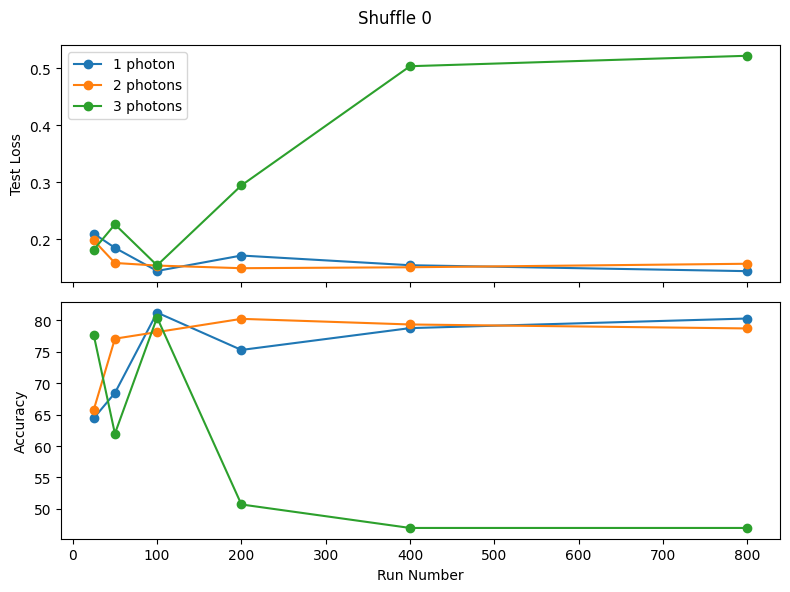

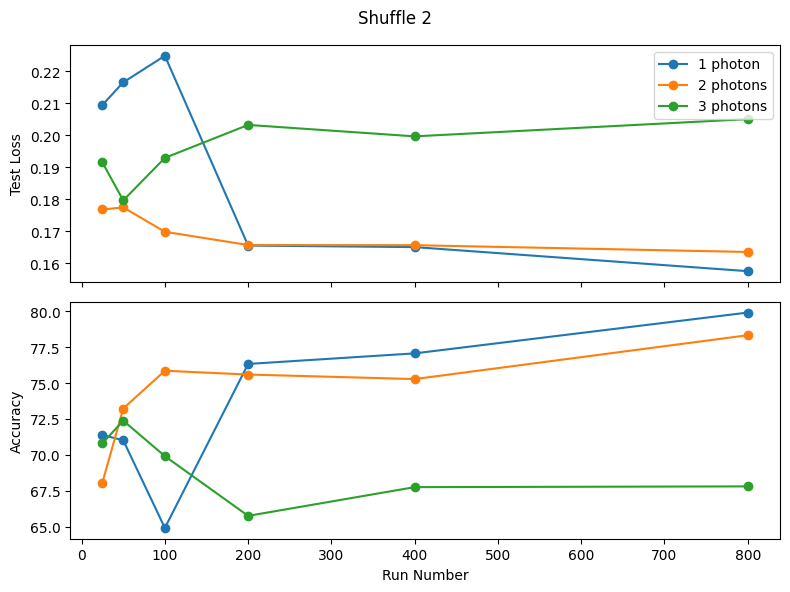

In [10]:

from p_pack import globals as g
from pathlib import Path

# Mapping of photon number to their respective result directories
PHOTON_DIRS = {
    1: "p1-shuffle-rf8-800-d10",
    2: "p2-shuffle-rf8-800-d10",
    3: "p3-shuffle-rf8-800-d10",
}

# Training runs that were evaluated
RUN_NUMBERS = [25, 50, 100, 200, 400, 800]


def _load_metric(photon_dir: str, metric: str, shuffle_type: int):
    """Load metric values for a photon configuration and shuffle type.

    Parameters
    ----------
    photon_dir:
        Root directory for the photon configuration (e.g. ``p1-shuffle-rf4-800``).
    metric:
        Either ``"test-loss"`` or ``"test-acc"``.
    shuffle_type:
        The shuffle index (0, 1 or 2).

    Returns
    -------
    tuple[list[int], list[float]]
        Lists of run numbers and the corresponding metric values.  Missing
        files are skipped with a warning.
    """

    # Build absolute path to the photon directory within the external ``work`` folder
    script_dir = g.os.getcwd()
    parent_dir = g.os.path.abspath(g.os.path.join(script_dir, ".."))
    base_path = Path(parent_dir) / "work" / photon_dir

    runs, values = [], []
    for run in RUN_NUMBERS:
        file_path = base_path / f"{metric}-{run}" / f"t{shuffle_type}s{shuffle_type}.npz"
        if not file_path.exists():
            print(f"[Warning] Missing file: {file_path}")
            continue
        with g.np.load(file_path, allow_pickle=True) as data:
            # Files saved by ``evaluate_and_save_test_loss`` always use the
            # ``test_loss`` key even when storing accuracy.
            values.append(data["test_loss"].item())
            runs.append(run)
    return runs, values


def plot_results():
    """Create figures for each shuffle type showing loss and accuracy."""

    labels = {1: "1 photon", 2: "2 photons", 3: "3 photons"}

    for shuffle in [0, 1, 2]:
        fig, (ax_loss, ax_acc) = g.plt.subplots(2, 1, sharex=True, figsize=(8, 6))

        for p, directory in PHOTON_DIRS.items():
            run_loss, loss_vals = _load_metric(directory, "test-loss", shuffle)
            run_acc, acc_vals = _load_metric(directory, "test-acc", shuffle)

            ax_loss.plot(run_loss, loss_vals, marker="o", label=labels[p])
            ax_acc.plot(run_acc, acc_vals, marker="o", label=labels[p])

        ax_loss.set_ylabel("Test Loss")
        ax_loss.legend()
        ax_acc.set_ylabel("Accuracy")
        ax_acc.set_xlabel("Run Number")
        fig.suptitle(f"Shuffle {shuffle}")
        g.plt.tight_layout()
        g.plt.show()

plot_results()

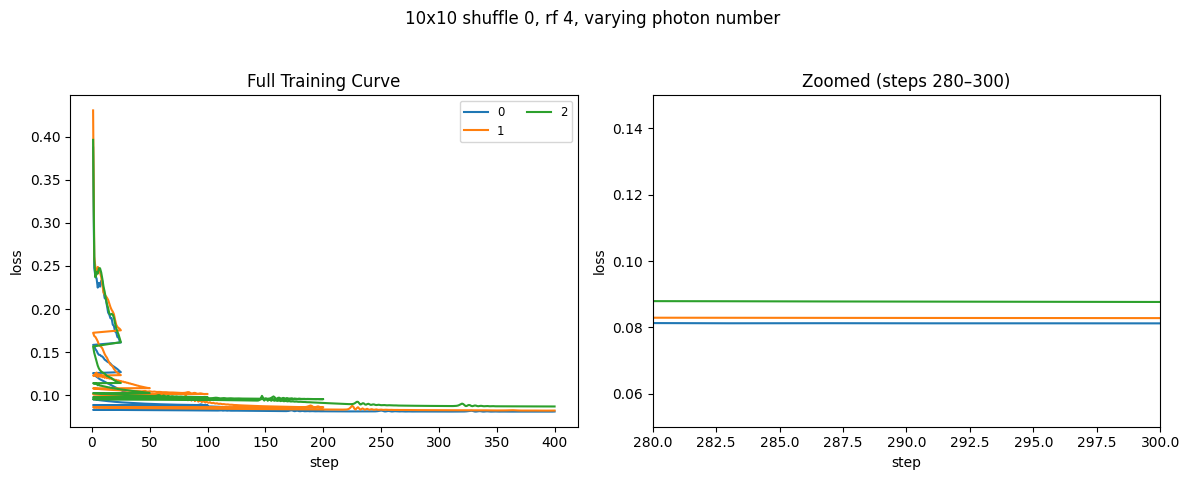

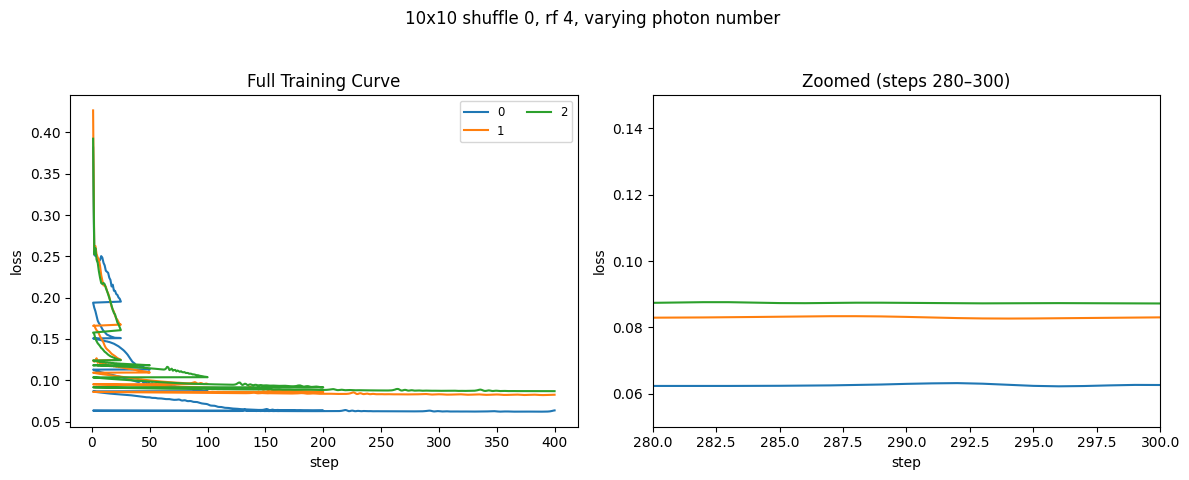

In [18]:
# ---- Cell 2: init_phases-2 curves with optional test-loss lines ----
from p_pack import globals as g
from pathlib import Path

# -------- Configuration --------
data_folders = ("p1-shuffle-rf8-800-d10/Learning","p2-shuffle-rf8-800-d10/Learning","p3-shuffle-rf8-800-d10/Learning")
for i in data_folders:
    data_folder = i
    file_indent = 's'
    indexes_to_plot = [0,1,2]  # Choose the indexes you want to plot
    legend_names = ["0","1","2"]  # Custom labels, must match index order
    x_min = 280
    x_max = 300
    y_min = 0.05
    y_max = 0.15
    plot_test_loss = 0 # set to 1 to show test loss lines
    test_loss_folder = "p1-position0-vs-shuffle-rf2/test-pos0"

    # Create two side-by-side plots
    fig, (ax_full, ax_zoom) = g.plt.subplots(1, 2, figsize=(12, 5))

    # Set data folder path
    script_dir = g.os.getcwd()
    parent_dir = g.os.path.abspath(g.os.path.join(script_dir, ".."))
    data_folder_path = g.os.path.join(parent_dir, "work", data_folder)
    test_folder_path = g.os.path.join(parent_dir, "work", test_loss_folder)

    # Loop over the selected indexes and legend labels
    for idx, label in zip(indexes_to_plot, legend_names):
        matches = list(Path(data_folder_path).glob(f"it{idx}{file_indent}*g.npz"))
        if not matches:
            print(f"[Warning] Global file for index {idx} not found.")
            continue

        global_name = matches[0].name
        data_name   = global_name.replace("g.npz", ".npz")

        data_path    = g.os.path.join(data_folder_path, data_name)
        globals_path = g.os.path.join(data_folder_path, global_name)

        out    = g.np.load(data_path)
        steps  = out["loss_mem"][:, 0].astype(int)
        losses = out["loss_mem"][:, 1].astype(float)

        # plot training loss and capture its color
        line_full, = ax_full.plot(steps, losses, linewidth=1.5, label=label)
        line_zoom, = ax_zoom.plot(steps, losses, linewidth=1.5, label=label)
        color = line_full.get_color()

        if plot_test_loss:
            test_name = 't' + global_name[2:].replace('g.npz', '.npz')
            test_path = g.os.path.join(test_folder_path, test_name)
            if g.os.path.exists(test_path):
                tl = g.np.load(test_path)['test_loss'].item()
                # draw test-loss as a horizontal line in the same color
                ax_full.axline((0, tl), (1, tl),
                            linestyle='--',
                            color=color,
                            label=f'test {label}')
                ax_zoom.axline((0, tl), (1, tl),
                            linestyle='--',
                            color=color)
            else:
                print(f"[Warning] Test loss file {test_name} not found.")

    # finalize axes
    ax_full.set(xlabel='step', ylabel='loss', title='Full Training Curve')
    ax_zoom.set(xlim=(x_min, x_max), ylim=(y_min, y_max),
                xlabel='step', ylabel='loss',
                title=f'Zoomed (steps {x_min}–{x_max})')

    handles, labels = ax_full.get_legend_handles_labels()
    ax_full.legend(handles, labels, loc='upper right', ncol=2, fontsize='small')

    gl    = g.np.load(globals_path)
    shape = out['carry_0'].shape
    fig.suptitle(
       # f"Unitary dim: {2*shape[1]}×{2*shape[1]}, p={gl['p_suc_inputs'].item()}, input=2 shuffle={gl['shuffle_type'].item()}, rf={gl['reupload_freq'].item()}"
       "10x10 shuffle 0, rf 4, varying photon number "
    )

    g.plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    g.plt.show()



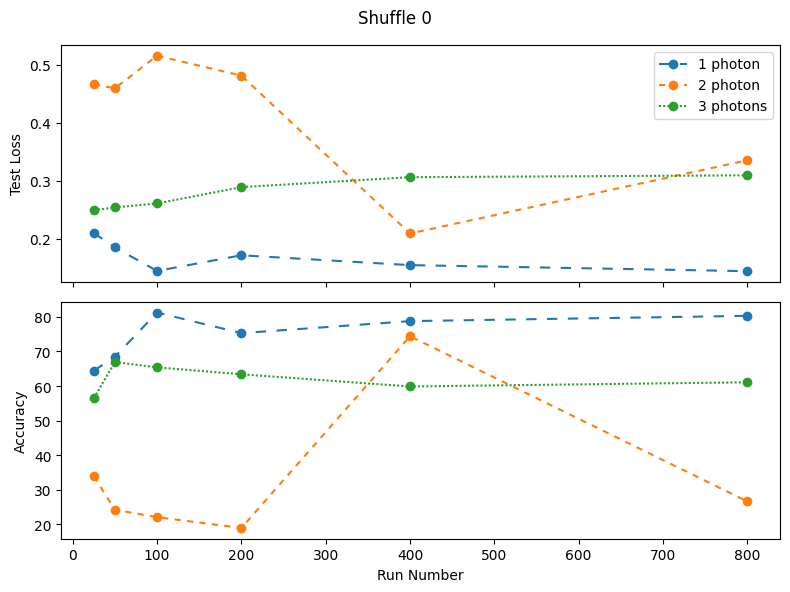

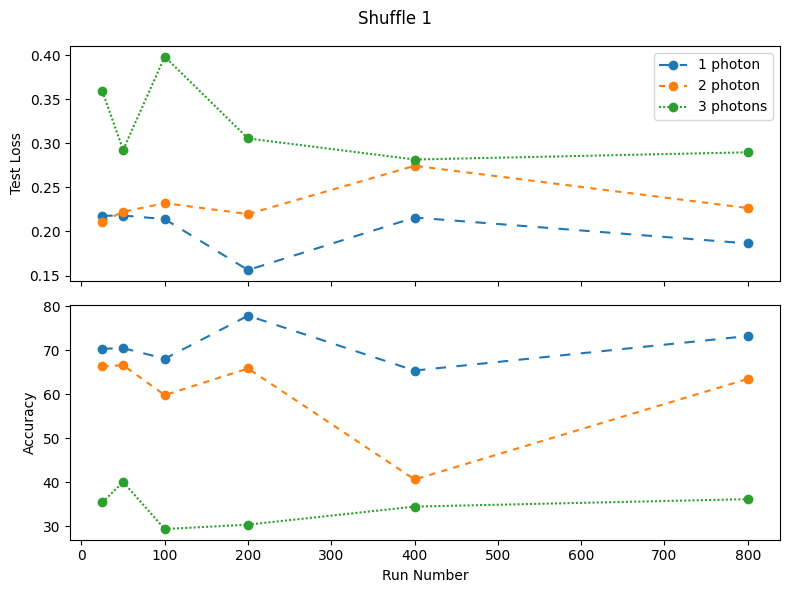

In [22]:
from pathlib import Path
from p_pack import globals as g


# Mapping of photon number to their respective result directories
PHOTON_DIRS = {
    1: "p1-shuffle-rf8-800-d10",
    2: "p2-shuffle-rf9-800-d10",
    3: "p3-shuffle-rf9-800-d10",
}

# Explicit colors so photon and shuffle plots do not share palettes
PHOTON_COLORS = {1: "tab:blue", 2: "tab:orange", 3: "tab:green"}
SHUFFLE_COLORS = {0: "tab:red", 1: "tab:purple", 2: "tab:brown"}

# Line styles for photon comparison plots (all dotted with increasing frequency)
PHOTON_LINESTYLES = {
    1: (0, (5, 5)),  # least frequent dots
    2: (0, (3, 3)),  # medium frequency
    3: (0, (1, 1)),  # most frequent dots
}

# Training runs that were evaluated
RUN_NUMBERS = [25, 50, 100, 200, 400, 800]


def _load_metric(photon_dir: str, metric: str, shuffle_type: int):
    """Load metric values for a photon configuration and shuffle type.

    Parameters
    ----------
    photon_dir:
        Root directory for the photon configuration (e.g. ``p1-shuffle-rf4-800``).
    metric:
        Either ``"test-loss"`` or ``"test-acc"``.
    shuffle_type:
        The shuffle index (0, 1 or 2).

    Returns
    -------
    tuple[list[int], list[float]]
        Lists of run numbers and the corresponding metric values.  Missing
        files are skipped with a warning.
    """

    # Build absolute path to the photon directory within the external ``work`` folder
    script_dir = g.os.getcwd()
    parent_dir = g.os.path.abspath(g.os.path.join(script_dir, ".."))
    base_path = Path(parent_dir) / "work" / photon_dir

    runs, values = [], []
    for run in RUN_NUMBERS:
        file_path = (
            base_path / f"{metric}-{run}" / f"t{shuffle_type}s{shuffle_type}.npz"
        )
        if not file_path.exists():
            print(f"[Warning] Missing file: {file_path}")
            continue
        with g.np.load(file_path, allow_pickle=True) as data:
            # Files saved by ``evaluate_and_save_test_loss`` always use the
            # ``test_loss`` key even when storing accuracy.
            values.append(data["test_loss"].item())
            runs.append(run)
    return runs, values


def _plot_multicolor(ax, x, y, marker="o"):
    """Plot a line with a rainbow colormap along its length."""

    if len(x) < 2:
        ax.plot(x, y, marker=marker)
        return

    colors = g.plt.cm.rainbow(g.np.linspace(0, 1, len(x) - 1))
    for i in range(len(x) - 1):
        ax.plot(x[i : i + 2], y[i : i + 2], color=colors[i], marker=marker)


def plot_results():
    """Create figures for each shuffle type showing loss and accuracy."""

    labels = {1: "1 photon", 2: "2 photon", 3: "3 photons"}

    for shuffle in [0, 1, 2]:
        fig, (ax_loss, ax_acc) = g.plt.subplots(2, 1, sharex=True, figsize=(8, 6))

        for p, directory in PHOTON_DIRS.items():
            run_loss, loss_vals = _load_metric(directory, "test-loss", shuffle)
            run_acc, acc_vals = _load_metric(directory, "test-acc", shuffle)

            ax_loss.plot(
                run_loss,
                loss_vals,
                marker="o",
                label=labels[p],
                color=PHOTON_COLORS[p],
                linestyle=PHOTON_LINESTYLES[p],
            )
            ax_acc.plot(
                run_acc,
                acc_vals,
                marker="o",
                label=labels[p],
                color=PHOTON_COLORS[p],
                linestyle=PHOTON_LINESTYLES[p],
            )

        ax_loss.set_ylabel("Test Loss")
        ax_loss.legend()
        ax_acc.set_ylabel("Accuracy")
        ax_acc.set_xlabel("Run Number")
        fig.suptitle(f"Shuffle {shuffle}")
        g.plt.tight_layout()
        g.plt.show()


def plot_photon_results():
    """Create figures for each photon number showing loss and accuracy."""

    labels = {0: "shuffle 0", 1: "shuffle 1", 2: "shuffle 2"}

    for p, directory in PHOTON_DIRS.items():
        fig, (ax_loss, ax_acc) = g.plt.subplots(2, 1, sharex=True, figsize=(8, 6))

        for shuffle in [0, 1, 2]:
            run_loss, loss_vals = _load_metric(directory, "test-loss", shuffle)
            run_acc, acc_vals = _load_metric(directory, "test-acc", shuffle)

            if shuffle == 0:
                _plot_multicolor(ax_loss, run_loss, loss_vals)
                _plot_multicolor(ax_acc, run_acc, acc_vals)
            else:
                linestyle = ":" if shuffle == 2 else "-"
                ax_loss.plot(
                    run_loss,
                    loss_vals,
                    marker="o",
                    label=labels[shuffle],
                    color=SHUFFLE_COLORS[shuffle],
                    linestyle=linestyle,
                )
                ax_acc.plot(
                    run_acc,
                    acc_vals,
                    marker="o",
                    label=labels[shuffle],
                    color=SHUFFLE_COLORS[shuffle],
                    linestyle=linestyle,
                )

        handles = [
            g.plt.Line2D([], [], color=SHUFFLE_COLORS[0], label=labels[0]),
            g.plt.Line2D(
                [], [], color=SHUFFLE_COLORS[1], linestyle="-", label=labels[1]
            ),
            g.plt.Line2D(
                [], [], color=SHUFFLE_COLORS[2], linestyle=":", label=labels[2]
            ),
        ]
        ax_loss.set_ylabel("Test Loss")
        ax_loss.legend(handles=handles)
        ax_acc.set_ylabel("Accuracy")
        ax_acc.set_xlabel("Run Number")
        title = f"{p} photon" if p == 1 else f"{p} photons"
        fig.suptitle(title)
        g.plt.tight_layout()
        g.plt.show()

plot_results()
plot_photon_results()


[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-loss-25/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-loss-50/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-loss-100/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-loss-200/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-loss-400/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-loss-800/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-acc-25/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-acc-50/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-acc-100/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-acc-200/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-acc-400/t0s1.npz
[Warning] Missing f

[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-loss-25/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-loss-50/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-loss-100/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-loss-200/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-loss-400/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-loss-800/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-acc-25/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-acc-50/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-acc-100/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-acc-200/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-acc-400/t0s1.npz
[Warning] Missing f

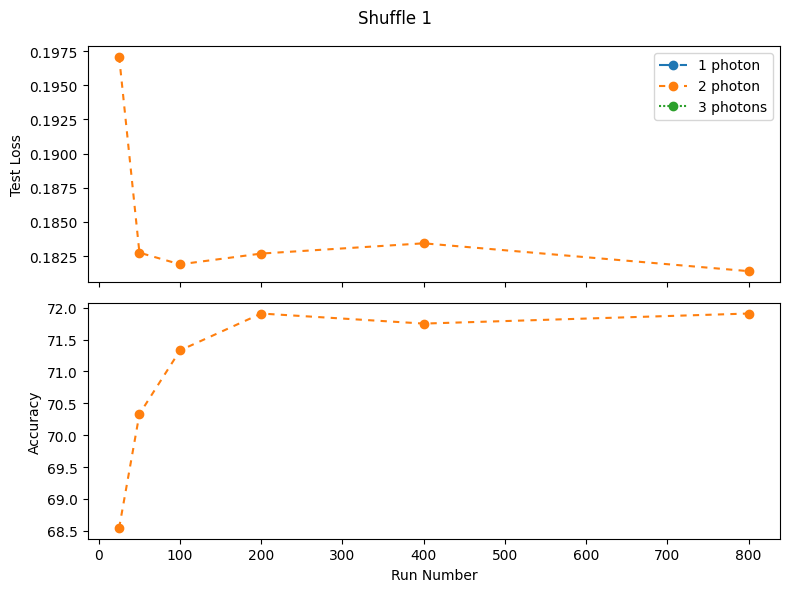

[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-loss-25/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-loss-50/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-loss-100/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-loss-200/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-loss-400/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-loss-800/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-acc-25/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-acc-50/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-acc-100/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-acc-200/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-acc-400/t0s1.npz
[Warning] Missing f

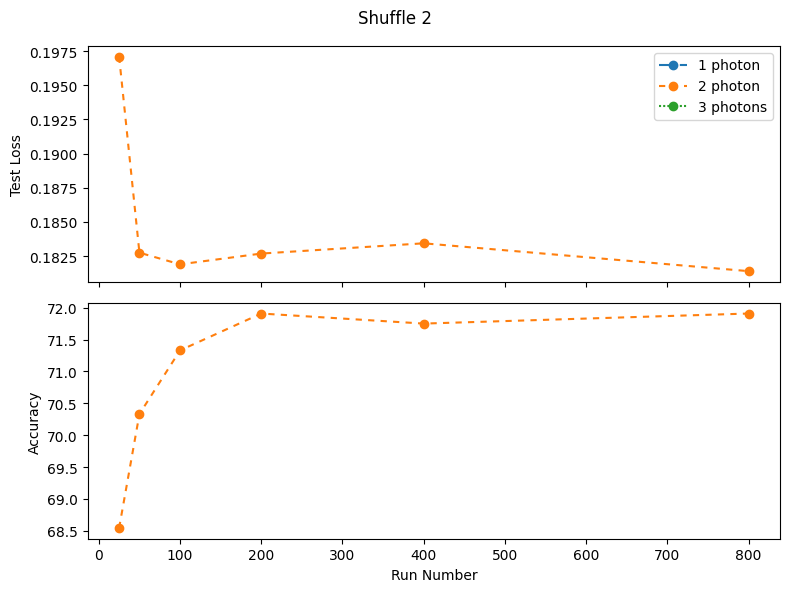

[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-loss-25/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-loss-50/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-loss-100/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-loss-200/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-loss-400/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-loss-800/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-acc-25/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-acc-50/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-acc-100/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-acc-200/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p1-shuffle-rf4-800/test-acc-400/t0s1.npz
[Warning] Missing f

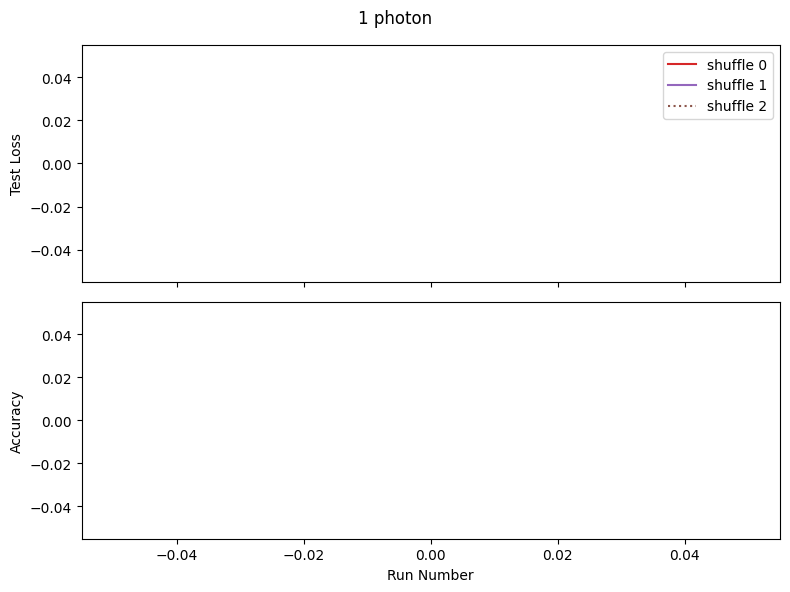

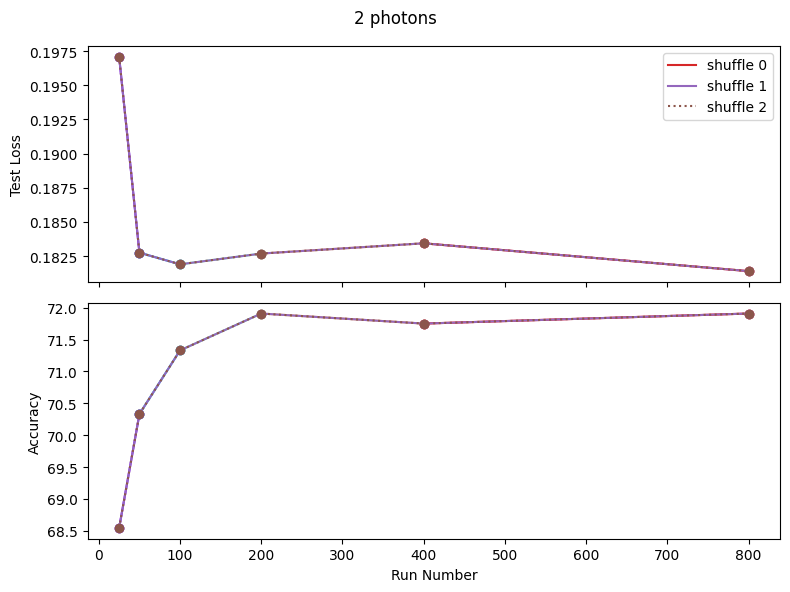

[Warning] Missing file: /user/home/zj22662/work/p/test-loss-25/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p/test-loss-50/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p/test-loss-100/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p/test-loss-200/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p/test-loss-400/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p/test-loss-800/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p/test-acc-25/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p/test-acc-50/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p/test-acc-100/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p/test-acc-200/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p/test-acc-400/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p/test-acc-800/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p/test-loss-25/t0s1.npz
[Warning] Missing file: /user/home/zj22662/work/p/test-loss-50

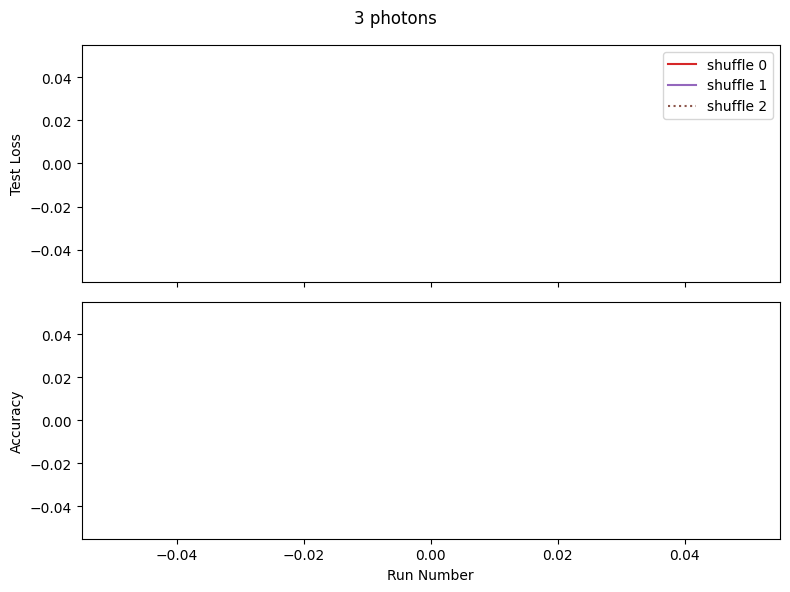

In [27]:
from pathlib import Path
from p_pack import globals as g


# Mapping of photon number to their respective result directories
PHOTON_DIRS = {
    1: "p1-shuffle-rf4-800",
    2: "reup-tuple-test",
    3: "p",
}

# Explicit colors so photon and shuffle plots do not share palettes
PHOTON_COLORS = {1: "tab:blue", 2: "tab:orange", 3: "tab:green"}
SHUFFLE_COLORS = {0: "tab:red", 1: "tab:purple", 2: "tab:brown"}

# Line styles for photon comparison plots (all dotted with increasing frequency)
PHOTON_LINESTYLES = {
    1: (0, (5, 5)),  # least frequent dots
    2: (0, (3, 3)),  # medium frequency
    3: (0, (1, 1)),  # most frequent dots
}

# Training runs that were evaluated
RUN_NUMBERS = [25, 50, 100, 200, 400, 800]


def _load_metric(photon_dir: str, metric: str, shuffle_type: int):
    """Load metric values for a photon configuration and shuffle type.

    Parameters
    ----------
    photon_dir:
        Root directory for the photon configuration (e.g. ``p1-shuffle-rf4-800``).
    metric:
        Either ``"test-loss"`` or ``"test-acc"``.
    shuffle_type:
        The shuffle index (0, 1 or 2).

    Returns
    -------
    tuple[list[int], list[float]]
        Lists of run numbers and the corresponding metric values.  Missing
        files are skipped with a warning.
    """

    # Build absolute path to the photon directory within the external ``work`` folder
    script_dir = g.os.getcwd()
    parent_dir = g.os.path.abspath(g.os.path.join(script_dir, ".."))
    base_path = Path(parent_dir) / "work" / photon_dir

    runs, values = [], []
    for run in RUN_NUMBERS:
        file_path = (
            base_path / f"{metric}-{run}" / f"t{0}s{1}.npz"
        )
        if not file_path.exists():
            print(f"[Warning] Missing file: {file_path}")
            continue
        with g.np.load(file_path, allow_pickle=True) as data:
            # Files saved by ``evaluate_and_save_test_loss`` always use the
            # ``test_loss`` key even when storing accuracy.
            values.append(data["test_loss"].item())
            runs.append(run)
    return runs, values


def _plot_multicolor(ax, x, y, marker="o"):
    """Plot a line with a rainbow colormap along its length."""

    if len(x) < 2:
        ax.plot(x, y, marker=marker)
        return

    colors = g.plt.cm.rainbow(g.np.linspace(0, 1, len(x) - 1))
    for i in range(len(x) - 1):
        ax.plot(x[i : i + 2], y[i : i + 2], color=colors[i], marker=marker)


def plot_results():
    """Create figures for each shuffle type showing loss and accuracy."""

    labels = {1: "1 photon", 2: "2 photon", 3: "3 photons"}

    for shuffle in [0, 1, 2]:
        fig, (ax_loss, ax_acc) = g.plt.subplots(2, 1, sharex=True, figsize=(8, 6))

        for p, directory in PHOTON_DIRS.items():
            run_loss, loss_vals = _load_metric(directory, "test-loss", shuffle)
            run_acc, acc_vals = _load_metric(directory, "test-acc", shuffle)

            ax_loss.plot(
                run_loss,
                loss_vals,
                marker="o",
                label=labels[p],
                color=PHOTON_COLORS[p],
                linestyle=PHOTON_LINESTYLES[p],
            )
            ax_acc.plot(
                run_acc,
                acc_vals,
                marker="o",
                label=labels[p],
                color=PHOTON_COLORS[p],
                linestyle=PHOTON_LINESTYLES[p],
            )

        ax_loss.set_ylabel("Test Loss")
        ax_loss.legend()
        ax_acc.set_ylabel("Accuracy")
        ax_acc.set_xlabel("Run Number")
        fig.suptitle(f"Shuffle {shuffle}")
        g.plt.tight_layout()
        g.plt.show()


def plot_photon_results():
    """Create figures for each photon number showing loss and accuracy."""

    labels = {0: "shuffle 0", 1: "shuffle 1", 2: "shuffle 2"}

    for p, directory in PHOTON_DIRS.items():
        fig, (ax_loss, ax_acc) = g.plt.subplots(2, 1, sharex=True, figsize=(8, 6))

        for shuffle in [0,1,2]:
            run_loss, loss_vals = _load_metric(directory, "test-loss", shuffle)
            run_acc, acc_vals = _load_metric(directory, "test-acc", shuffle)

            if shuffle == 0:
                _plot_multicolor(ax_loss, run_loss, loss_vals)
                _plot_multicolor(ax_acc, run_acc, acc_vals)
            else:
                linestyle = ":" if shuffle == 2 else "-"
                ax_loss.plot(
                    run_loss,
                    loss_vals,
                    marker="o",
                    label=labels[shuffle],
                    color=SHUFFLE_COLORS[shuffle],
                    linestyle=linestyle,
                )
                ax_acc.plot(
                    run_acc,
                    acc_vals,
                    marker="o",
                    label=labels[shuffle],
                    color=SHUFFLE_COLORS[shuffle],
                    linestyle=linestyle,
                )

        handles = [
            g.plt.Line2D([], [], color=SHUFFLE_COLORS[0], label=labels[0]),
            g.plt.Line2D(
                [], [], color=SHUFFLE_COLORS[1], linestyle="-", label=labels[1]
            ),
            g.plt.Line2D(
                [], [], color=SHUFFLE_COLORS[2], linestyle=":", label=labels[2]
            ),
        ]
        ax_loss.set_ylabel("Test Loss")
        ax_loss.legend(handles=handles)
        ax_acc.set_ylabel("Accuracy")
        ax_acc.set_xlabel("Run Number")
        title = f"{p} photon" if p == 1 else f"{p} photons"
        fig.suptitle(title)
        g.plt.tight_layout()
        g.plt.show()

plot_results()
plot_photon_results()


In [7]:
# ---- Cell 2: init_phases-2 curves with optional test-loss lines ----
from p_pack import globals as g
from pathlib import Path

# -------- Configuration --------
data_folders = ("d10-p3-long-test/Learning",)
for i in data_folders:
    data_folder = i
    file_indent = 's'
    indexes_to_plot = [1,2,3]  # Choose the indexes you want to plot
    legend_names = ["1", "2", "3"]  # Custom labels, must match index order
    x_min = 400
    x_max = 600
    y_min = 0.05
    y_max = 0.1
    plot_test_loss = 0 # set to 1 to show test loss lines
    test_loss_folder = "p1-position0-vs-shuffle-rf2/test-pos0"

    # Create two side-by-side plots
    fig, (ax_full, ax_zoom) = g.plt.subplots(1, 2, figsize=(12, 5))

    # Set data folder path
    script_dir = g.os.getcwd()
    parent_dir = g.os.path.abspath(g.os.path.join(script_dir, ".."))
    data_folder_path = g.os.path.join(parent_dir, "work", data_folder)
    test_folder_path = g.os.path.join(parent_dir, "work", test_loss_folder)

    # Loop over the selected indexes and legend labels
    for idx, label in zip(indexes_to_plot, legend_names):
        matches = list(Path(data_folder_path).glob(f"it0s1g.npz"))
        if not matches:
            print(f"[Warning] Global file for index {idx} not found.")
            continue

        global_name = matches[0].name
        data_name   = global_name.replace("g.npz", ".npz")

        data_path    = g.os.path.join(data_folder_path, data_name)
        globals_path = g.os.path.join(data_folder_path, global_name)

        out    = g.np.load(data_path)
        steps  = out["loss_mem"][:, 0].astype(int)
        losses = out["loss_mem"][:, 1].astype(float)

        # plot training loss and capture its color
        line_full, = ax_full.plot(steps, losses, linewidth=1.5, label=label)
        line_zoom, = ax_zoom.plot(steps, losses, linewidth=1.5, label=label)
        color = line_full.get_color()

        if plot_test_loss:
            test_name = 't' + global_name[2:].replace('g.npz', '.npz')
            test_path = g.os.path.join(test_folder_path, test_name)
            if g.os.path.exists(test_path):
                tl = g.np.load(test_path)['test_loss'].item()
                # draw test-loss as a horizontal line in the same color
                ax_full.axline((0, tl), (1, tl),
                            linestyle='--',
                            color=color,
                            label=f'test {label}')
                ax_zoom.axline((0, tl), (1, tl),
                            linestyle='--',
                            color=color)
            else:
                print(f"[Warning] Test loss file {test_name} not found.")

    # finalize axes
    ax_full.set(xlabel='step', ylabel='loss', title='Full Training Curve')
    ax_zoom.set(xlim=(x_min, x_max), ylim=(y_min, y_max),
                xlabel='step', ylabel='loss',
                title=f'Zoomed (steps {x_min}–{x_max})')

    handles, labels = ax_full.get_legend_handles_labels()
    ax_full.legend(handles, labels, loc='upper right', ncol=2, fontsize='small')

    gl    = g.np.load(globals_path)
    shape = out['carry_0'].shape
    fig.suptitle(
       # f"Unitary dim: {2*shape[1]}×{2*shape[1]}, p={gl['p_suc_inputs'].item()}, input=2 shuffle={gl['shuffle_type'].item()}, rf={gl['reupload_freq'].item()}"
       "10x10 shuffle 0, rf 4, varying photon number "
    )

    g.plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    g.plt.show()



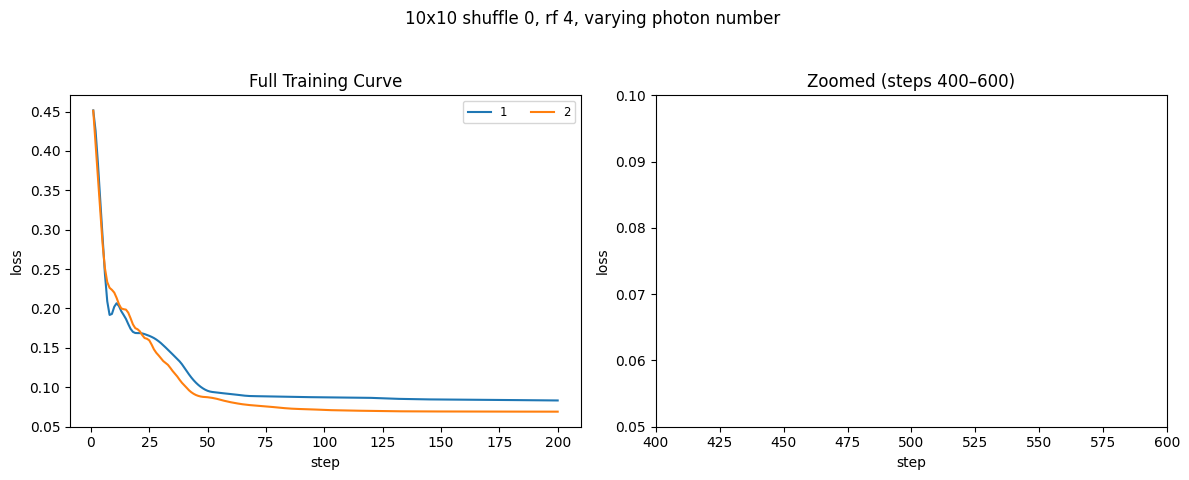

In [11]:
# ---- Cell 2: init_phases-2 curves with optional test-loss lines ----
from p_pack import globals as g
from pathlib import Path

# -------- Configuration --------
data_folders = ("sample-pos-test/Learning",)
for i in data_folders:
    data_folder = i
    file_indent = 's'
    indexes_to_plot = [0,1]  # Choose the indexes you want to plot
    legend_names = ["1", "2", "3"]  # Custom labels, must match index order
    x_min = 400
    x_max = 600
    y_min = 0.05
    y_max = 0.1
    plot_test_loss = 0 # set to 1 to show test loss lines
    test_loss_folder = "p1-position0-vs-shuffle-rf2/test-pos0"

    # Create two side-by-side plots
    fig, (ax_full, ax_zoom) = g.plt.subplots(1, 2, figsize=(12, 5))

    # Set data folder path
    script_dir = g.os.getcwd()
    parent_dir = g.os.path.abspath(g.os.path.join(script_dir, ".."))
    data_folder_path = g.os.path.join(parent_dir, "work", data_folder)
    test_folder_path = g.os.path.join(parent_dir, "work", test_loss_folder)

    # Loop over the selected indexes and legend labels
    for idx, label in zip(indexes_to_plot, legend_names):
        matches = list(Path(data_folder_path).glob(f"it{idx}{file_indent}*g.npz"))
        if not matches:
            print(f"[Warning] Global file for index {idx} not found.")
            continue

        global_name = matches[0].name
        data_name   = global_name.replace("g.npz", ".npz")

        data_path    = g.os.path.join(data_folder_path, data_name)
        globals_path = g.os.path.join(data_folder_path, global_name)

        out    = g.np.load(data_path)
        steps  = out["loss_mem"][:, 0].astype(int)
        losses = out["loss_mem"][:, 1].astype(float)

        # plot training loss and capture its color
        line_full, = ax_full.plot(steps, losses, linewidth=1.5, label=label)
        line_zoom, = ax_zoom.plot(steps, losses, linewidth=1.5, label=label)
        color = line_full.get_color()

        if plot_test_loss:
            test_name = 't' + global_name[2:].replace('g.npz', '.npz')
            test_path = g.os.path.join(test_folder_path, test_name)
            if g.os.path.exists(test_path):
                tl = g.np.load(test_path)['test_loss'].item()
                # draw test-loss as a horizontal line in the same color
                ax_full.axline((0, tl), (1, tl),
                            linestyle='--',
                            color=color,
                            label=f'test {label}')
                ax_zoom.axline((0, tl), (1, tl),
                            linestyle='--',
                            color=color)
            else:
                print(f"[Warning] Test loss file {test_name} not found.")

    # finalize axes
    ax_full.set(xlabel='step', ylabel='loss', title='Full Training Curve')
    ax_zoom.set(xlim=(x_min, x_max), ylim=(y_min, y_max),
                xlabel='step', ylabel='loss',
                title=f'Zoomed (steps {x_min}–{x_max})')

    handles, labels = ax_full.get_legend_handles_labels()
    ax_full.legend(handles, labels, loc='upper right', ncol=2, fontsize='small')

    gl    = g.np.load(globals_path)
    shape = out['carry_0'].shape
    fig.suptitle(
       # f"Unitary dim: {2*shape[1]}×{2*shape[1]}, p={gl['p_suc_inputs'].item()}, input=2 shuffle={gl['shuffle_type'].item()}, rf={gl['reupload_freq'].item()}"
       "10x10 shuffle 0, rf 4, varying photon number "
    )

    g.plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    g.plt.show()



In [2]:
# ---- Cell 2: init_phases-2 curves with optional test-loss lines ----
from p_pack import globals as g
from pathlib import Path

# -------- Configuration --------
data_folders = ("p1-pos-sample-s-all-1500/Learning",)
                # "p2-pos-sample-s-all-2/Learning", "p3-pos-sample-s-all-2/Learning" )
for i in data_folders:
    data_folder = i
    file_indent = 's'
    indexes_to_plot = [0, 1, 2]  # Choose the indexes you want to plot
    legend_names = ["1", "2", "3"]  # Custom labels, must match index order
    x_min = 0
    x_max = 50
    y_min = 0.1
    y_max = 0.45
    plot_test_loss = 0 # set to 1 to show test loss lines
    test_loss_folder = "p1-position0-vs-shuffle-rf2/test-pos0"

    # Create two side-by-side plots
    fig, (ax_full, ax_zoom) = g.plt.subplots(1, 2, figsize=(12, 5))

    # Set data folder path
    script_dir = g.os.getcwd()
    parent_dir = g.os.path.abspath(g.os.path.join(script_dir, ".."))
    data_folder_path = g.os.path.join(parent_dir, "work", data_folder)
    test_folder_path = g.os.path.join(parent_dir, "work", test_loss_folder)

    # Loop over the selected indexes and legend labels
    for idx, label in zip(indexes_to_plot, legend_names):
        matches = list(Path(data_folder_path).glob(f"it{idx}{file_indent}*g.npz"))
        if not matches:
            print(f"[Warning] Global file for index {idx} not found.")
            continue

        global_name = matches[0].name
        data_name   = global_name.replace("g.npz", ".npz")

        data_path    = g.os.path.join(data_folder_path, data_name)
        globals_path = g.os.path.join(data_folder_path, global_name)

        out    = g.np.load(data_path)
        steps  = out["loss_mem"][:, 0].astype(int)
        losses = out["loss_mem"][:, 1].astype(float)

        # plot training loss and capture its color
        line_full, = ax_full.plot(steps, losses, linewidth=1.5, label=label)
        line_zoom, = ax_zoom.plot(steps, losses, linewidth=1.5, label=label)
        color = line_full.get_color()

        if plot_test_loss:
            test_name = 't' + global_name[2:].replace('g.npz', '.npz')
            test_path = g.os.path.join(test_folder_path, test_name)
            if g.os.path.exists(test_path):
                tl = g.np.load(test_path)['test_loss'].item()
                # draw test-loss as a horizontal line in the same color
                ax_full.axline((0, tl), (1, tl),
                            linestyle='--',
                            color=color,
                            label=f'test {label}')
                ax_zoom.axline((0, tl), (1, tl),
                            linestyle='--',
                            color=color)
            else:
                print(f"[Warning] Test loss file {test_name} not found.")

    # finalize axes
    ax_full.set(xlabel='step', ylabel='loss', title='Full Training Curve')
    ax_zoom.set(xlim=(x_min, x_max), ylim=(y_min, y_max),
                xlabel='step', ylabel='loss',
                title=f'Zoomed (steps {x_min}–{x_max})')

    handles, labels = ax_full.get_legend_handles_labels()
    ax_full.legend(handles, labels, loc='upper right', ncol=2, fontsize='small')

    gl    = g.np.load(globals_path)
    shape = out['carry_0'].shape
    fig.suptitle(
       # f"Unitary dim: {2*shape[1]}×{2*shape[1]}, p={gl['p_suc_inputs'].item()}, input=2 shuffle={gl['shuffle_type'].item()}, rf={gl['reupload_freq'].item()}"
       "10x10 shuffle 0, rf 4, varying photon number "
    )

    g.plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    g.plt.show()



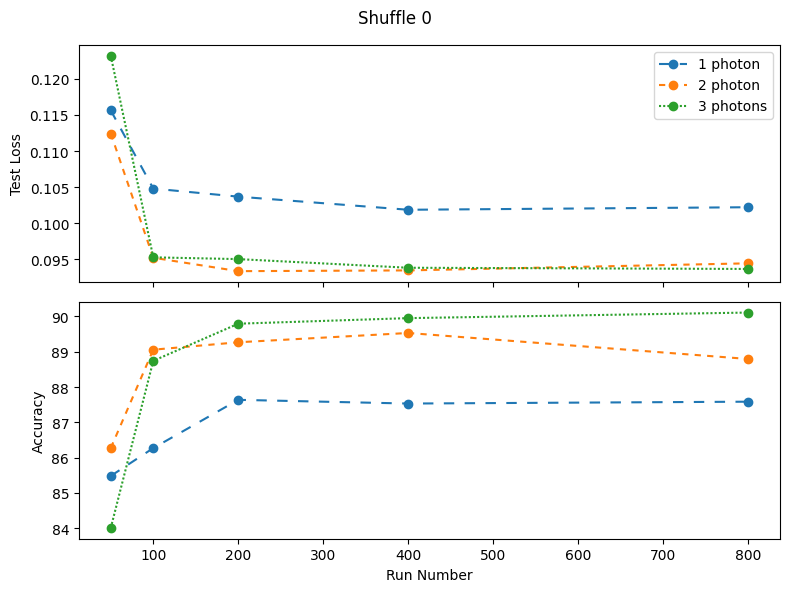

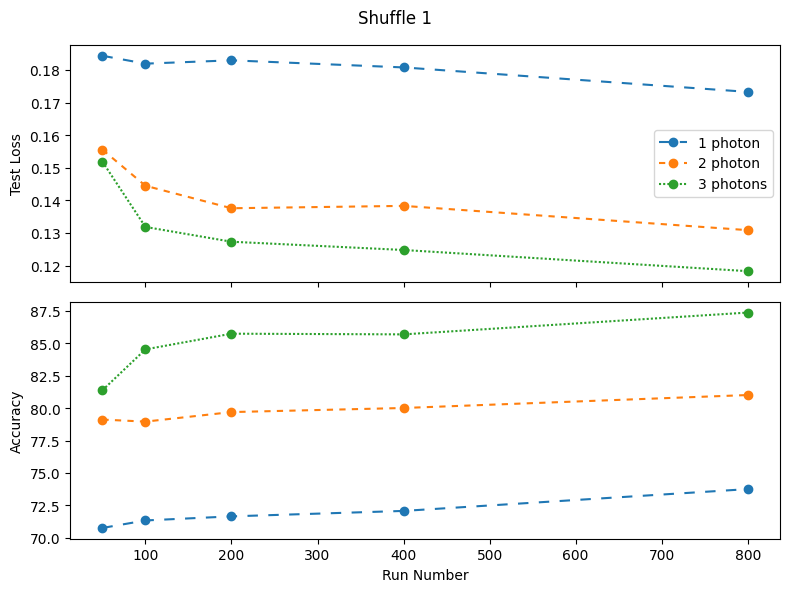

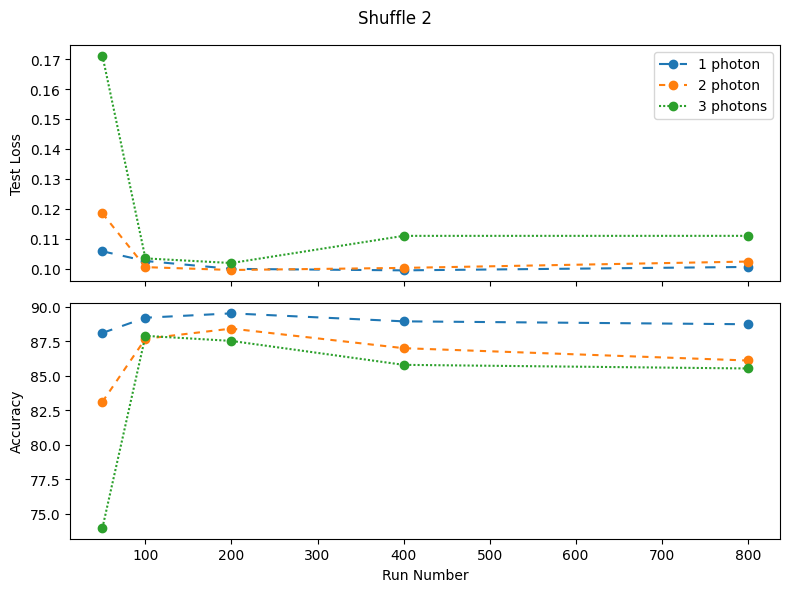

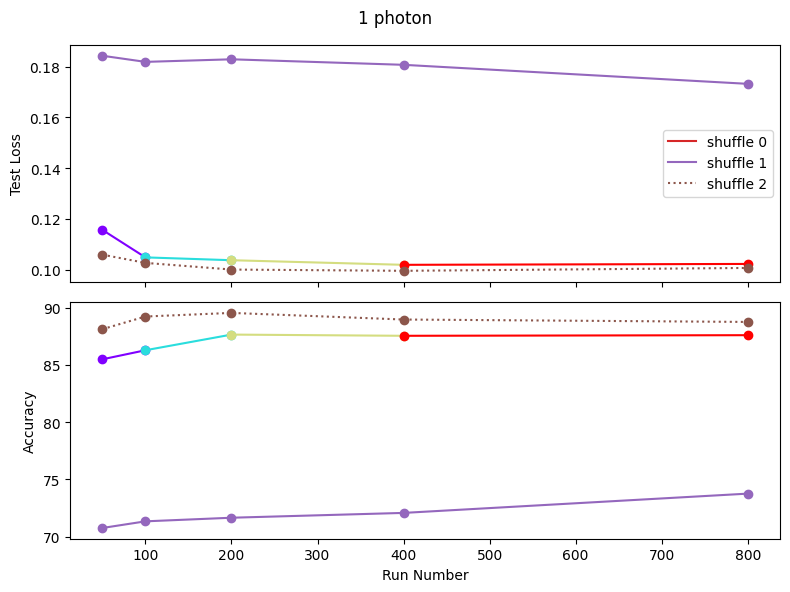

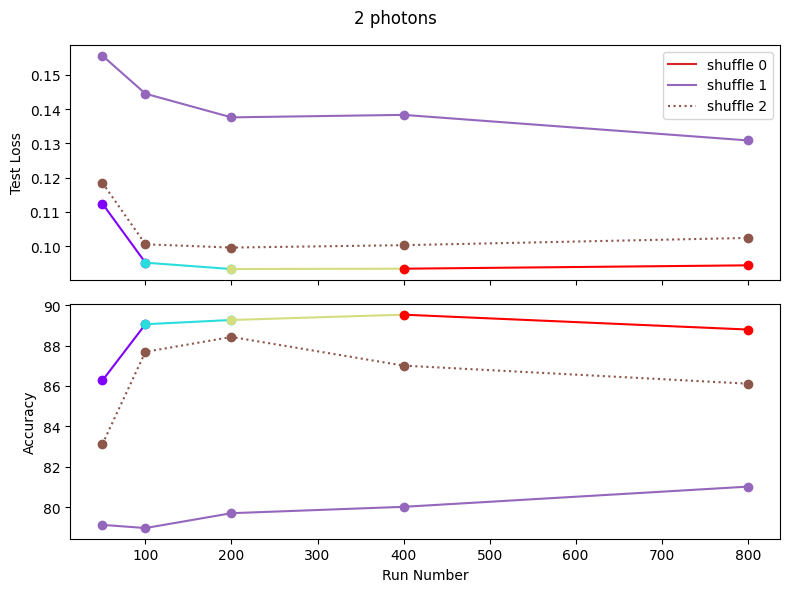

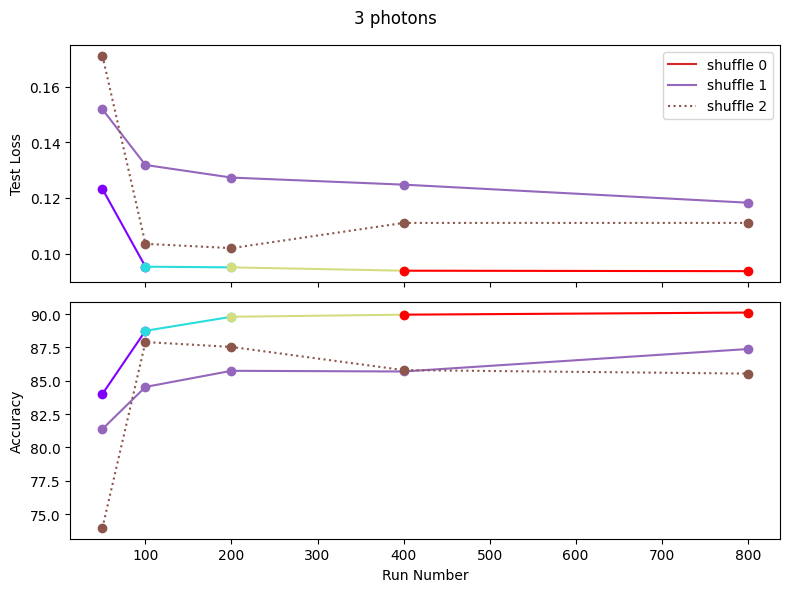

In [59]:
from pathlib import Path
from p_pack import globals as g


# Mapping of photon number to their respective result directories
PHOTON_DIRS = {
    1: "p1-pos-sample-s-all",
    2: "p2-pos-sample-s-all",
    3: "p3-pos-sample-s-all",
}

# Explicit colors so photon and shuffle plots do not share palettes
PHOTON_COLORS = {1: "tab:blue", 2: "tab:orange", 3: "tab:green"}
SHUFFLE_COLORS = {0: "tab:red", 1: "tab:purple", 2: "tab:brown"}

# Line styles for photon comparison plots (all dotted with increasing frequency)
PHOTON_LINESTYLES = {
    1: (0, (5, 5)),  # least frequent dots
    2: (0, (3, 3)),  # medium frequency
    3: (0, (1, 1)),  # most frequent dots
}

# Training runs that were evaluated
RUN_NUMBERS = [50,100,200,400,800]


def _load_metric(photon_dir: str, metric: str, shuffle_type: int):
    """Load metric values for a photon configuration and shuffle type.

    Parameters
    ----------
    photon_dir:
        Root directory for the photon configuration (e.g. ``p1-shuffle-rf4-800``).
    metric:
        Either ``"test-loss"`` or ``"test-acc"``.
    shuffle_type:
        The shuffle index (0, 1 or 2).

    Returns
    -------
    tuple[list[int], list[float]]
        Lists of run numbers and the corresponding metric values.  Missing
        files are skipped with a warning.
    """

    # Build absolute path to the photon directory within the external ``work`` folder
    script_dir = g.os.getcwd()
    parent_dir = g.os.path.abspath(g.os.path.join(script_dir, ".."))
    base_path = Path(parent_dir) / "work" / photon_dir

    runs, values = [], []
    for run in RUN_NUMBERS:
        file_path = (
            base_path / f"{metric}-{run}" / f"t{shuffle_type}s{shuffle_type}.npz"
        )
        if not file_path.exists():
            print(f"[Warning] Missing file: {file_path}")
            continue
        with g.np.load(file_path, allow_pickle=True) as data:
            # Files saved by ``evaluate_and_save_test_loss`` always use the
            # ``test_loss`` key even when storing accuracy.
            values.append(data["test_loss"].item())
            runs.append(run)
    return runs, values


def _plot_multicolor(ax, x, y, marker="o"):
    """Plot a line with a rainbow colormap along its length."""

    if len(x) < 2:
        ax.plot(x, y, marker=marker)
        return

    colors = g.plt.cm.rainbow(g.np.linspace(0, 1, len(x) - 1))
    for i in range(len(x) - 1):
        ax.plot(x[i : i + 2], y[i : i + 2], color=colors[i], marker=marker)


def plot_results():
    """Create figures for each shuffle type showing loss and accuracy."""

    labels = {1: "1 photon", 2: "2 photon", 3: "3 photons"}

    for shuffle in [0, 1, 2]:
        fig, (ax_loss, ax_acc) = g.plt.subplots(2, 1, sharex=True, figsize=(8, 6))

        for p, directory in PHOTON_DIRS.items():
            run_loss, loss_vals = _load_metric(directory, "test-loss-av", shuffle)
            run_acc, acc_vals = _load_metric(directory, "test-acc-av", shuffle)

            ax_loss.plot(
                run_loss,
                loss_vals,
                marker="o",
                label=labels[p],
                color=PHOTON_COLORS[p],
                linestyle=PHOTON_LINESTYLES[p],
            )
            ax_acc.plot(
                run_acc,
                acc_vals,
                marker="o",
                label=labels[p],
                color=PHOTON_COLORS[p],
                linestyle=PHOTON_LINESTYLES[p],
            )

        ax_loss.set_ylabel("Test Loss")
        ax_loss.legend()
        ax_acc.set_ylabel("Accuracy")
        ax_acc.set_xlabel("Run Number")
        fig.suptitle(f"Shuffle {shuffle}")
        g.plt.tight_layout()
        g.plt.show()


def plot_photon_results():
    """Create figures for each photon number showing loss and accuracy."""

    labels = {0: "shuffle 0", 1: "shuffle 1", 2: "shuffle 2"}

    for p, directory in PHOTON_DIRS.items():
        fig, (ax_loss, ax_acc) = g.plt.subplots(2, 1, sharex=True, figsize=(8, 6))

        for shuffle in [0,1,2]:
            run_loss, loss_vals = _load_metric(directory, "test-loss-av", shuffle)
            run_acc, acc_vals = _load_metric(directory, "test-acc-av", shuffle)

            if shuffle == 0:
                _plot_multicolor(ax_loss, run_loss, loss_vals)
                _plot_multicolor(ax_acc, run_acc, acc_vals)
            else:
                linestyle = ":" if shuffle == 2 else "-"
                ax_loss.plot(
                    run_loss,
                    loss_vals,
                    marker="o",
                    label=labels[shuffle],
                    color=SHUFFLE_COLORS[shuffle],
                    linestyle=linestyle,
                )
                ax_acc.plot(
                    run_acc,
                    acc_vals,
                    marker="o",
                    label=labels[shuffle],
                    color=SHUFFLE_COLORS[shuffle],
                    linestyle=linestyle,
                )

        handles = [
            g.plt.Line2D([], [], color=SHUFFLE_COLORS[0], label=labels[0]),
            g.plt.Line2D(
                [], [], color=SHUFFLE_COLORS[1], linestyle="-", label=labels[1]
            ),
            g.plt.Line2D(
                [], [], color=SHUFFLE_COLORS[2], linestyle=":", label=labels[2]
            ),
        ]
        ax_loss.set_ylabel("Test Loss")
        ax_loss.legend(handles=handles)
        ax_acc.set_ylabel("Accuracy")
        ax_acc.set_xlabel("Run Number")
        title = f"{p} photon" if p == 1 else f"{p} photons"
        fig.suptitle(title)
        g.plt.tight_layout()
        g.plt.show()

plot_results()
plot_photon_results()


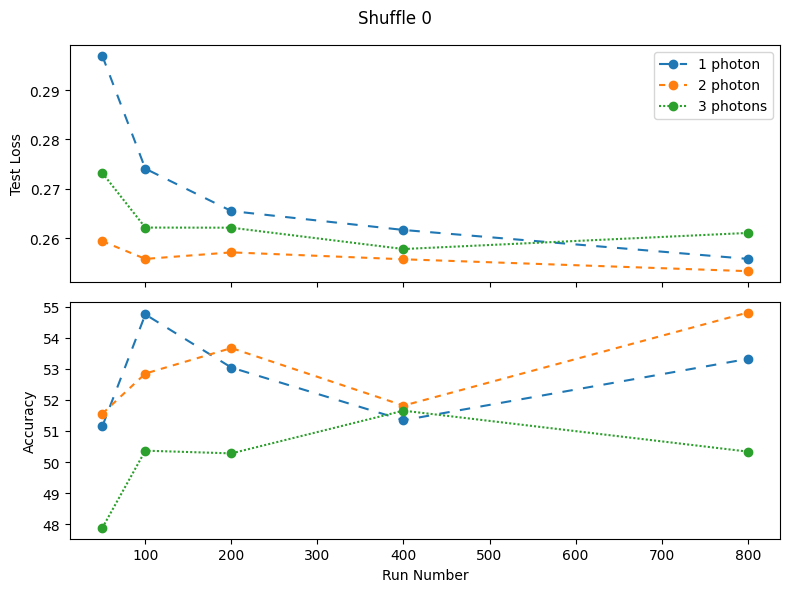

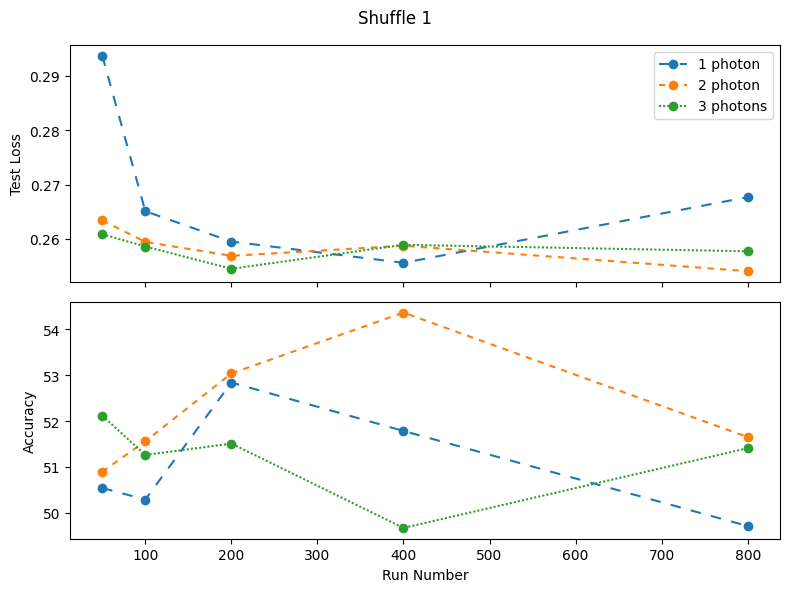

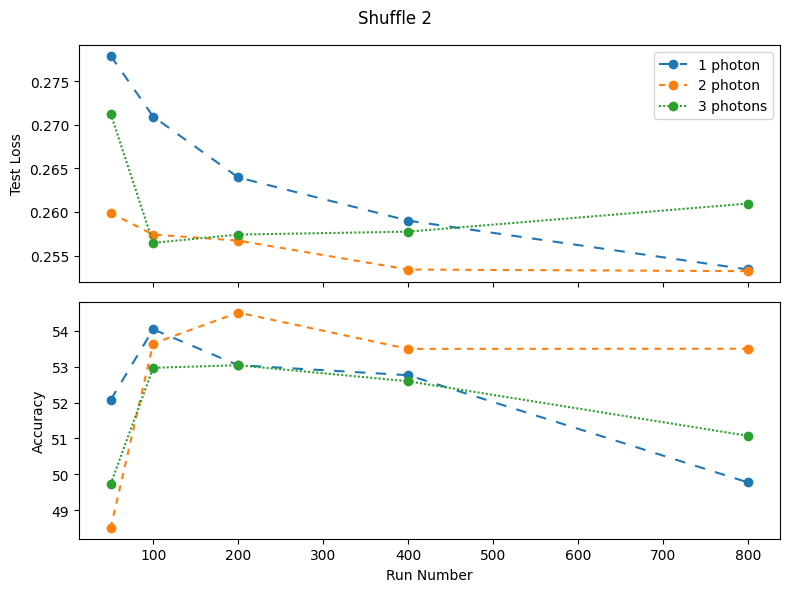

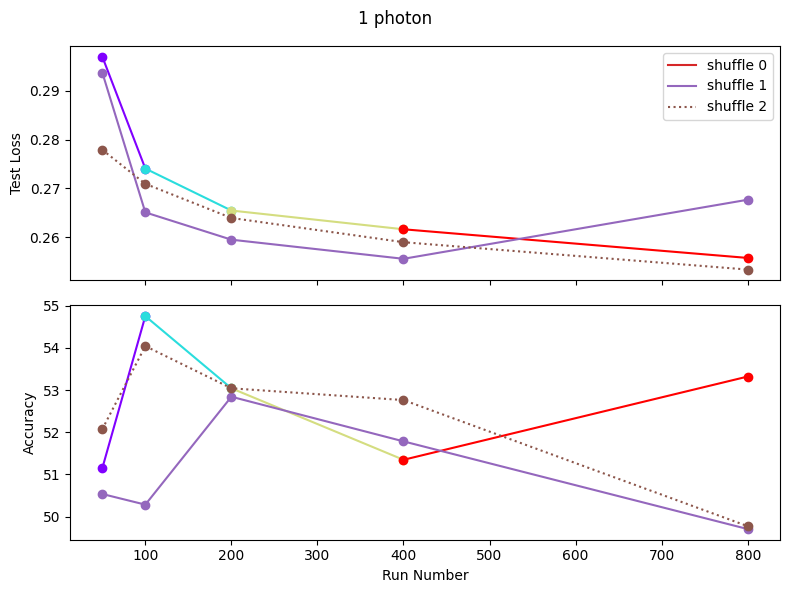

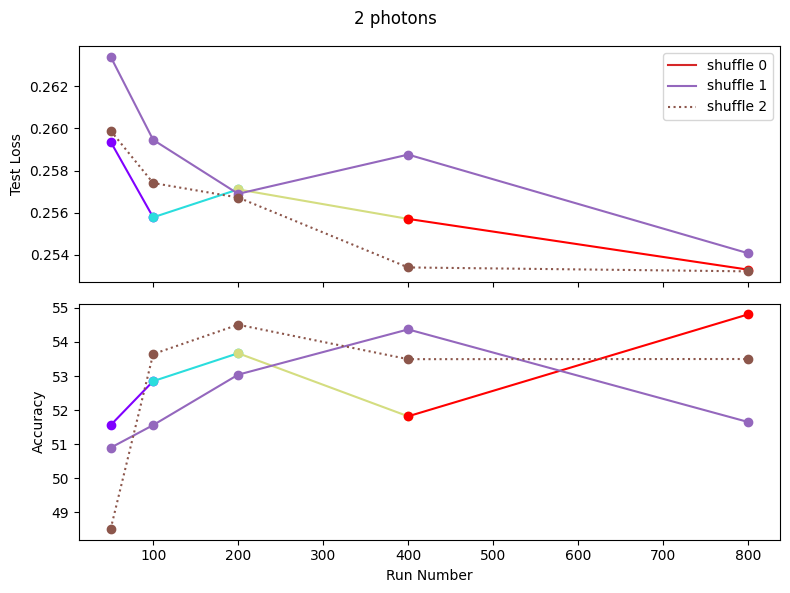

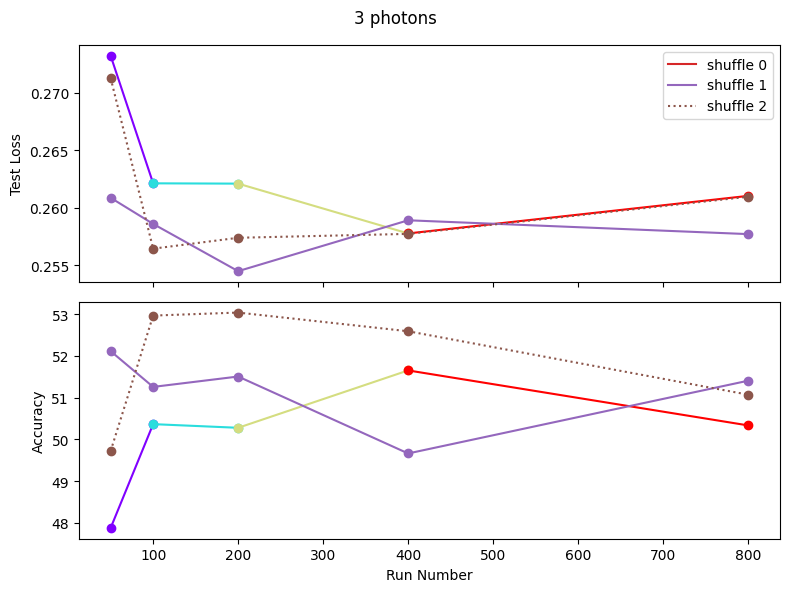

In [77]:
from pathlib import Path
from p_pack import globals as g


# Mapping of photon number to their respective result directories
PHOTON_DIRS = {
    1: "p1-pos-sample-s-all-2",
    2: "p2-pos-sample-s-all-2",
    3: "p3-pos-sample-s-all-2",
}

# Explicit colors so photon and shuffle plots do not share palettes
PHOTON_COLORS = {1: "tab:blue", 2: "tab:orange", 3: "tab:green"}
SHUFFLE_COLORS = {0: "tab:red", 1: "tab:purple", 2: "tab:brown"}

# Line styles for photon comparison plots (all dotted with increasing frequency)
PHOTON_LINESTYLES = {
    1: (0, (5, 5)),  # least frequent dots
    2: (0, (3, 3)),  # medium frequency
    3: (0, (1, 1)),  # most frequent dots
}

# Training runs that were evaluated
RUN_NUMBERS = [50,100,200,400,800]


def _load_metric(photon_dir: str, metric: str, shuffle_type: int):
    """Load metric values for a photon configuration and shuffle type.

    Parameters
    ----------
    photon_dir:
        Root directory for the photon configuration (e.g. ``p1-shuffle-rf4-800``).
    metric:
        Either ``"test-loss"`` or ``"test-acc"``.
    shuffle_type:
        The shuffle index (0, 1 or 2).

    Returns
    -------
    tuple[list[int], list[float]]
        Lists of run numbers and the corresponding metric values.  Missing
        files are skipped with a warning.
    """

    # Build absolute path to the photon directory within the external ``work`` folder
    script_dir = g.os.getcwd()
    parent_dir = g.os.path.abspath(g.os.path.join(script_dir, ".."))
    base_path = Path(parent_dir) / "work" / photon_dir

    runs, values = [], []
    for run in RUN_NUMBERS:
        file_path = (
            base_path / f"{metric}-{run}" / f"t{shuffle_type}s{shuffle_type}.npz"
        )
        if not file_path.exists():
            print(f"[Warning] Missing file: {file_path}")
            continue
        with g.np.load(file_path, allow_pickle=True) as data:
            # Files saved by ``evaluate_and_save_test_loss`` always use the
            # ``test_loss`` key even when storing accuracy.
            values.append(data["test_loss"].item())
            runs.append(run)
    return runs, values


def _plot_multicolor(ax, x, y, marker="o"):
    """Plot a line with a rainbow colormap along its length."""

    if len(x) < 2:
        ax.plot(x, y, marker=marker)
        return

    colors = g.plt.cm.rainbow(g.np.linspace(0, 1, len(x) - 1))
    for i in range(len(x) - 1):
        ax.plot(x[i : i + 2], y[i : i + 2], color=colors[i], marker=marker)


def plot_results():
    """Create figures for each shuffle type showing loss and accuracy."""

    labels = {1: "1 photon", 2: "2 photon", 3: "3 photons"}

    for shuffle in [0, 1, 2]:
        fig, (ax_loss, ax_acc) = g.plt.subplots(2, 1, sharex=True, figsize=(8, 6))

        for p, directory in PHOTON_DIRS.items():
            run_loss, loss_vals = _load_metric(directory, "test-loss-av", shuffle)
            run_acc, acc_vals = _load_metric(directory, "test-acc-av", shuffle)

            ax_loss.plot(
                run_loss,
                loss_vals,
                marker="o",
                label=labels[p],
                color=PHOTON_COLORS[p],
                linestyle=PHOTON_LINESTYLES[p],
            )
            ax_acc.plot(
                run_acc,
                acc_vals,
                marker="o",
                label=labels[p],
                color=PHOTON_COLORS[p],
                linestyle=PHOTON_LINESTYLES[p],
            )

        ax_loss.set_ylabel("Test Loss")
        ax_loss.legend()
        ax_acc.set_ylabel("Accuracy")
        ax_acc.set_xlabel("Run Number")
        fig.suptitle(f"Shuffle {shuffle}")
        g.plt.tight_layout()
        g.plt.show()


def plot_photon_results():
    """Create figures for each photon number showing loss and accuracy."""

    labels = {0: "shuffle 0", 1: "shuffle 1", 2: "shuffle 2"}

    for p, directory in PHOTON_DIRS.items():
        fig, (ax_loss, ax_acc) = g.plt.subplots(2, 1, sharex=True, figsize=(8, 6))

        for shuffle in [0,1,2]:
            run_loss, loss_vals = _load_metric(directory, "test-loss-av", shuffle)
            run_acc, acc_vals = _load_metric(directory, "test-acc-av", shuffle)

            if shuffle == 0:
                _plot_multicolor(ax_loss, run_loss, loss_vals)
                _plot_multicolor(ax_acc, run_acc, acc_vals)
            else:
                linestyle = ":" if shuffle == 2 else "-"
                ax_loss.plot(
                    run_loss,
                    loss_vals,
                    marker="o",
                    label=labels[shuffle],
                    color=SHUFFLE_COLORS[shuffle],
                    linestyle=linestyle,
                )
                ax_acc.plot(
                    run_acc,
                    acc_vals,
                    marker="o",
                    label=labels[shuffle],
                    color=SHUFFLE_COLORS[shuffle],
                    linestyle=linestyle,
                )

        handles = [
            g.plt.Line2D([], [], color=SHUFFLE_COLORS[0], label=labels[0]),
            g.plt.Line2D(
                [], [], color=SHUFFLE_COLORS[1], linestyle="-", label=labels[1]
            ),
            g.plt.Line2D(
                [], [], color=SHUFFLE_COLORS[2], linestyle=":", label=labels[2]
            ),
        ]
        ax_loss.set_ylabel("Test Loss")
        ax_loss.legend(handles=handles)
        ax_acc.set_ylabel("Accuracy")
        ax_acc.set_xlabel("Run Number")
        title = f"{p} photon" if p == 1 else f"{p} photons"
        fig.suptitle(title)
        g.plt.tight_layout()
        g.plt.show()

plot_results()
plot_photon_results()


Accuracy mean ± std:
             0          1          2
run                                 
50   51.1±13.1  50.5±8.96  52.1±9.72
100  54.8±18.5  50.3±10.9    54±19.3
200    53±21.4    52.8±12    53±12.2
400  51.3±11.1  51.8±11.7  52.8±10.4
800  53.3±8.56  49.7±7.77  49.8±11.2

Loss mean ± std:
                0             1             2
run                                          
50   0.297±0.0634  0.294±0.0614   0.278±0.049
100  0.274±0.0918  0.265±0.0454   0.271±0.078
200  0.265±0.0723   0.26±0.0384  0.264±0.0518
400  0.262±0.0423  0.256±0.0223  0.259±0.0333
800  0.256±0.0221  0.268±0.0358  0.253±0.0169


(5,)

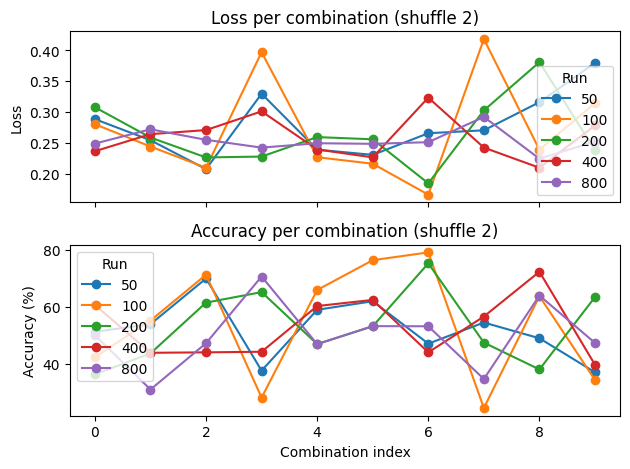

In [9]:
from __future__ import annotations

import itertools
from pathlib import Path
from typing import Iterable, Tuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def plot_test_runs(
    main_folder: str,
    subfolder_prefix: str,
    run_numbers: Iterable[int],
    shuffle_index: int,
):
    """Plot loss and accuracy for multiple test runs and summarise statistics.

    Parameters
    ----------
    main_folder:
        Name of the base experiment folder located under ``~/work``.
        Example: ``"s1-sample-pos-s-all"``.
    subfolder_prefix:
        Common prefix of the result folders.  For each run ``N`` the function
        expects to find folders ``{prefix}-acc-all-{N}`` and
        ``{prefix}-loss-all-{N}`` inside ``main_folder``.
    run_numbers:
        Iterable of run identifiers (e.g. ``[50, 100, 200]``) to overlay.
    shuffle_index:
        Index of the ``.npz`` file representing the shuffle type to plot.

    Returns
    -------
    fig : ``matplotlib.figure.Figure``
        Figure containing the overlaid loss and accuracy plots.
    loss_table, acc_table : ``pandas.DataFrame``
        Tables of mean±std for loss and accuracy.  Rows correspond to run
        numbers (sorted ascending) and columns to shuffle indices.
    """

    base = Path.home() / "work" / main_folder
    runs = sorted(run_numbers)

    fig, (ax_loss, ax_acc) = plt.subplots(2, 1, sharex=True)

    loss_stats: dict[int, dict[int, Tuple[float, float]]] = {}
    acc_stats: dict[int, dict[int, Tuple[float, float]]] = {}
    shuffle_labels = None

    for run in runs:
        acc_folder = base / f"{subfolder_prefix}-acc-all-{run}"
        loss_folder = base / f"{subfolder_prefix}-loss-all-{run}"

        acc_files = sorted(acc_folder.glob("*.npz"))
        loss_files = sorted(loss_folder.glob("*.npz"))

        if shuffle_labels is None:
            shuffle_labels = list(range(len(acc_files)))

        if shuffle_index >= len(acc_files) or shuffle_index >= len(loss_files):
            raise IndexError(f"shuffle_index {shuffle_index} out of range for run {run}")

        with np.load(acc_files[shuffle_index]) as a_data, np.load(loss_files[shuffle_index]
        ) as l_data:
            acc_arr = a_data["accuracy_per_config"]
            loss_arr = l_data["loss_per_config"]
            x = np.arange(len(acc_arr))
            ax_acc.plot(x, acc_arr, marker="o", label=str(run))
            ax_loss.plot(x, loss_arr, marker="o", label=str(run))

        for idx, (a_file, l_file) in enumerate(zip(acc_files, loss_files)):
            with np.load(a_file) as a_data, np.load(l_file) as l_data:
                acc_mean = float(np.mean(a_data["accuracy_per_config"]))
                acc_std = float(np.std(a_data["accuracy_per_config"]))
                loss_mean = float(np.mean(l_data["loss_per_config"]))
                loss_std = float(np.std(l_data["loss_per_config"]))

            acc_stats.setdefault(run, {})[idx] = (acc_mean, acc_std)
            loss_stats.setdefault(run, {})[idx] = (loss_mean, loss_std)

    ax_loss.set_ylabel("Loss")
    ax_acc.set_ylabel("Accuracy (%)")
    ax_acc.set_xlabel("Combination index")
    ax_loss.set_title(f"Loss per combination (shuffle {shuffle_index})")
    ax_acc.set_title(f"Accuracy per combination (shuffle {shuffle_index})")
    ax_loss.legend(title="Run")
    ax_acc.legend(title="Run")
    fig.tight_layout()

    df_acc = pd.DataFrame(index=runs, columns=shuffle_labels)
    df_loss = pd.DataFrame(index=runs, columns=shuffle_labels)

    for run in runs:
        for idx in shuffle_labels:
            a_mean, a_std = acc_stats[run][idx]
            l_mean, l_std = loss_stats[run][idx]
            df_acc.loc[run, idx] = f"{a_mean:.3g}±{a_std:.3g}"
            df_loss.loc[run, idx] = f"{l_mean:.3g}±{l_std:.3g}"

    df_acc.index.name = "run"
    df_loss.index.name = "run"

    print("Accuracy mean ± std:")
    print(df_acc)
    print("\nLoss mean ± std:")
    print(df_loss)

    return fig, df_loss, df_acc



def combination_from_index(index: int, num_modes: int, photon_number: int):
    """Return the binary input combination for a given index.

    Parameters
    ----------
    index:
        0-based index of the combination.
    num_modes:
        Number of modes.
    photon_number:
        Number of photons in the configuration.
    """
    combos = list(itertools.combinations(range(num_modes), photon_number))
    if index < 0 or index >= len(combos):
        raise IndexError("index out of range")
    arr = []
    for idx in combos[index]:
        arr.append(idx)
    return tuple(arr)

main_folder = "p1-pos-sample-s-all-2"
subfolder_prefix = "test"
run_numbers = [50,100,200,400,800]
shuffle_index = 2

plot_test_runs(main_folder, subfolder_prefix, run_numbers, shuffle_index)

combination_from_index(5, 10, 1)

[Warning] Global file for index 3 not found.
[Warning] Global file for index 4 not found.
[Warning] Global file for index 5 not found.
[Warning] Global file for index 6 not found.
[Warning] Global file for index 7 not found.


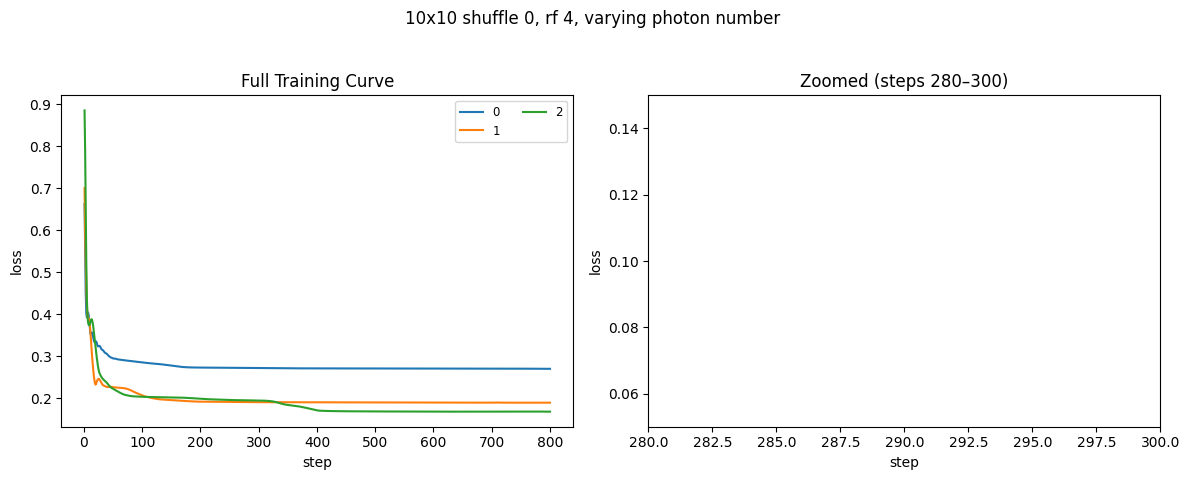

[Warning] Global file for index 0 not found.
[Warning] Global file for index 1 not found.
[Warning] Global file for index 2 not found.
[Warning] Global file for index 3 not found.
[Warning] Global file for index 4 not found.
[Warning] Global file for index 5 not found.
[Warning] Global file for index 6 not found.
[Warning] Global file for index 7 not found.


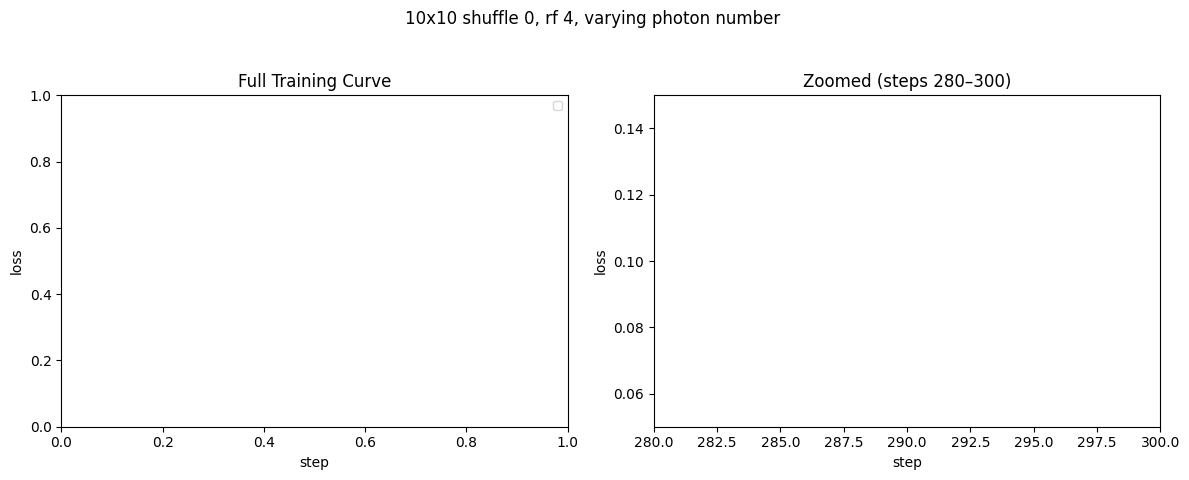

[Warning] Global file for index 0 not found.
[Warning] Global file for index 1 not found.
[Warning] Global file for index 2 not found.
[Warning] Global file for index 3 not found.
[Warning] Global file for index 4 not found.
[Warning] Global file for index 5 not found.
[Warning] Global file for index 6 not found.
[Warning] Global file for index 7 not found.


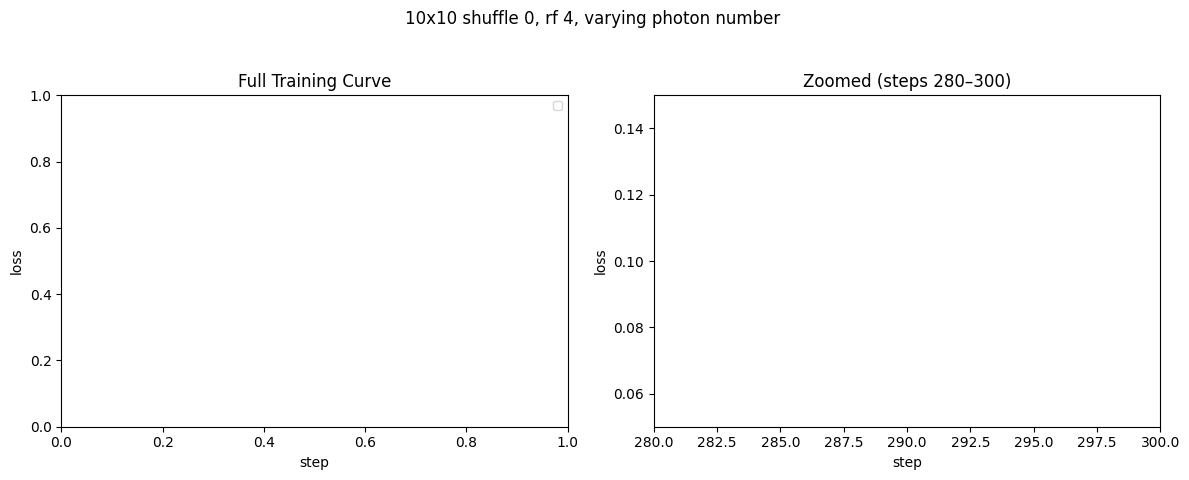

In [37]:
# ---- Cell 2: init_phases-2 curves with optional test-loss lines ----
from p_pack import globals as g
from pathlib import Path

# -------- Configuration --------
data_folders = ("p1-reup-pos-vary-s0-test/Learning","p1-reup-pos-vary-s1/Learning","p1-reup-pos-vary-s2/Learning")
for i in data_folders:
    data_folder = i
    file_indent = 'f'
    indexes_to_plot = [0,1,2,3,4,5,6,7]  # Choose the indexes you want to plot
    legend_names = ["0","1","2","3","4", "5", "6", "7"]  # Custom labels, must match index order
    x_min = 280
    x_max = 300
    y_min = 0.05
    y_max = 0.15
    plot_test_loss = 0 # set to 1 to show test loss lines
    test_loss_folder = "p1-position0-vs-shuffle-rf2/test-pos0"

    # Create two side-by-side plots
    fig, (ax_full, ax_zoom) = g.plt.subplots(1, 2, figsize=(12, 5))

    # Set data folder path
    script_dir = g.os.getcwd()
    parent_dir = g.os.path.abspath(g.os.path.join(script_dir, ".."))
    data_folder_path = g.os.path.join(parent_dir, "work", data_folder)
    test_folder_path = g.os.path.join(parent_dir, "work", test_loss_folder)

    # Loop over the selected indexes and legend labels
    for idx, label in zip(indexes_to_plot, legend_names):
        matches = list(Path(data_folder_path).glob(f"it{idx}{file_indent}*g.npz"))
        if not matches:
            print(f"[Warning] Global file for index {idx} not found.")
            continue

        global_name = matches[0].name
        data_name   = global_name.replace("g.npz", ".npz")

        data_path    = g.os.path.join(data_folder_path, data_name)
        globals_path = g.os.path.join(data_folder_path, global_name)

        out    = g.np.load(data_path)
        steps  = out["loss_mem"][:, 0].astype(int)
        losses = out["loss_mem"][:, 1].astype(float)

        # plot training loss and capture its color
        line_full, = ax_full.plot(steps, losses, linewidth=1.5, label=label)
        line_zoom, = ax_zoom.plot(steps, losses, linewidth=1.5, label=label)
        color = line_full.get_color()

        if plot_test_loss:
            test_name = 't' + global_name[2:].replace('g.npz', '.npz')
            test_path = g.os.path.join(test_folder_path, test_name)
            if g.os.path.exists(test_path):
                tl = g.np.load(test_path)['test_loss'].item()
                # draw test-loss as a horizontal line in the same color
                ax_full.axline((0, tl), (1, tl),
                            linestyle='--',
                            color=color,
                            label=f'test {label}')
                ax_zoom.axline((0, tl), (1, tl),
                            linestyle='--',
                            color=color)
            else:
                print(f"[Warning] Test loss file {test_name} not found.")

    # finalize axes
    ax_full.set(xlabel='step', ylabel='loss', title='Full Training Curve')
    ax_zoom.set(xlim=(x_min, x_max), ylim=(y_min, y_max),
                xlabel='step', ylabel='loss',
                title=f'Zoomed (steps {x_min}–{x_max})')

    handles, labels = ax_full.get_legend_handles_labels()
    ax_full.legend(handles, labels, loc='upper right', ncol=2, fontsize='small')

    gl    = g.np.load(globals_path)
    shape = out['carry_0'].shape
    fig.suptitle(
       # f"Unitary dim: {2*shape[1]}×{2*shape[1]}, p={gl['p_suc_inputs'].item()}, input=2 shuffle={gl['shuffle_type'].item()}, rf={gl['reupload_freq'].item()}"
       "10x10 shuffle 0, rf 4, varying photon number "
    )

    g.plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    g.plt.show()



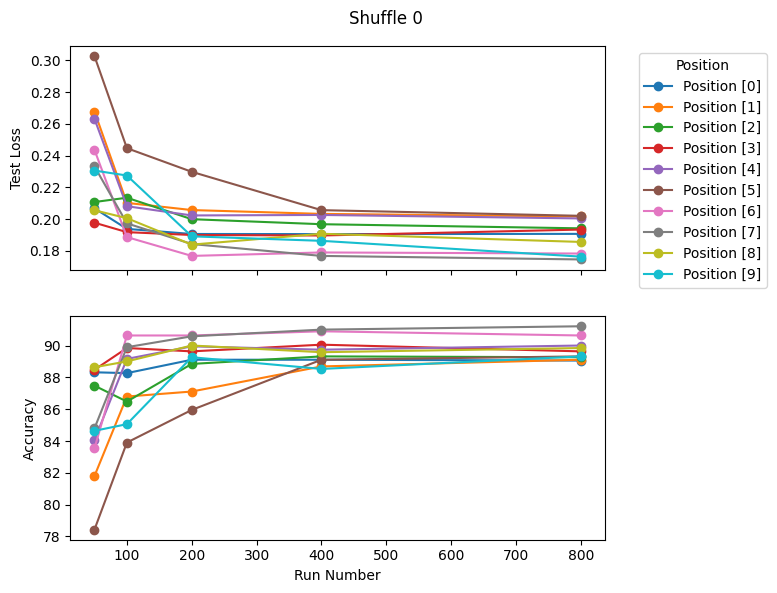

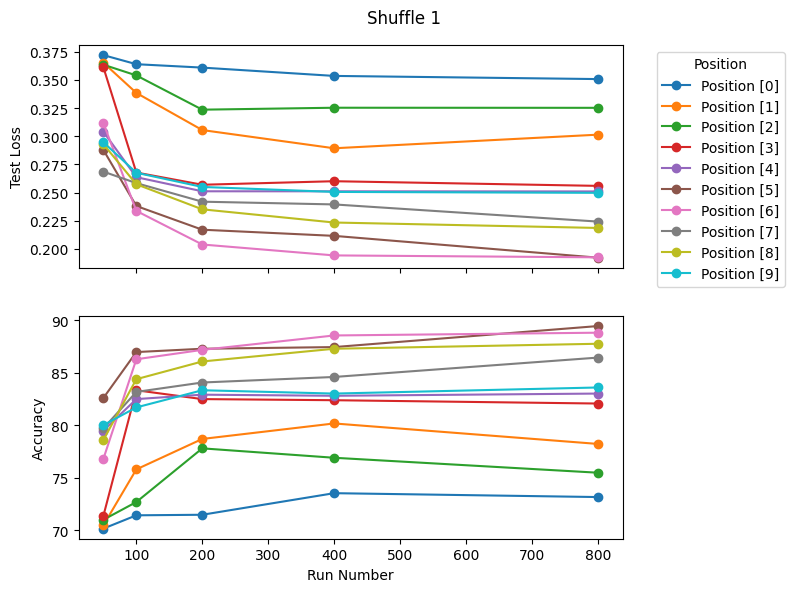

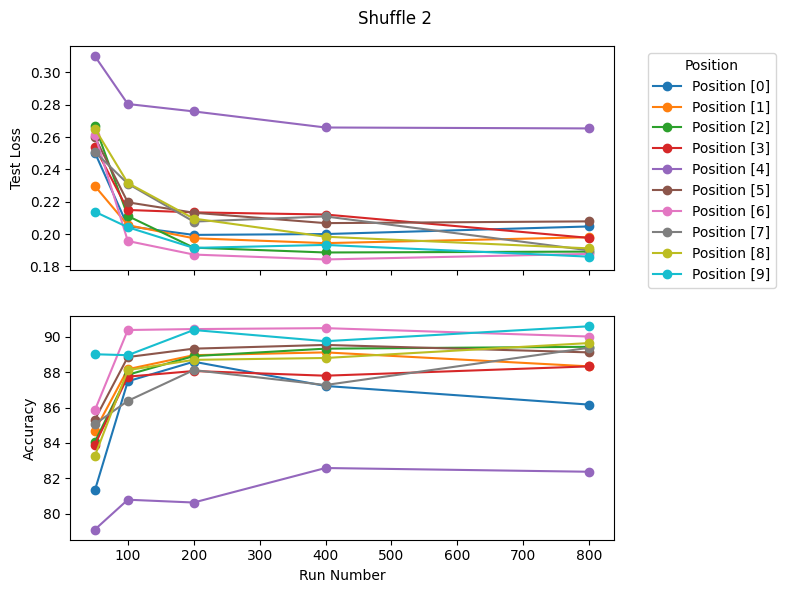

In [22]:
import sys
from pathlib import Path

from p_pack import globals as g


# Mapping of photon number to their respective result directories
PHOTON_DIRS = {
    1: "p1-pos-vary-s0",
    2: "p1-pos-vary-s1",
    3: "p1-pos-vary-s2",
}

# Explicit colors so photon and shuffle plots do not share palettes
PHOTON_COLORS = {1: "tab:blue", 2: "tab:orange", 3: "tab:green"}
SHUFFLE_COLORS = {0: "tab:red", 1: "tab:purple", 2: "tab:brown"}

# Line styles for photon comparison plots (all dotted with increasing frequency)
PHOTON_LINESTYLES = {
    1: (0, (5, 5)),  # least frequent dots
    2: (0, (3, 3)),  # medium frequency
    3: (0, (1, 1)),  # most frequent dots
}

# Training runs that were evaluated
RUN_NUMBERS = [50,100,200,400,800]

def _base_path(photon_dir: str) -> Path:
    script_dir = g.os.getcwd()
    parent_dir = g.os.path.abspath(g.os.path.join(script_dir, ".."))
    return Path(parent_dir) / "work" / photon_dir


def _load_metric_for_position(photon_dir: str, metric: str, position: int):
    """Load metric for a given position index (0..9) across all runs."""
    base_path = _base_path(photon_dir)
    runs, values = [], []
    for run in RUN_NUMBERS:
        file_path = base_path / f"{metric}-{run}" / f"t{position}p[{position}].npz"
        if not file_path.exists():
            print(f"[Warning] Missing file: {file_path}")
            continue
        with g.np.load(file_path, allow_pickle=True) as data:
            values.append(data["test_loss"].item())
            runs.append(run)
    return runs, values


def plot_results_by_shuffle():
    """Create 3 figures (one for each shuffle) showing positions [0]..[9] for that shuffle."""
    for shuffle in [0, 1, 2]:
        fig, (ax_loss, ax_acc) = g.plt.subplots(2, 1, sharex=True, figsize=(8, 6))

        # Select photon directory matching this shuffle
        photon_dir = PHOTON_DIRS[shuffle + 1]  # keys are 1,2,3 for shuffles 0,1,2

        for pos in range(10):
            run_loss, loss_vals = _load_metric_for_position(photon_dir, "test-loss-std", pos)
            run_acc, acc_vals = _load_metric_for_position(photon_dir, "test-acc-std", pos)

            color = g.plt.cm.tab10(pos % 10)  # unique color per position

            ax_loss.plot(
                run_loss,
                loss_vals,
                marker="o",
                label=f"Position [{pos}]",
                color=color,
                linestyle="-",
            )
            ax_acc.plot(
                run_acc,
                acc_vals,
                marker="o",
                label=f"Position [{pos}]",
                color=color,
                linestyle="-",
            )

        ax_loss.set_ylabel("Test Loss")
        ax_loss.legend(title="Position", bbox_to_anchor=(1.05, 1), loc='upper left')
        ax_acc.set_ylabel("Accuracy")
        ax_acc.set_xlabel("Run Number")
        fig.suptitle(f"Shuffle {shuffle}")
        g.plt.tight_layout()
        g.plt.show()

plot_results_by_shuffle()

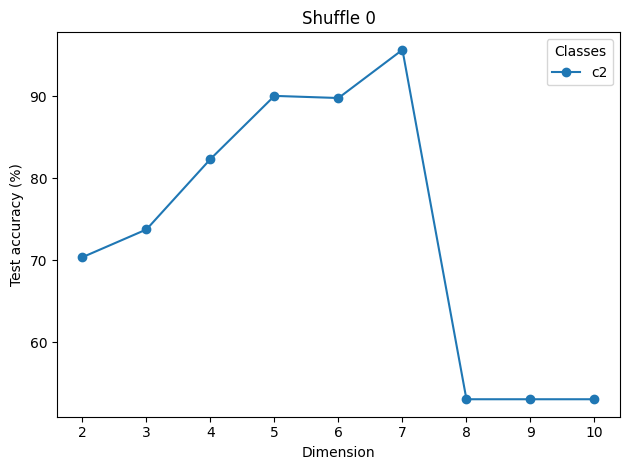

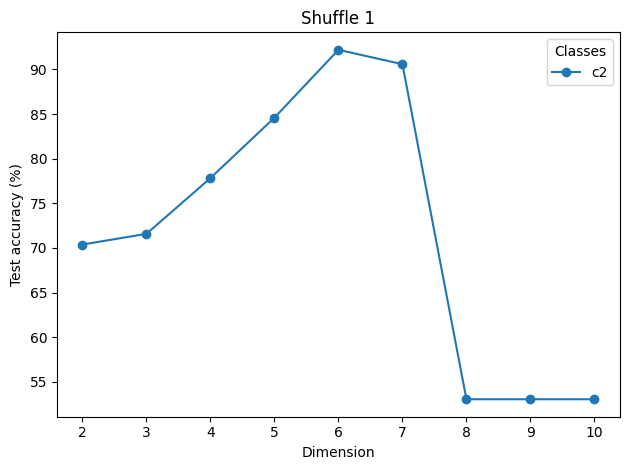

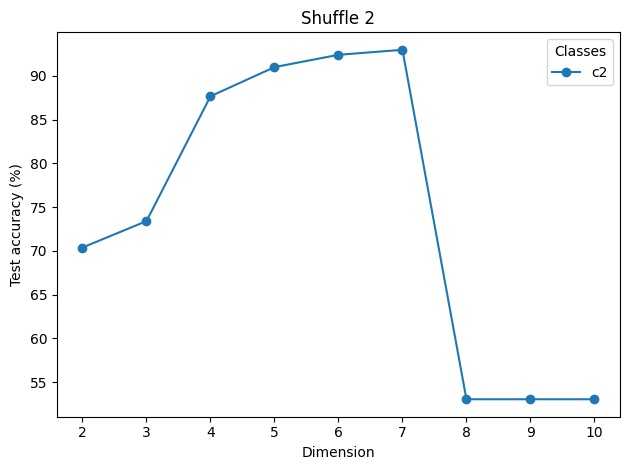

In [23]:
from __future__ import annotations

from pathlib import Path
from typing import Iterable, Mapping

import numpy as np
import matplotlib.pyplot as plt


def plot_dim_vs_accuracy(
    base_path: str | Path | None = None,
    shuffle_types: Iterable[int] = (0, 1, 2),
    class_counts: Iterable[int] | None = (2,),
    experiment_prefix: str = "p3-dim-vary",
) -> Mapping[int, plt.Figure]:
    """Plot dimension against test accuracy for each shuffle type.

    Parameters
    ----------
    base_path:
        Root directory that contains the experiment folders.  By default we
        assume the data is stored under ``~/work`` as produced by the
        ``reup_vary_new*.py`` scripts.
    shuffle_types:
        Iterable of shuffle identifiers to plot.  A figure is created for each
        shuffle in this sequence.
    class_counts:
        Iterable of classification counts to include.  Each value ``c``
        corresponds to a folder named ``{experiment_prefix}-s{shuffle}-c{c}``.
        If ``None`` the function will attempt to detect available folders for
        each shuffle.
    experiment_prefix:
        Prefix of the folder names used when generating the data.

    Returns
    -------
    dict
        Mapping from ``shuffle`` value to the created ``matplotlib`` figure.
    """

    base = Path(base_path) if base_path is not None else Path.home() / "work"
    figures: dict[int, plt.Figure] = {}

    for shuffle in shuffle_types:
        fig, ax = plt.subplots()
        figures[shuffle] = fig

        # determine which class counts to consider
        if class_counts is None:
            detected: list[int] = []
            pattern = f"{experiment_prefix}-s{shuffle}-c*"
            for folder in base.glob(pattern):
                try:
                    detected.append(int(folder.name.split("-c")[-1]))
                except ValueError:
                    continue
            use_classes = sorted(set(detected))
        else:
            use_classes = list(class_counts)

        for classes in use_classes:
            folder = base / f"{experiment_prefix}-s{shuffle}-c{classes}"
            if not folder.is_dir():
                continue

            # locate subfolder containing accuracy results, e.g. ``test-acc-std-1000``
            acc_dirs = [d for d in folder.glob("test-acc*") if d.is_dir()]
            if not acc_dirs:
                # fall back to any folder containing "acc"
                acc_dirs = [d for d in folder.glob("*acc*") if d.is_dir()]
            if not acc_dirs:
                print(f"No accuracy data in {folder}")
                continue
            acc_dir = acc_dirs[0]

            dims: list[int] = []
            accs: list[float] = []
            for npz_file in sorted(acc_dir.glob("*.npz")):
                stem = npz_file.stem  # e.g. 't0p5'
                if "p" not in stem:
                    continue
                try:
                    dim = int(stem.split("p")[-1])
                except ValueError:
                    continue
                with np.load(npz_file) as data:
                    if "test_accuracy" in data.files:
                        acc = float(data["test_accuracy"])
                    else:
                        acc = float(data.get("test_loss", 0.0))
                dims.append(dim)
                accs.append(acc)

            if not dims:
                continue

            order = np.argsort(dims)
            dims_arr = np.asarray(dims)[order]
            acc_arr = np.asarray(accs)[order]
            ax.plot(dims_arr, acc_arr, marker="o", label=f"c{classes}")

        ax.set_title(f"Shuffle {shuffle}")
        ax.set_xlabel("Dimension")
        ax.set_ylabel("Test accuracy (%)")
        if ax.get_legend_handles_labels()[0]:
            ax.legend(title="Classes")
        fig.tight_layout()

    return figures


plot_dim_vs_accuracy()
plt.show()

[Warning] Missing file for run 50: pattern t3f*.npz
[Warning] Missing file for run 100: pattern t3f*.npz
[Warning] Missing file for run 200: pattern t3f*.npz
[Warning] Missing file for run 400: pattern t3f*.npz
[Warning] Missing file for run 800: pattern t3f*.npz
[Warning] Missing file for run 50: pattern t3f*.npz
[Warning] Missing file for run 100: pattern t3f*.npz
[Warning] Missing file for run 200: pattern t3f*.npz
[Warning] Missing file for run 400: pattern t3f*.npz
[Warning] Missing file for run 800: pattern t3f*.npz
[Warning] Missing file for run 50: pattern t4f*.npz
[Warning] Missing file for run 100: pattern t4f*.npz
[Warning] Missing file for run 200: pattern t4f*.npz
[Warning] Missing file for run 400: pattern t4f*.npz
[Warning] Missing file for run 800: pattern t4f*.npz
[Warning] Missing file for run 50: pattern t4f*.npz
[Warning] Missing file for run 100: pattern t4f*.npz
[Warning] Missing file for run 200: pattern t4f*.npz
[Warning] Missing file for run 400: pattern t4f*.n

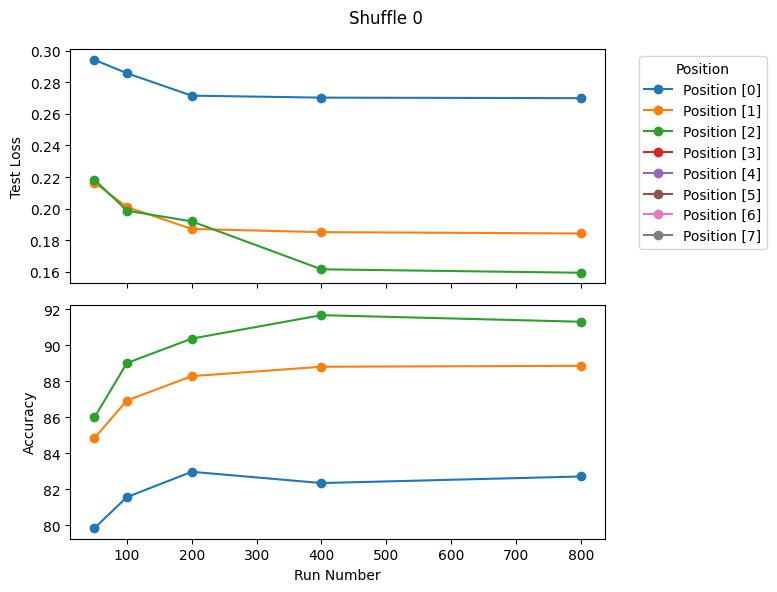

[Warning] Missing file for run 50: pattern t0f*.npz
[Warning] Missing file for run 100: pattern t0f*.npz
[Warning] Missing file for run 200: pattern t0f*.npz
[Warning] Missing file for run 400: pattern t0f*.npz
[Warning] Missing file for run 800: pattern t0f*.npz
[Warning] Missing file for run 50: pattern t0f*.npz
[Warning] Missing file for run 100: pattern t0f*.npz
[Warning] Missing file for run 200: pattern t0f*.npz
[Warning] Missing file for run 400: pattern t0f*.npz
[Warning] Missing file for run 800: pattern t0f*.npz
[Warning] Missing file for run 50: pattern t1f*.npz
[Warning] Missing file for run 100: pattern t1f*.npz
[Warning] Missing file for run 200: pattern t1f*.npz
[Warning] Missing file for run 400: pattern t1f*.npz
[Warning] Missing file for run 800: pattern t1f*.npz
[Warning] Missing file for run 50: pattern t1f*.npz
[Warning] Missing file for run 100: pattern t1f*.npz
[Warning] Missing file for run 200: pattern t1f*.npz
[Warning] Missing file for run 400: pattern t1f*.n

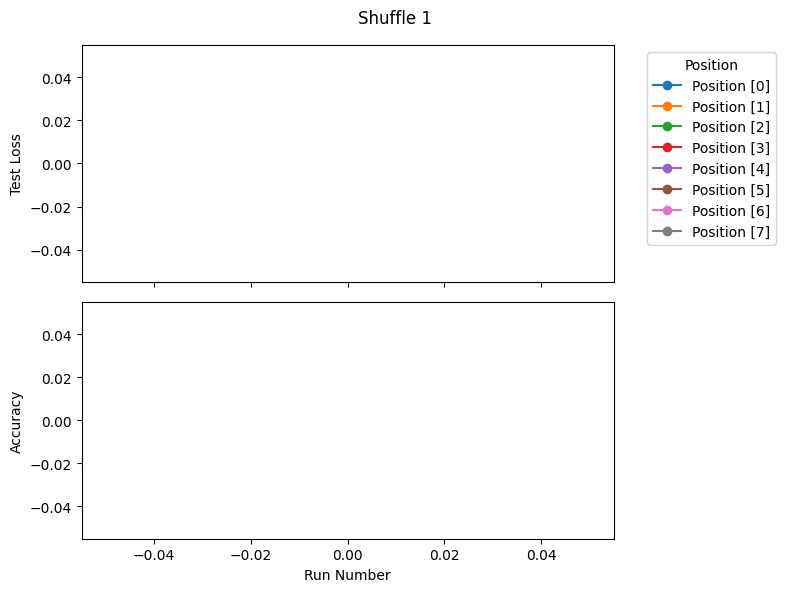

[Warning] Missing file for run 50: pattern t0f*.npz
[Warning] Missing file for run 100: pattern t0f*.npz
[Warning] Missing file for run 200: pattern t0f*.npz
[Warning] Missing file for run 400: pattern t0f*.npz
[Warning] Missing file for run 800: pattern t0f*.npz
[Warning] Missing file for run 50: pattern t0f*.npz
[Warning] Missing file for run 100: pattern t0f*.npz
[Warning] Missing file for run 200: pattern t0f*.npz
[Warning] Missing file for run 400: pattern t0f*.npz
[Warning] Missing file for run 800: pattern t0f*.npz
[Warning] Missing file for run 50: pattern t1f*.npz
[Warning] Missing file for run 100: pattern t1f*.npz
[Warning] Missing file for run 200: pattern t1f*.npz
[Warning] Missing file for run 400: pattern t1f*.npz
[Warning] Missing file for run 800: pattern t1f*.npz
[Warning] Missing file for run 50: pattern t1f*.npz
[Warning] Missing file for run 100: pattern t1f*.npz
[Warning] Missing file for run 200: pattern t1f*.npz
[Warning] Missing file for run 400: pattern t1f*.n

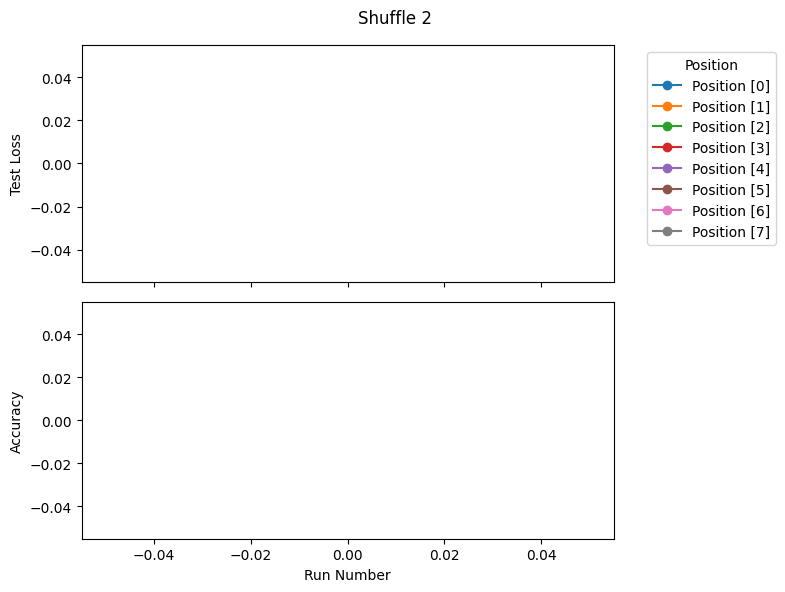

In [39]:
import sys
from pathlib import Path

from p_pack import globals as g
import glob


# Mapping of photon number to their respective result directories
PHOTON_DIRS = {
    1: "p1-reup-pos-vary-s0-test",
    2: "p1-reup-pos-vary-s1",
    3: "p1-reup-pos-vary-s2",
}

# Explicit colors so photon and shuffle plots do not share palettes
PHOTON_COLORS = {1: "tab:blue", 2: "tab:orange", 3: "tab:green"}
SHUFFLE_COLORS = {0: "tab:red", 1: "tab:purple", 2: "tab:brown"}

# Line styles for photon comparison plots (all dotted with increasing frequency)
PHOTON_LINESTYLES = {
    1: (0, (5, 5)),  # least frequent dots
    2: (0, (3, 3)),  # medium frequency
    3: (0, (1, 1)),  # most frequent dots
}

# Training runs that were evaluated
RUN_NUMBERS = [50,100,200,400,800]

def _base_path(photon_dir: str) -> Path:
    script_dir = g.os.getcwd()
    parent_dir = g.os.path.abspath(g.os.path.join(script_dir, ".."))
    return Path(parent_dir) / "work" / photon_dir


def _load_metric_for_position(photon_dir: str, metric: str, position: int):
    """Load metric for a given position index (0..9) across all runs."""
    base_path = _base_path(photon_dir)
    runs, values = [], []
    for run in RUN_NUMBERS:
        folder = base_path / f"{metric}-{run}"
        matches = list(folder.glob(f"t{position}f*.npz"))
        if not matches:
            print(f"[Warning] Missing file for run {run}: pattern t{position}f*.npz")
            continue

        file_path = matches[0]
        with g.np.load(file_path, allow_pickle=True) as data:
            values.append(data["test_loss"].item())
            runs.append(run)
    return runs, values


def plot_results_by_shuffle():
    """Create 3 figures (one for each shuffle) showing positions [0]..[9] for that shuffle."""
    for shuffle in [0, 1, 2]:
        fig, (ax_loss, ax_acc) = g.plt.subplots(2, 1, sharex=True, figsize=(8, 6))

        # Select photon directory matching this shuffle
        photon_dir = PHOTON_DIRS[shuffle + 1]  # keys are 1,2,3 for shuffles 0,1,2

        for pos in range(8):
            run_loss, loss_vals = _load_metric_for_position(photon_dir, "test-loss-std", pos)
            run_acc, acc_vals = _load_metric_for_position(photon_dir, "test-acc-std", pos)

            color = g.plt.cm.tab10(pos % 10)  # unique color per position

            ax_loss.plot(
                run_loss,
                loss_vals,
                marker="o",
                label=f"Position [{pos}]",
                color=color,
                linestyle="-",
            )
            ax_acc.plot(
                run_acc,
                acc_vals,
                marker="o",
                label=f"Position [{pos}]",
                color=color,
                linestyle="-",
            )

        ax_loss.set_ylabel("Test Loss")
        ax_loss.legend(title="Position", bbox_to_anchor=(1.05, 1), loc='upper left')
        ax_acc.set_ylabel("Accuracy")
        ax_acc.set_xlabel("Run Number")
        fig.suptitle(f"Shuffle {shuffle}")
        g.plt.tight_layout()
        g.plt.show()

plot_results_by_shuffle()